# Project Development
This notebook contains the work developing this project. Result and finding are presented in [capstone%20report.ipynb](capstone%20report.ipynb) file.

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

%matplotlib inline


from preprocess_visuals import *

pd.options.display.max_rows = 160
pd.options.display.max_columns = 200

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data Preprocessing
Read in the data file and call preprocess to encode and remove outliers. Display top 10 rows as sample.

In [3]:
df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv.zip', skiprows=1, skipfooter=2,
                 engine='python', usecols=get_usecols(), converters=get_conv())

# dummy encode categorical variables and impute missing values
df = preprocess(df)
display(df.head(10))

,loan_amnt,term,int_rate,installment,grade,emp_title,annual_inc,loan_status,zip_code,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cr_history,fico_range_mean,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,14000.0,1.0,12.74,316.690002,5.0,0.0,40000.0,0.0,92.0,0.0,0.0,33.553261,68.749359,10.0,0.0,25787.0,46.200001,23.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25787.0,2.0,0.0,0.0,0.0,129.0,0.0,68.921944,5.0,7.0,8549.0,46.0,55800.0,0.0,3.0,0.0,7.0,2579.0,27153.0,48.299999,0.0,0.0,129.0,517.0,1.0,1.0,1.0,2.0,23.00000,0.0,7.0,9.0,8.0,13.0,1.0,10.0,21.0,9.0,10.0,0.0,0.0,5.0,100.000000,37.500000,0.0,0.0,55800.0,25787.0,52500.0,0.0,43.0,717.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15400.0,1.0,11.39,337.839996,6.0,0.0,95000.0,0.0,6.0,0.0,0.0,34.000000,68.749359,20.0,0.0,12675.0,35.099998,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,490036.0,0.0,8.0,2.0,4.0,7.0,145656.0,102.000000,0.0,1.0,4600.0,88.0,36100.0,1.0,0.0,1.0,5.0,24502.0,14163.0,45.099998,0.0,0.0,219.0,156.0,16.0,7.0,1.0,16.0,10.00000,0.0,5.0,7.0,6.0,9.0,17.0,11.0,17.0,7.0,20.0,0.0,0.0,2.0,97.099998,16.700001,0.0,0.0,579945.0,158331.0,25800.0,143395.0,18.0,732.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4600.0,0.0,11.39,151.449997,6.0,0.0,44470.0,0.0,6.0,0.0,1.0,33.553261,68.749359,7.0,0.0,5400.0,19.100000,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9625.0,1.0,1.0,0.0,1.0,22.0,4225.0,36.000000,2.0,4.0,4670.0,24.0,28300.0,0.0,0.0,1.0,5.0,1375.0,9610.0,33.700001,0.0,0.0,77.0,159.0,1.0,1.0,0.0,7.0,1.00000,0.0,2.0,3.0,3.0,4.0,2.0,6.0,9.0,3.0,7.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,40000.0,9625.0,14500.0,11700.0,13.0,772.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15000.0,0.0,5.32,451.730011,7.0,0.0,182000.0,0.0,75.0,0.0,0.0,33.553261,68.749359,13.0,0.0,34623.0,33.700001,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,233521.0,0.0,1.0,0.0,1.0,24.0,2667.0,59.000000,2.0,2.0,12503.0,42.0,102600.0,1.0,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.00000,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,325464.0,50766.0,74600.0,4508.0,42.0,742.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

## Feature distributions
Plot histogram and box plot of features, grouped by loan_status. 

Missing values for loan_amnt 0


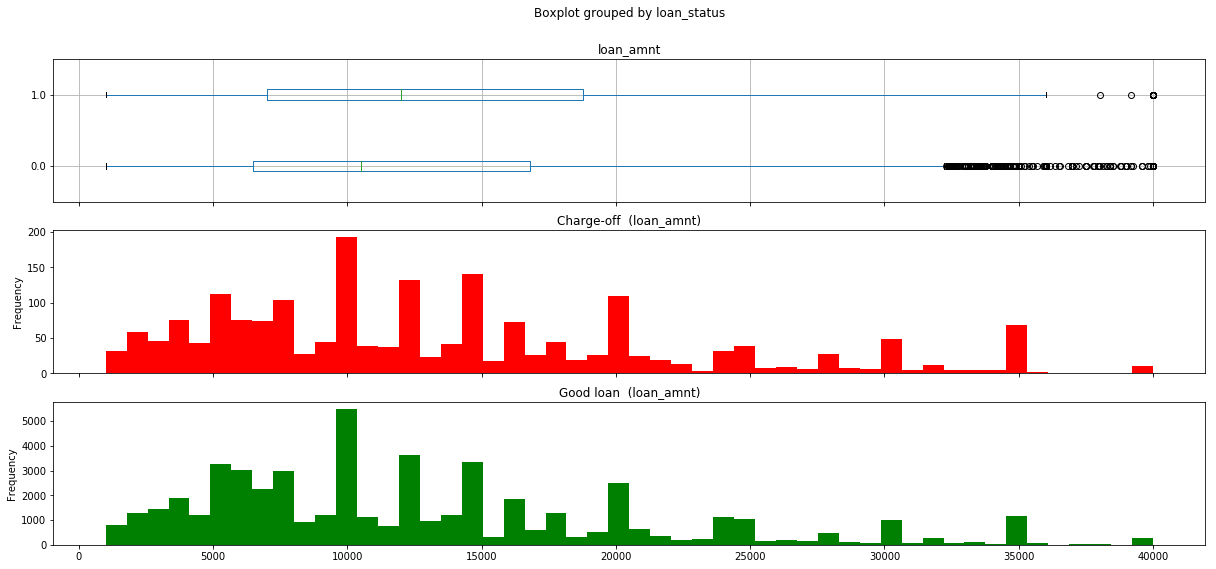

Missing values for term 0


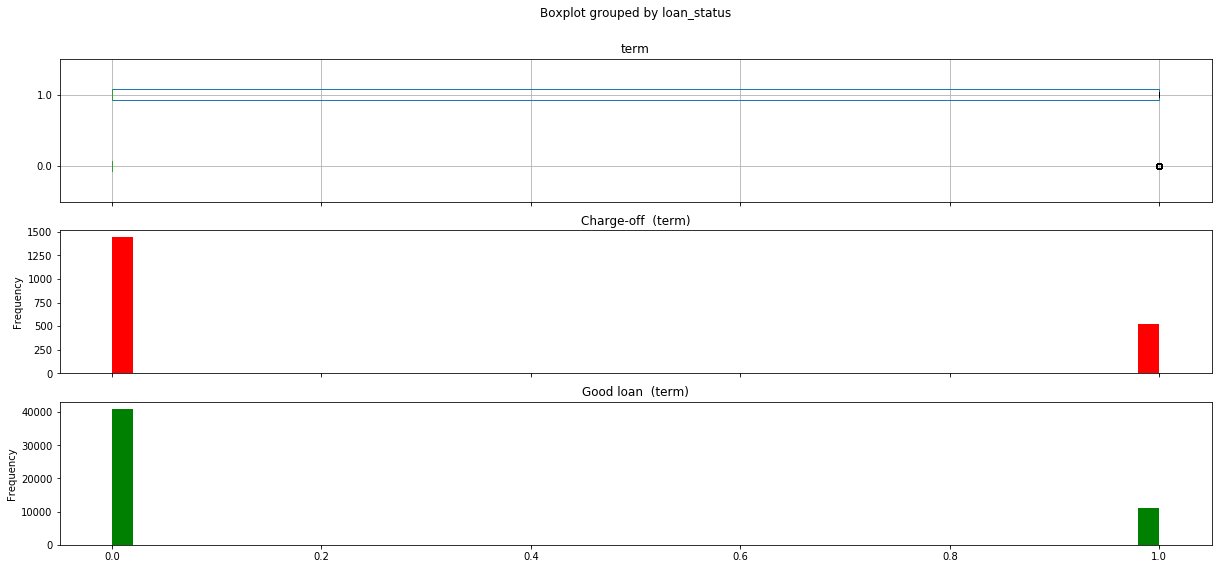

Missing values for int_rate 0


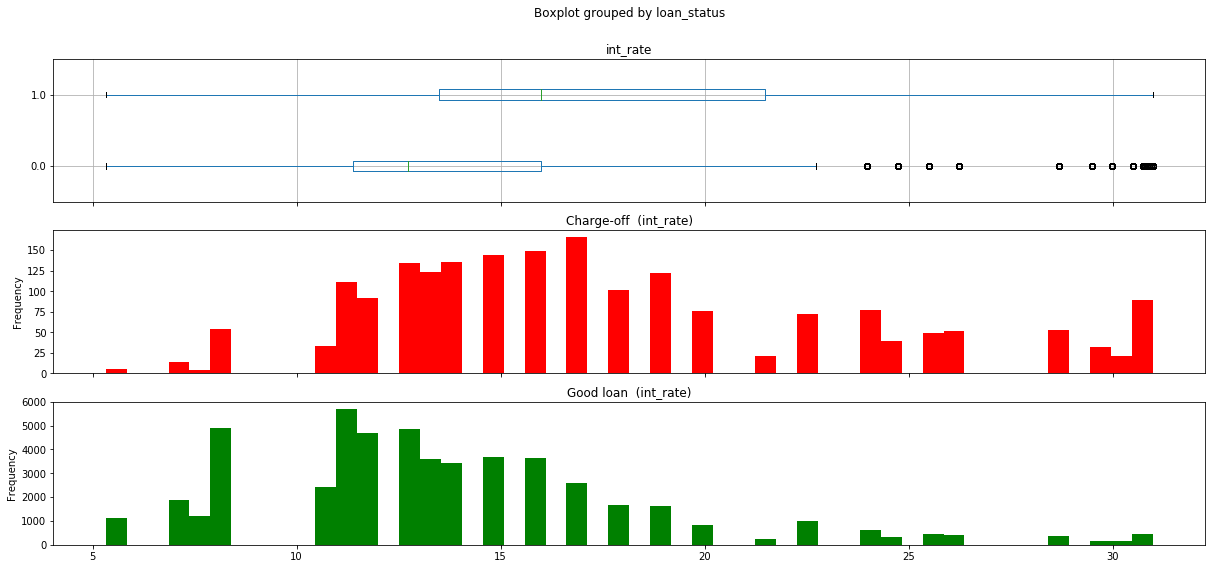

Missing values for installment 0


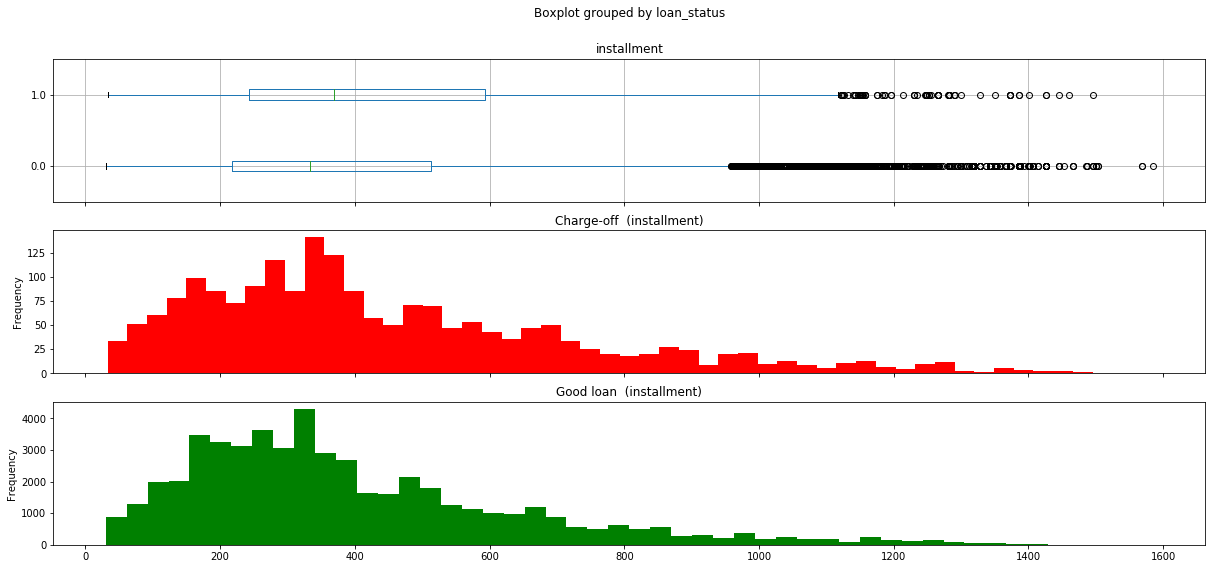

Missing values for grade 0


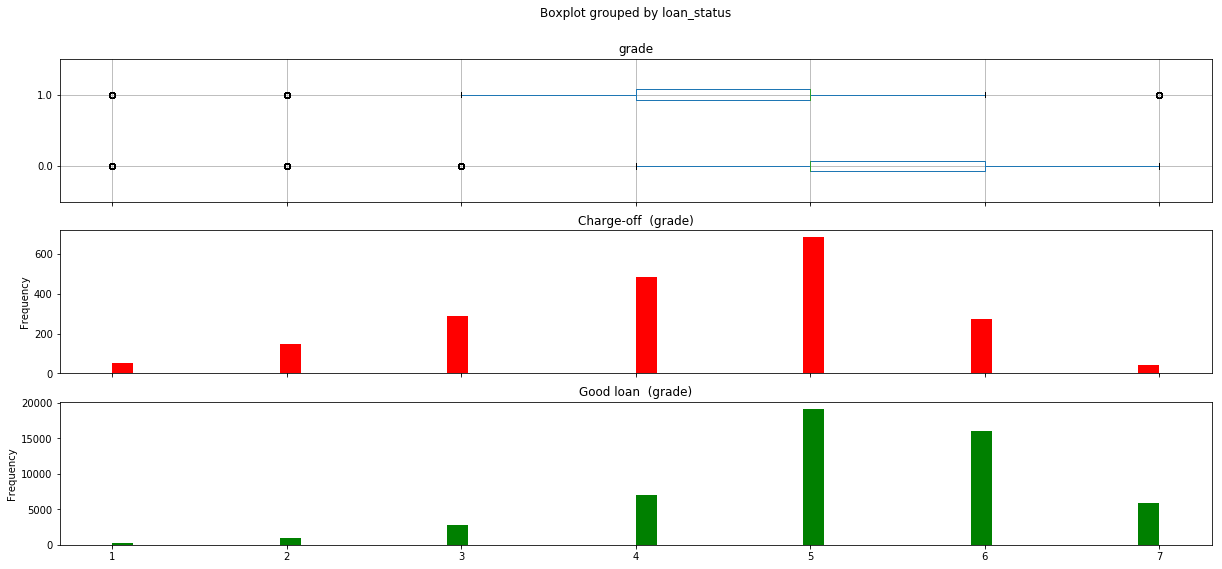

Missing values for emp_title 0


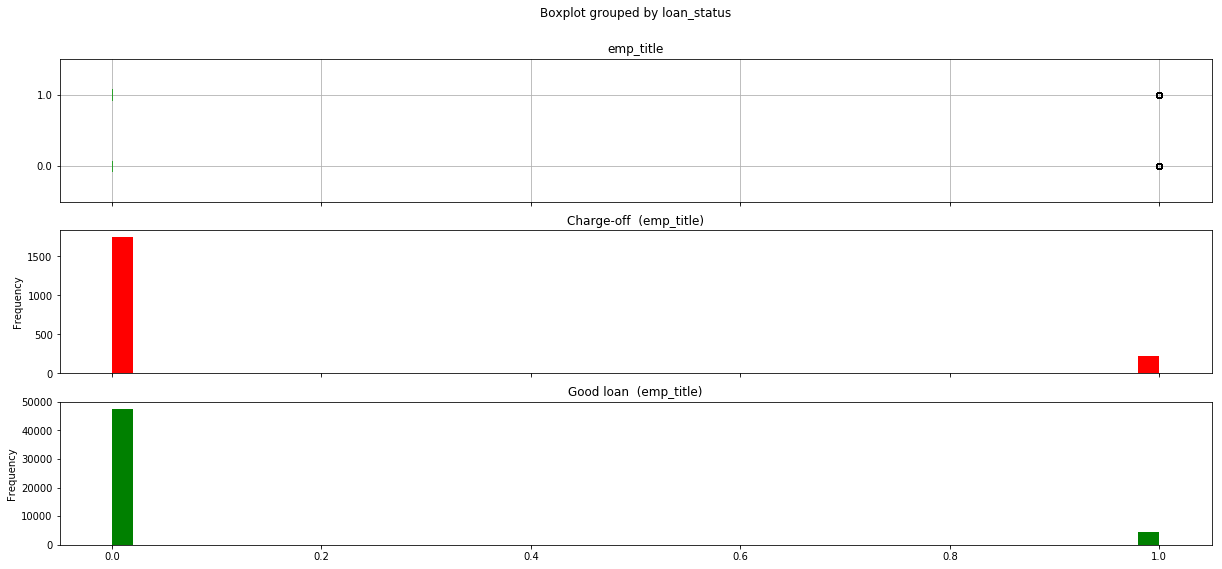

Missing values for annual_inc 0


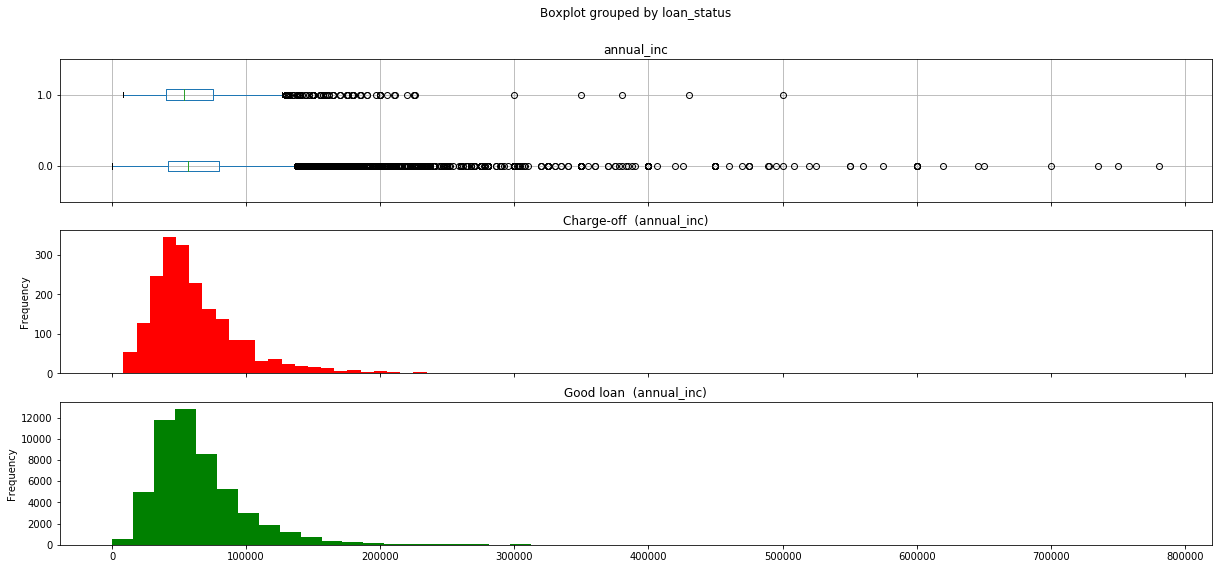

Missing values for loan_status 0


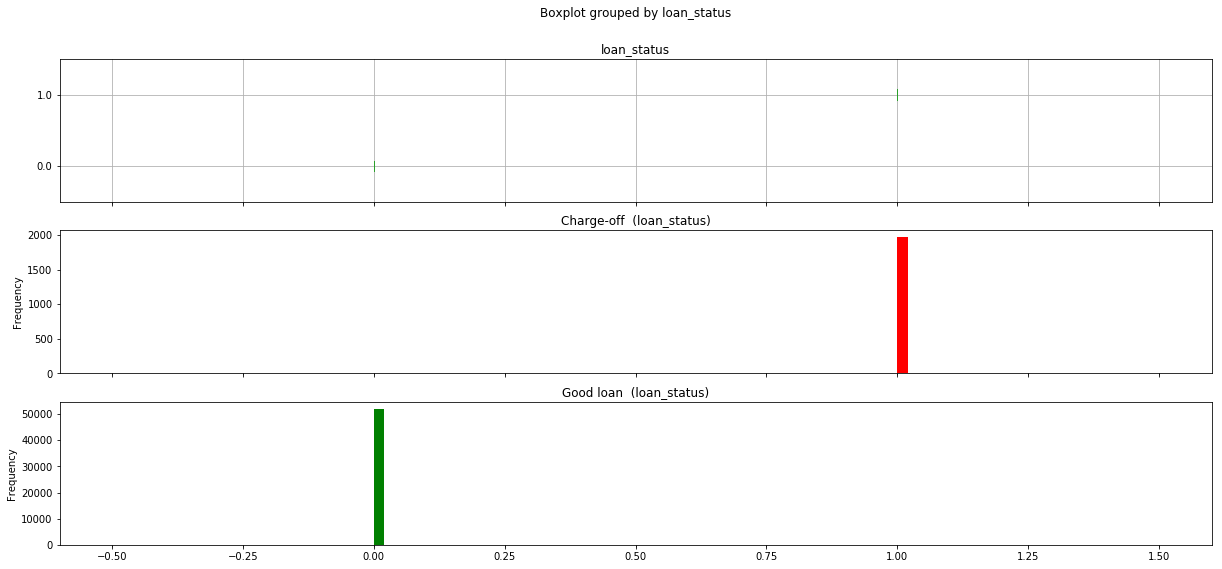

Missing values for zip_code 0


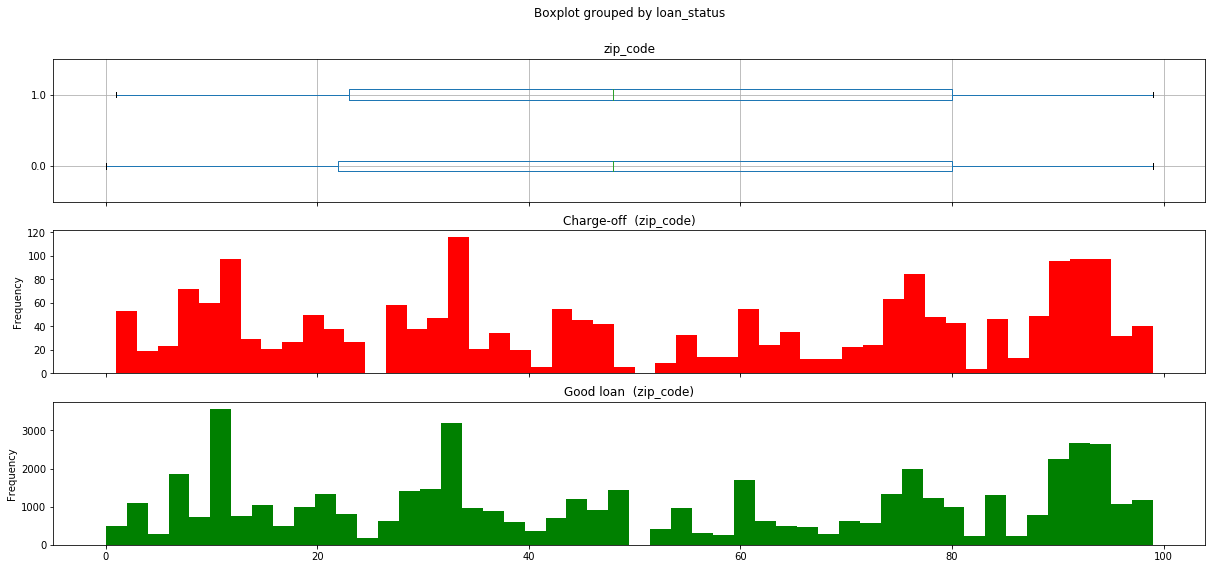

Missing values for delinq_2yrs 0


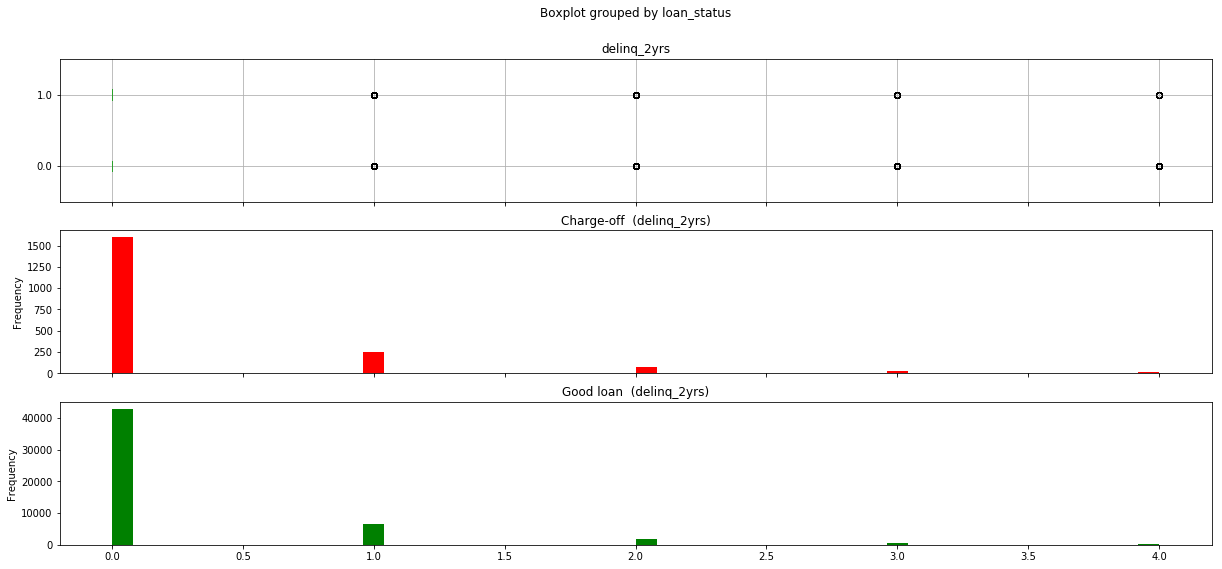

Missing values for inq_last_6mths 0


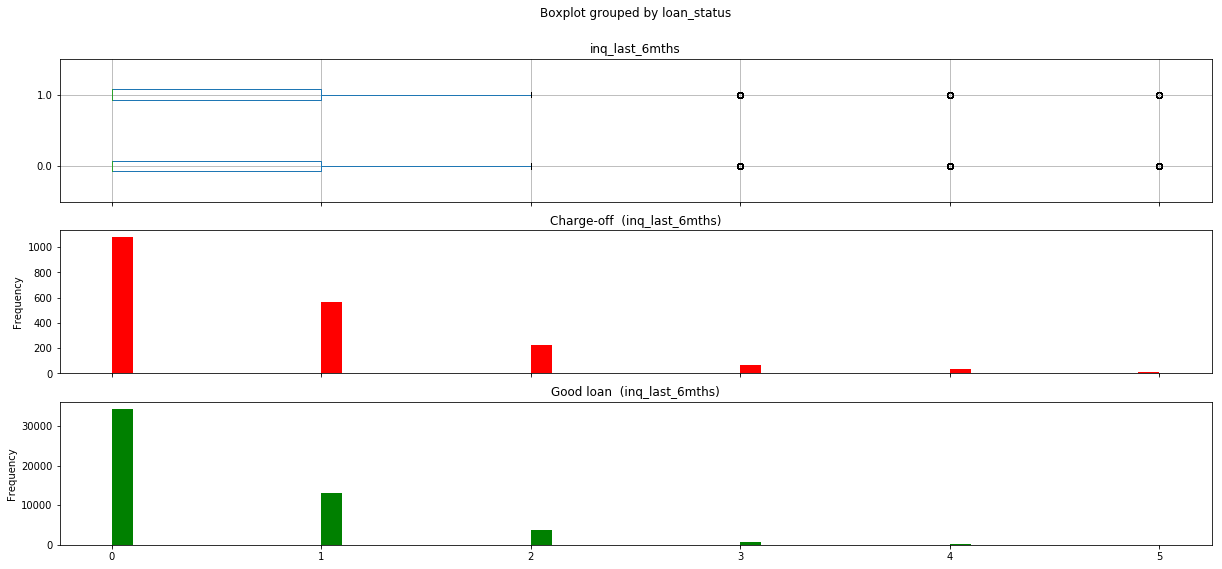

Missing values for mths_since_last_delinq 0


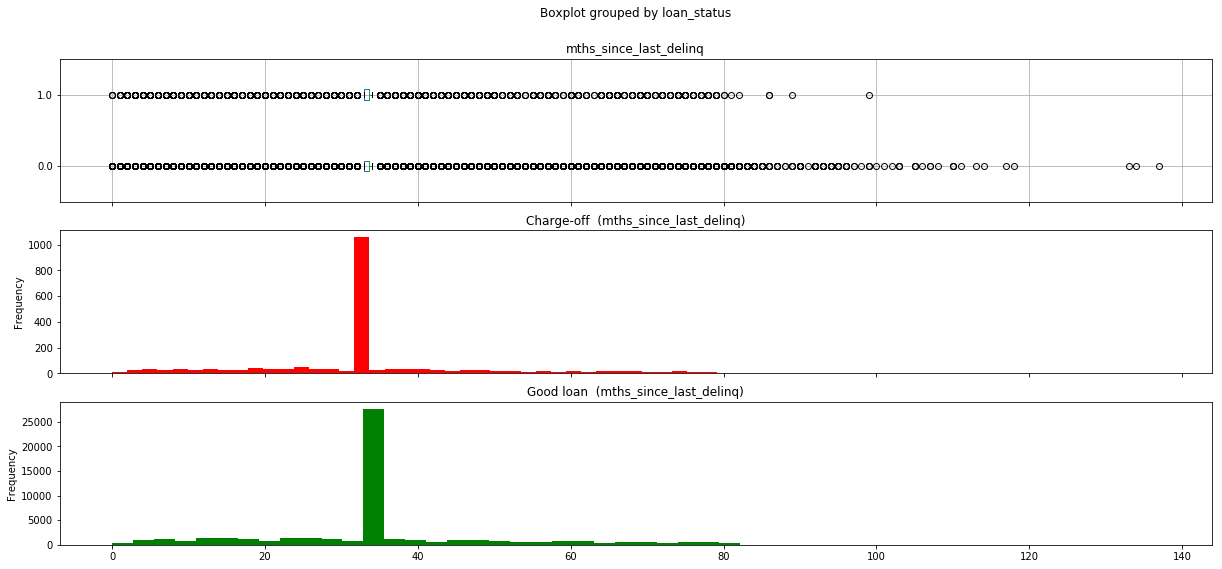

Missing values for mths_since_last_record 0


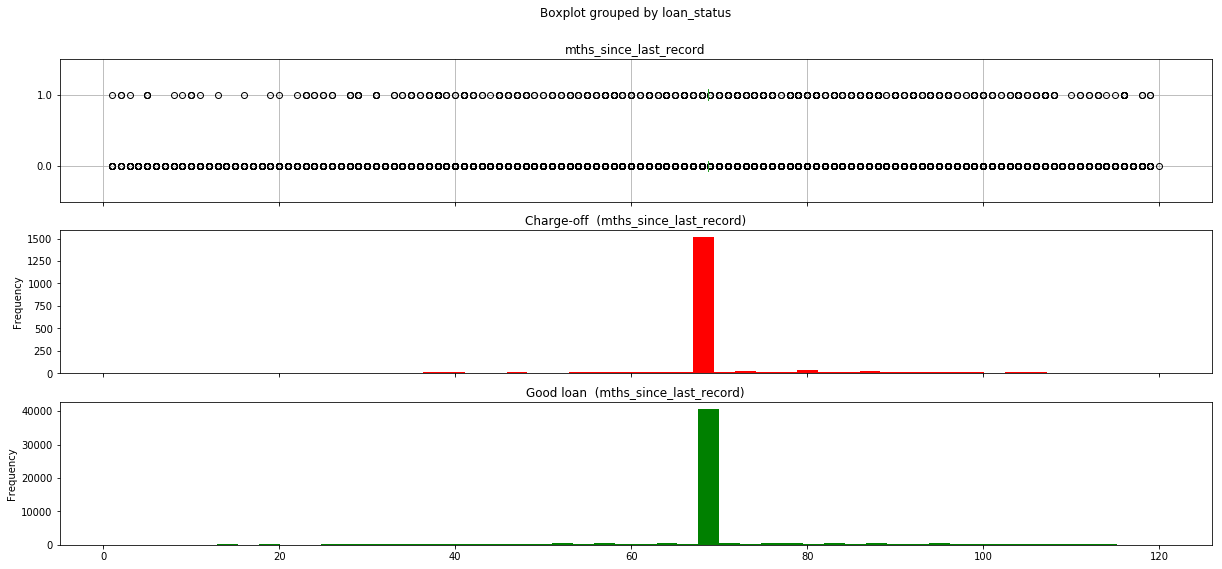

Missing values for open_acc 0


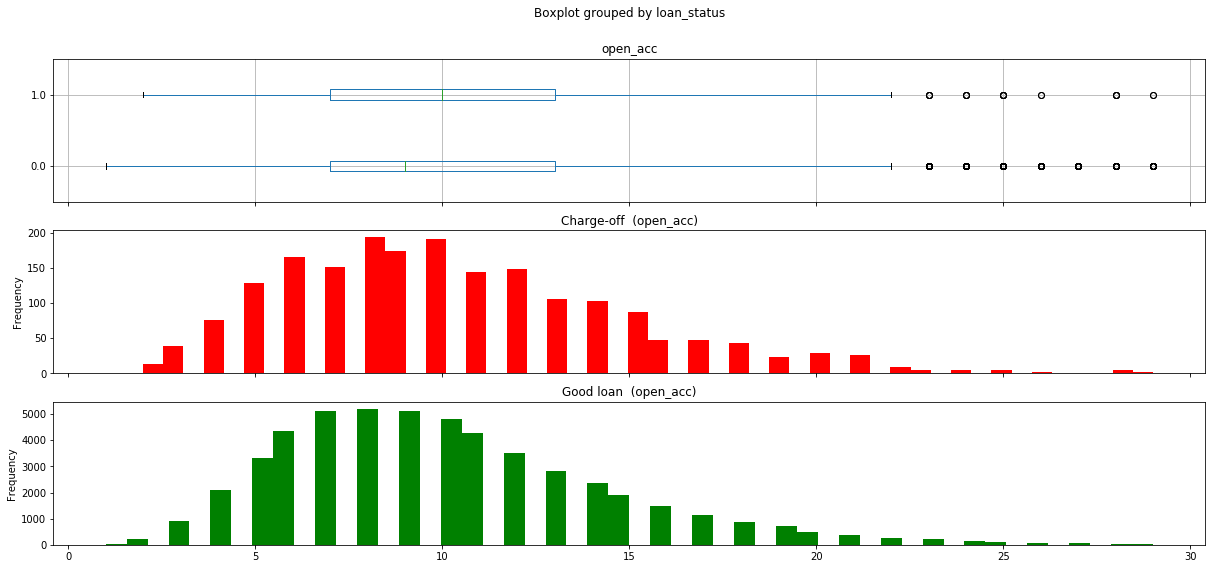

Missing values for pub_rec 0


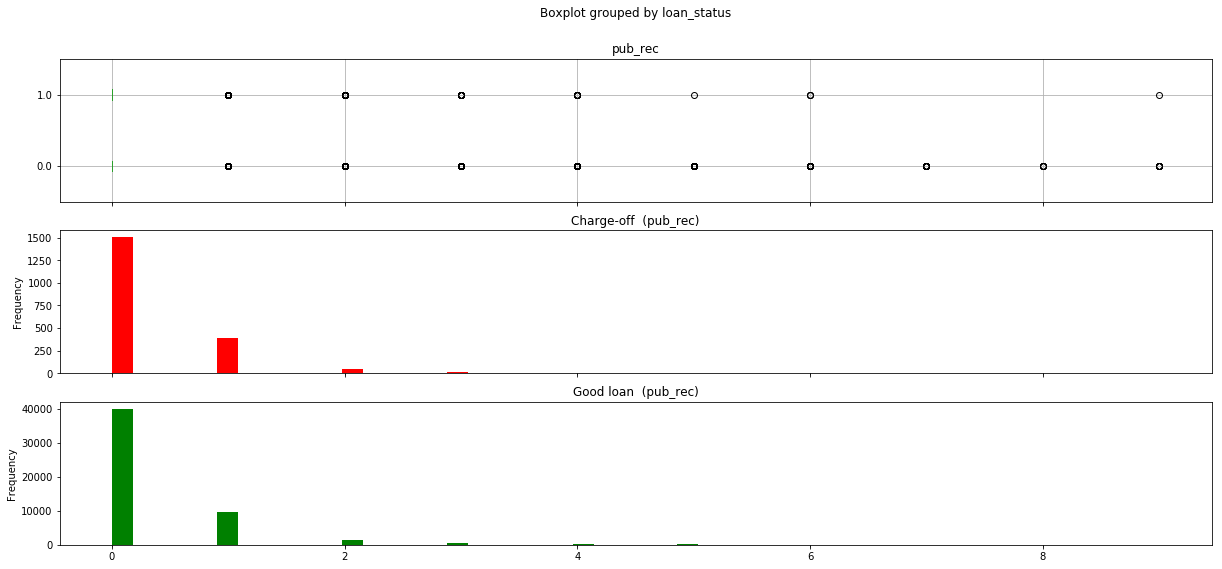

Missing values for revol_bal 0


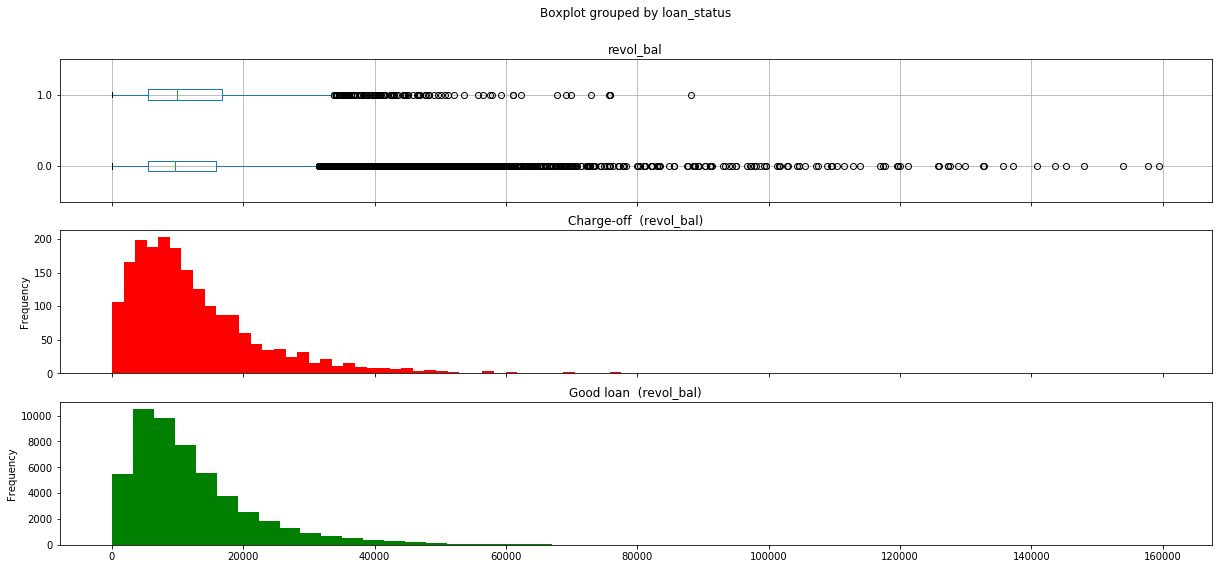

Missing values for revol_util 0


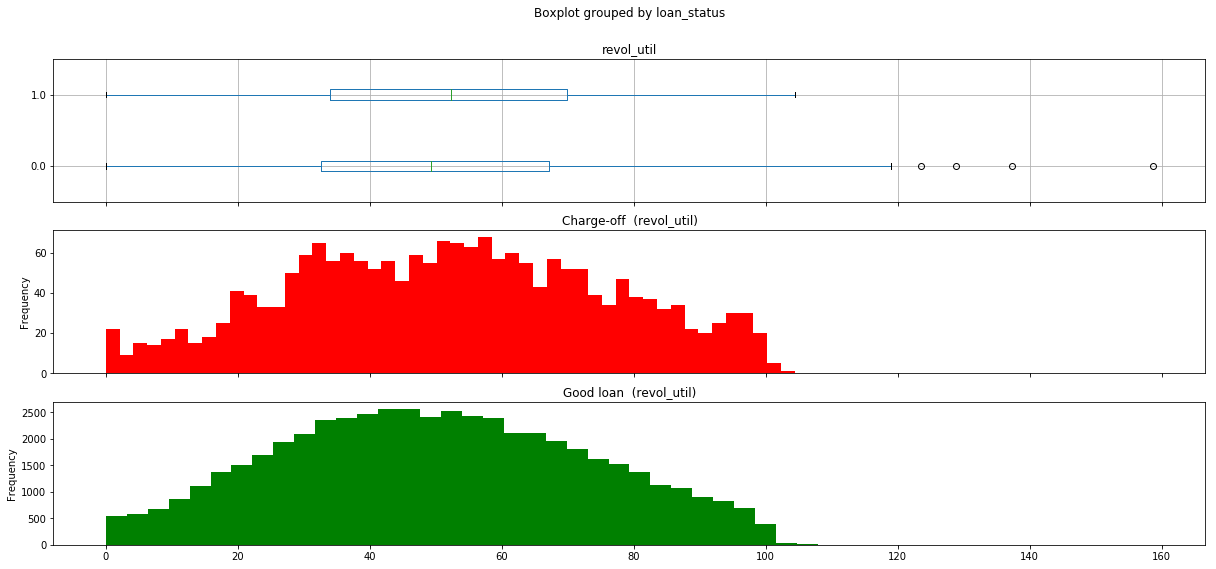

Missing values for total_acc 0


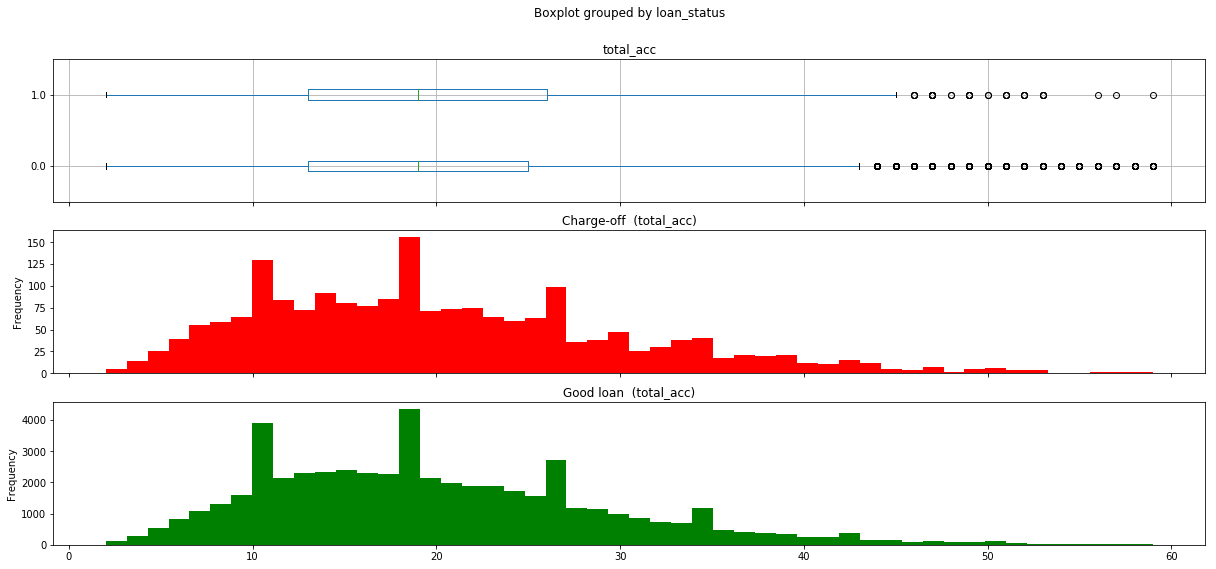

Missing values for initial_list_status 0


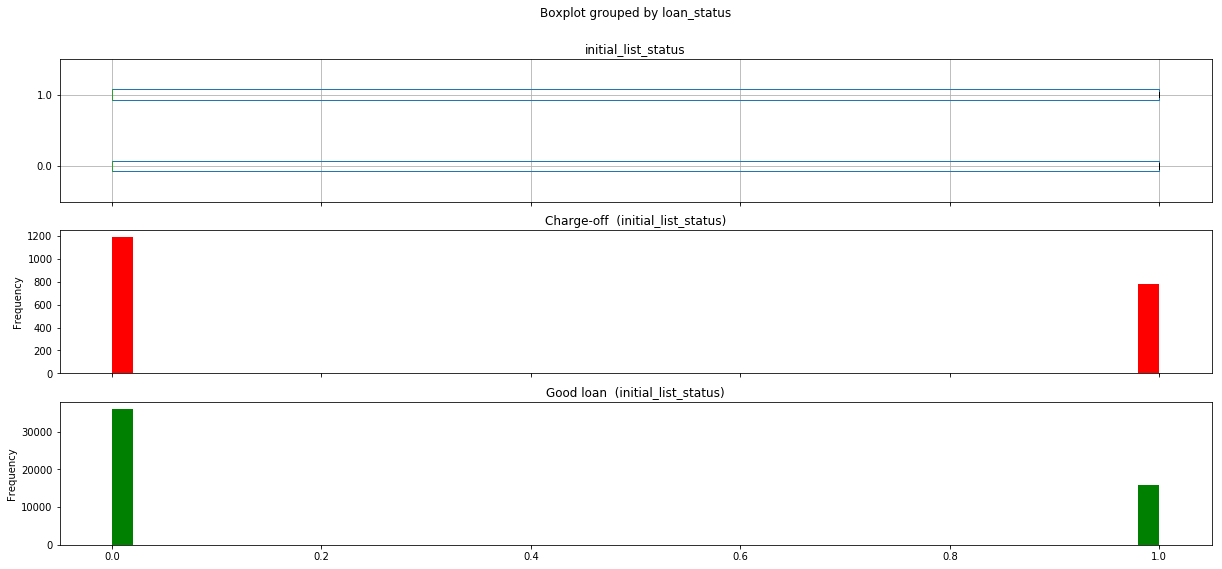

Missing values for collections_12_mths_ex_med 0


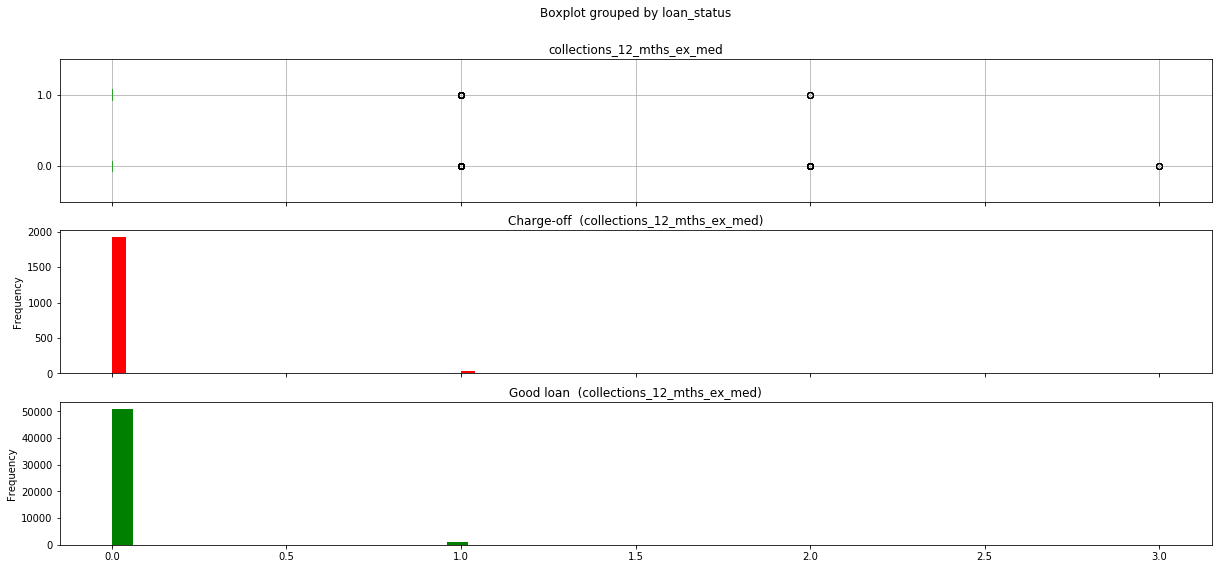

Missing values for application_type 0


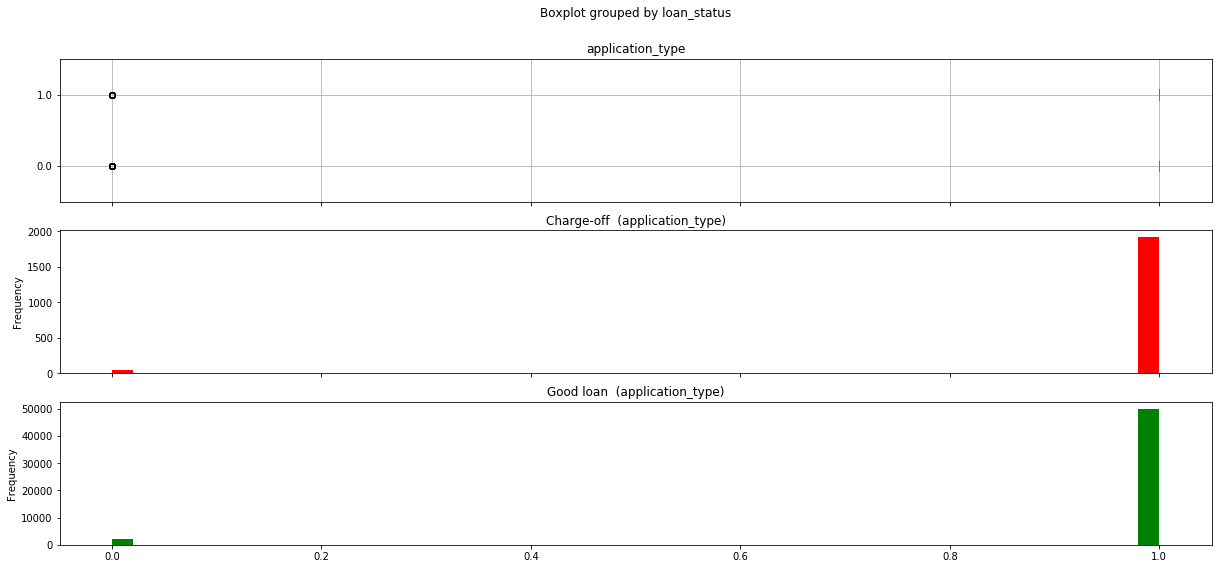

Missing values for annual_inc_joint 0


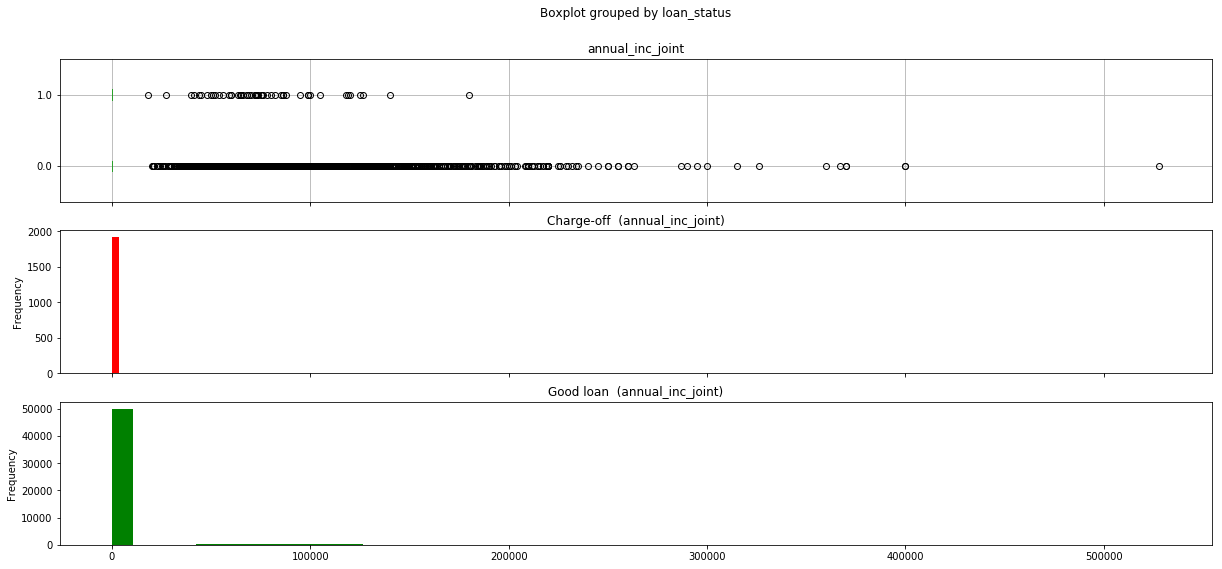

Missing values for dti_joint 0


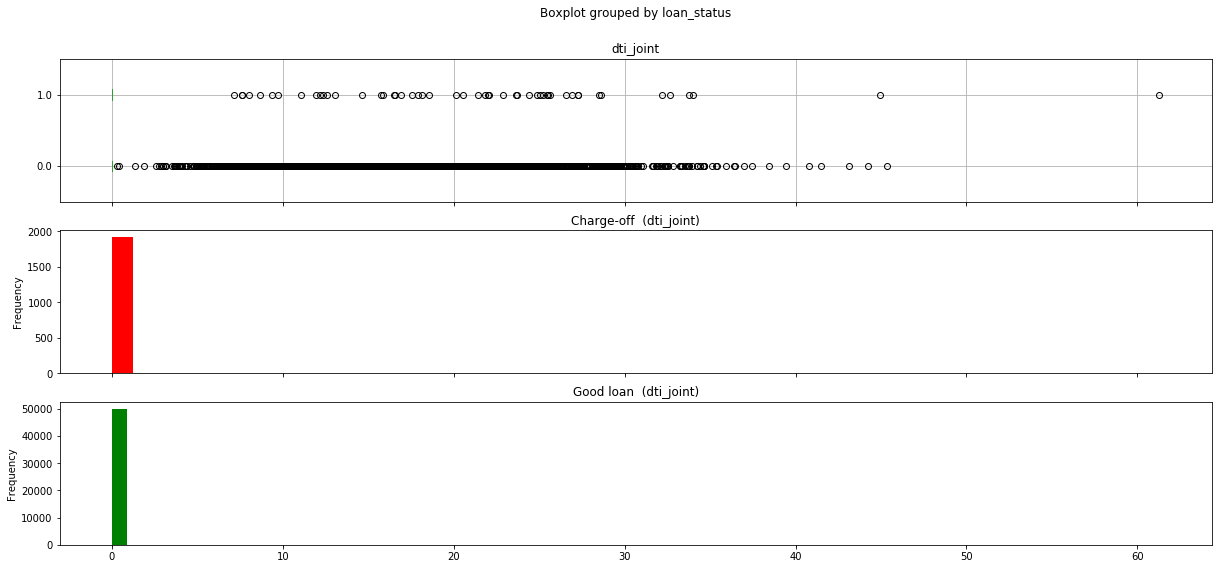

Missing values for acc_now_delinq 0


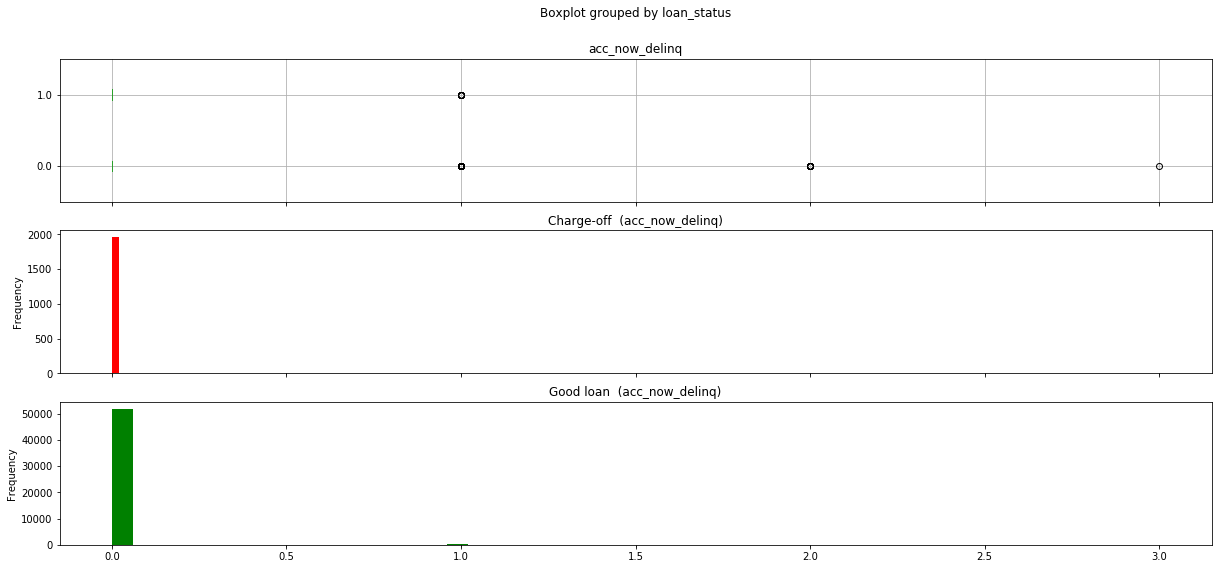

Missing values for tot_coll_amt 0


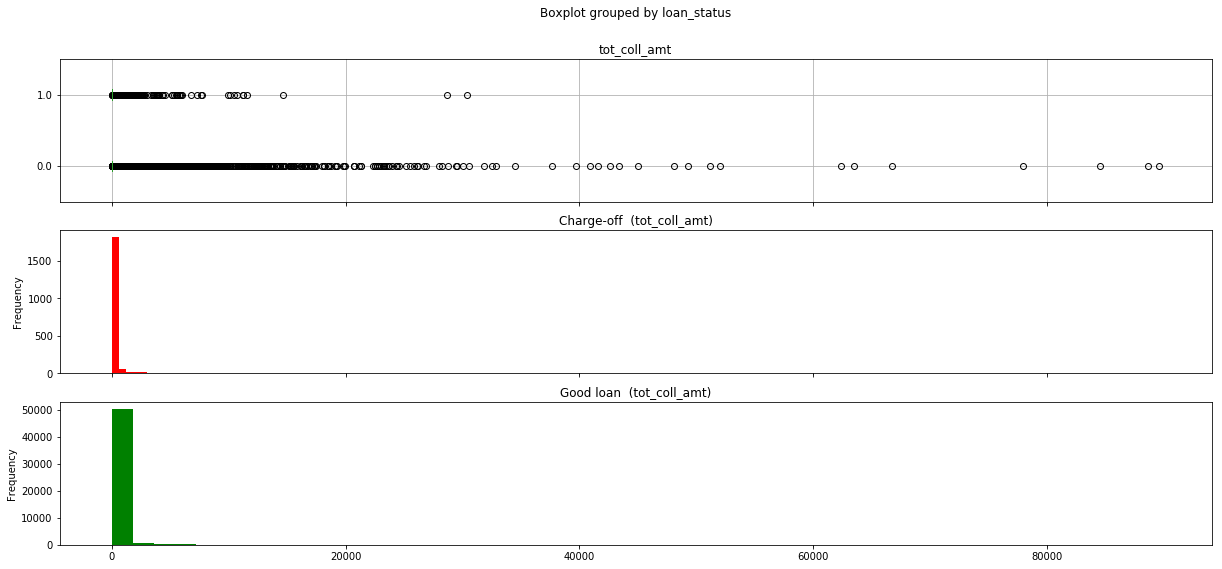

Missing values for tot_cur_bal 0


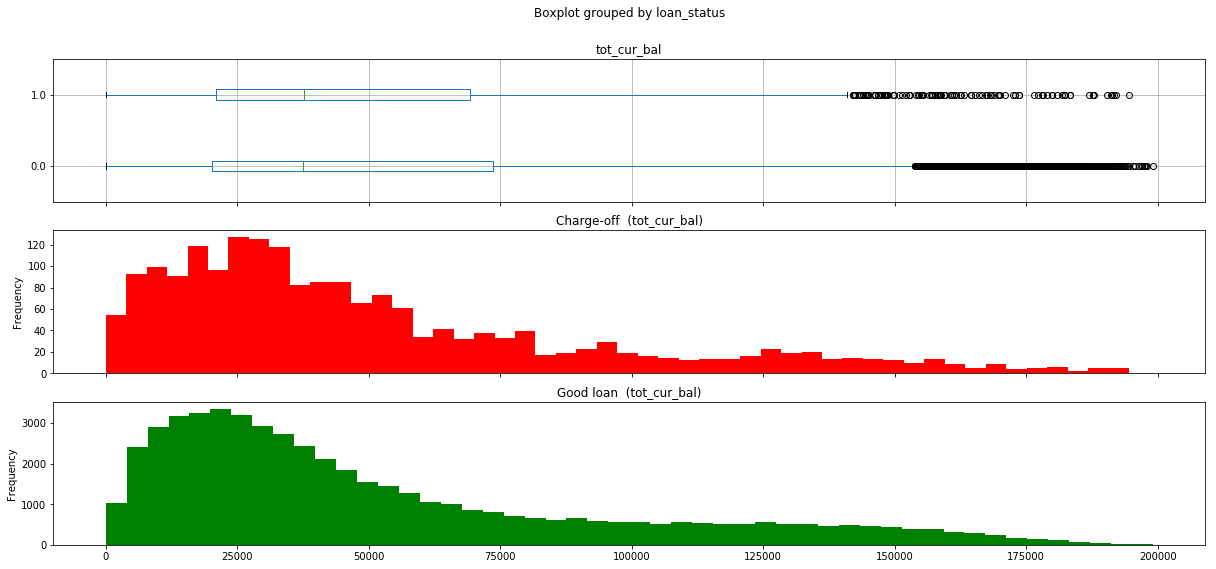

Missing values for open_acc_6m 0


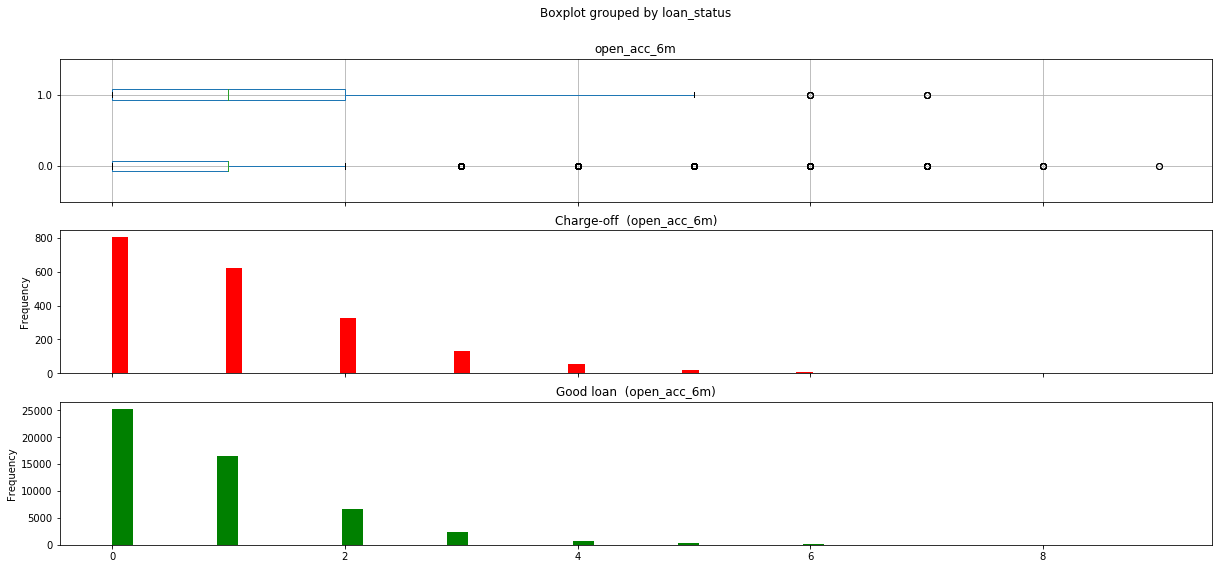

Missing values for open_act_il 0


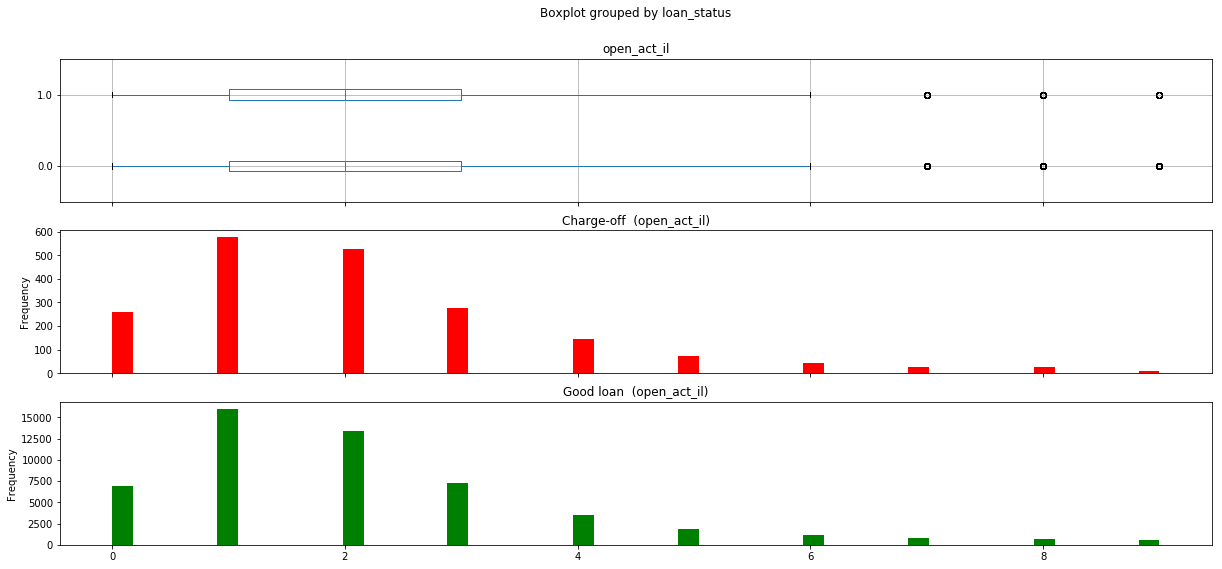

Missing values for open_il_12m 0


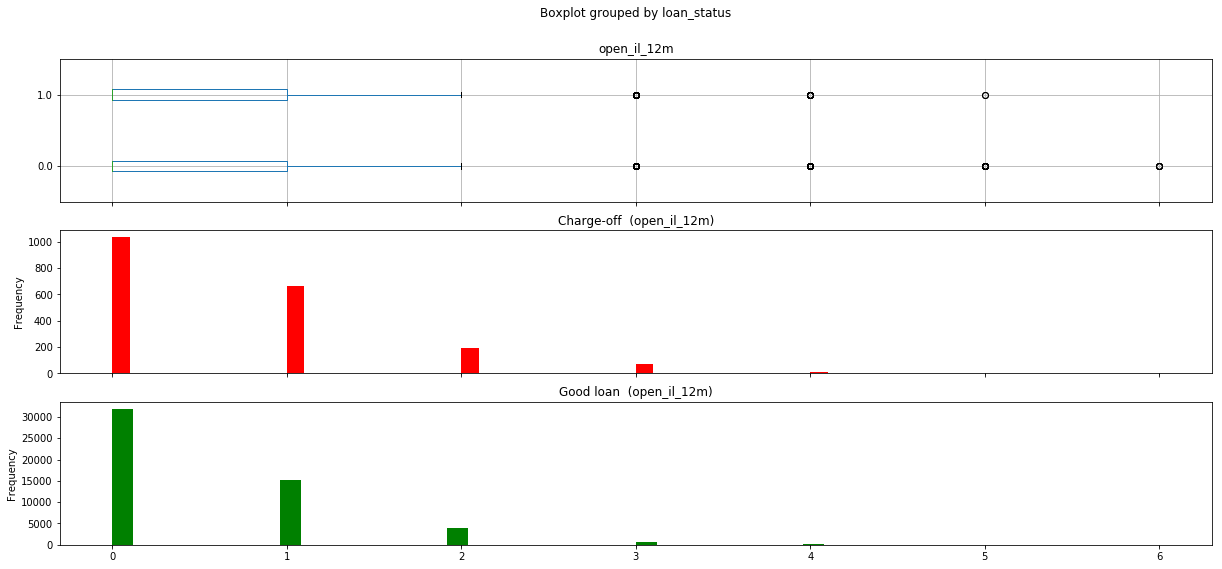

Missing values for open_il_24m 0


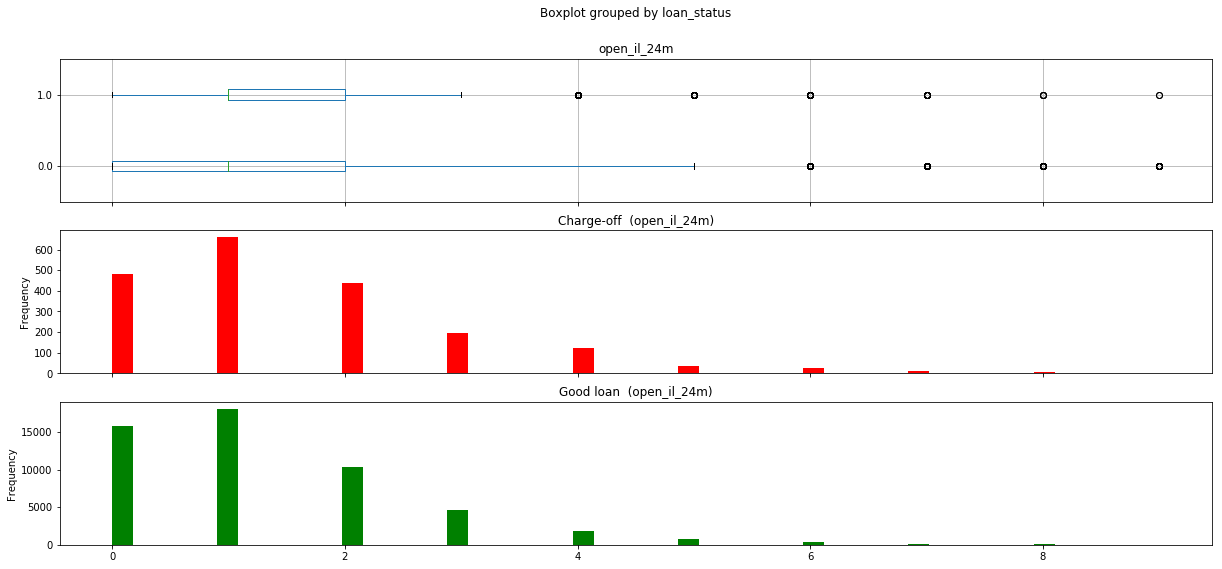

Missing values for mths_since_rcnt_il 0


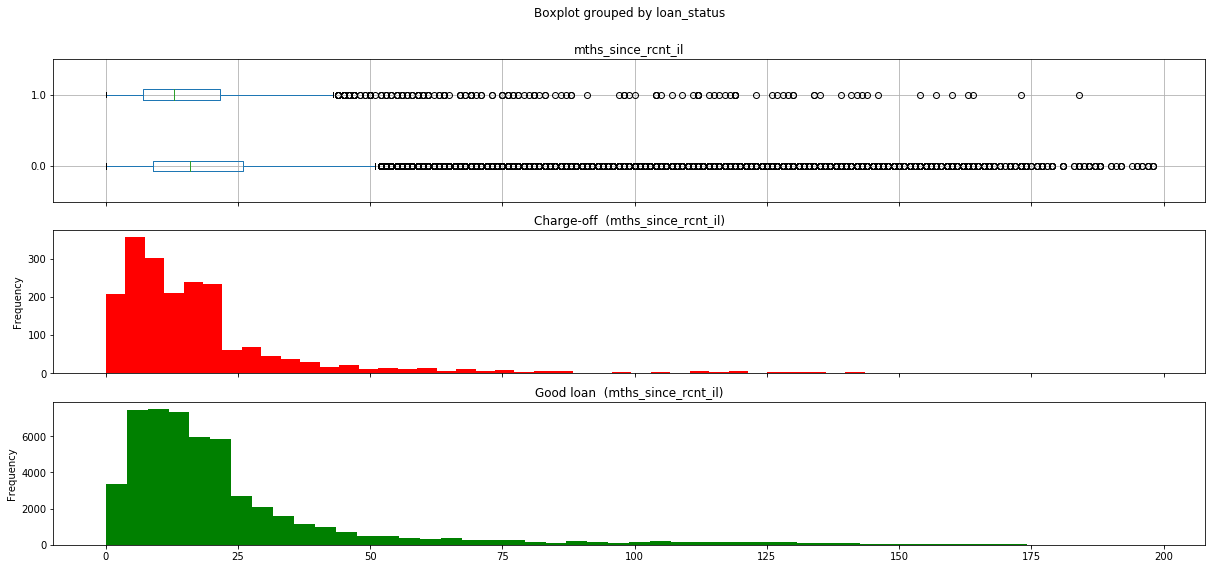

Missing values for total_bal_il 0


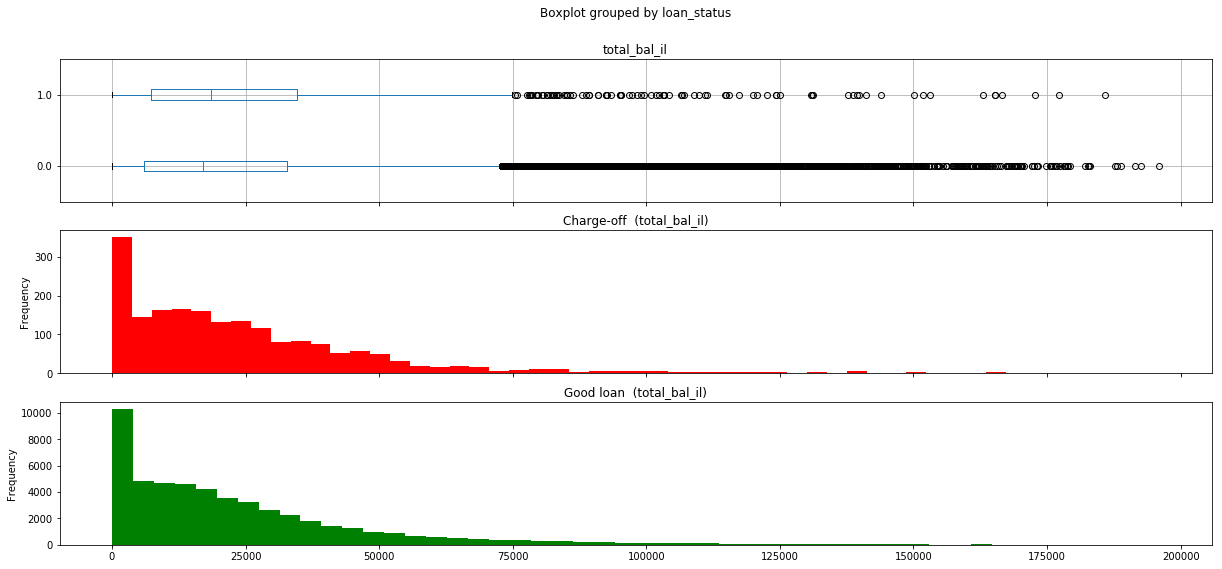

Missing values for il_util 0


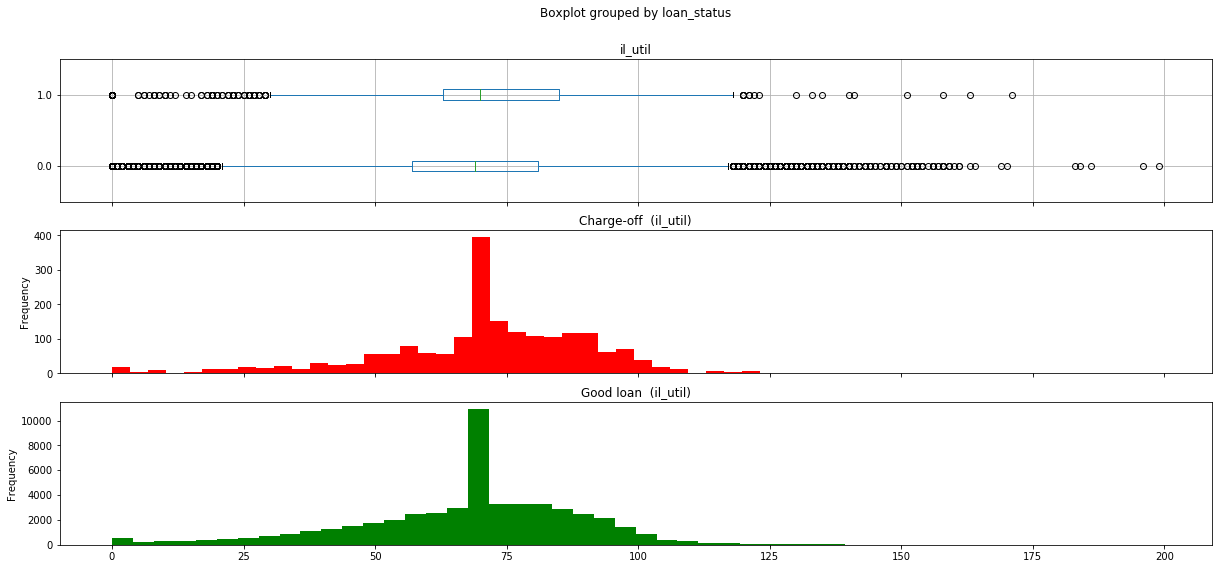

Missing values for open_rv_12m 0


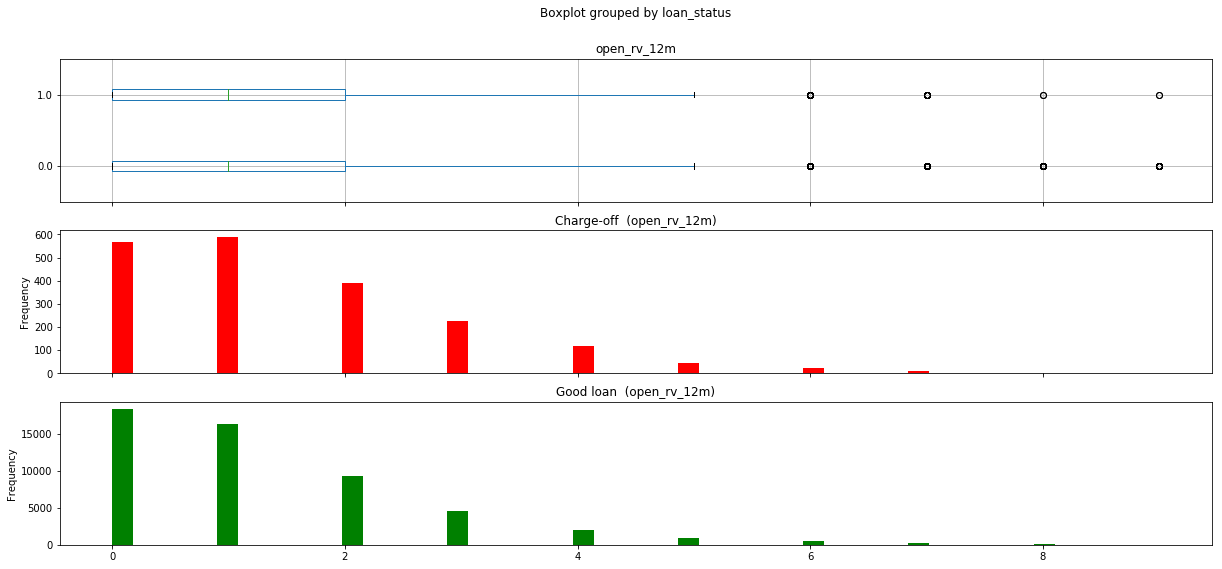

Missing values for open_rv_24m 0


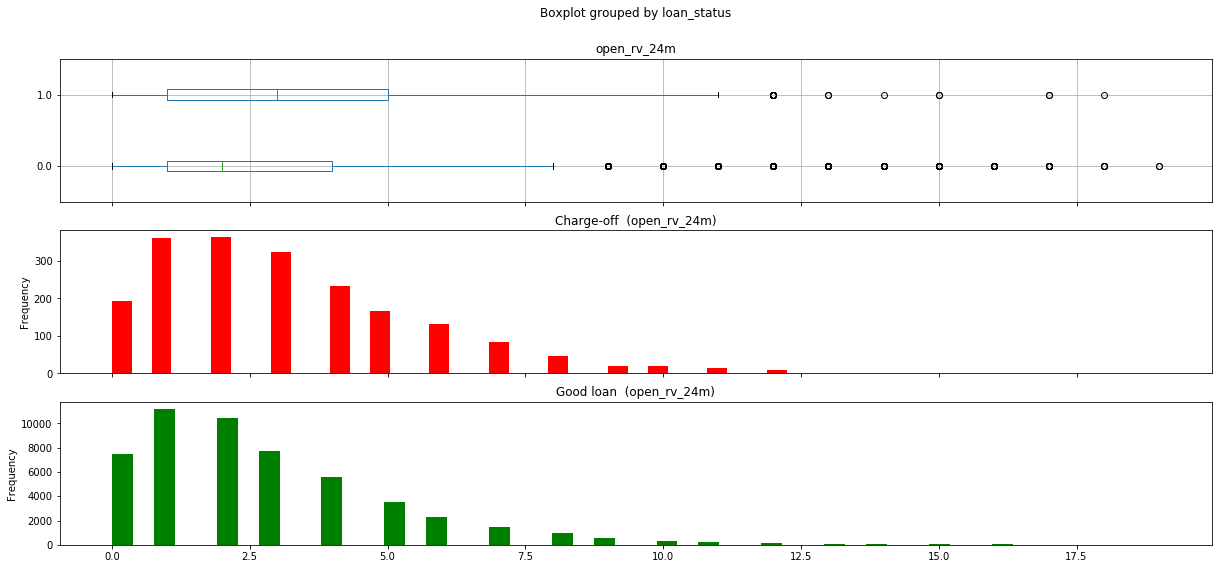

Missing values for max_bal_bc 0


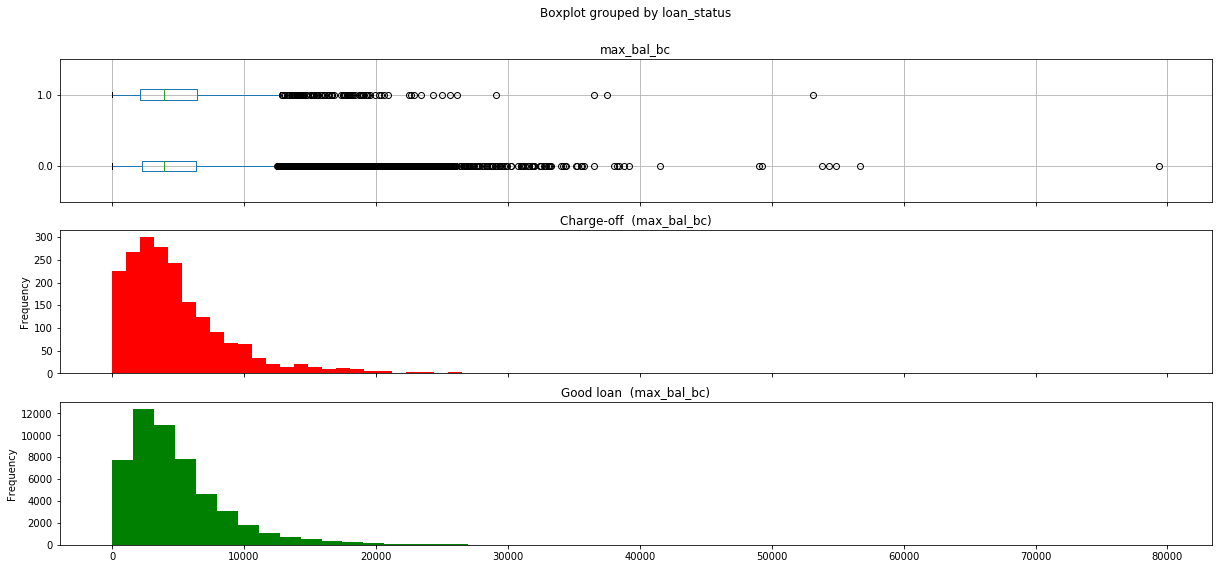

Missing values for all_util 0


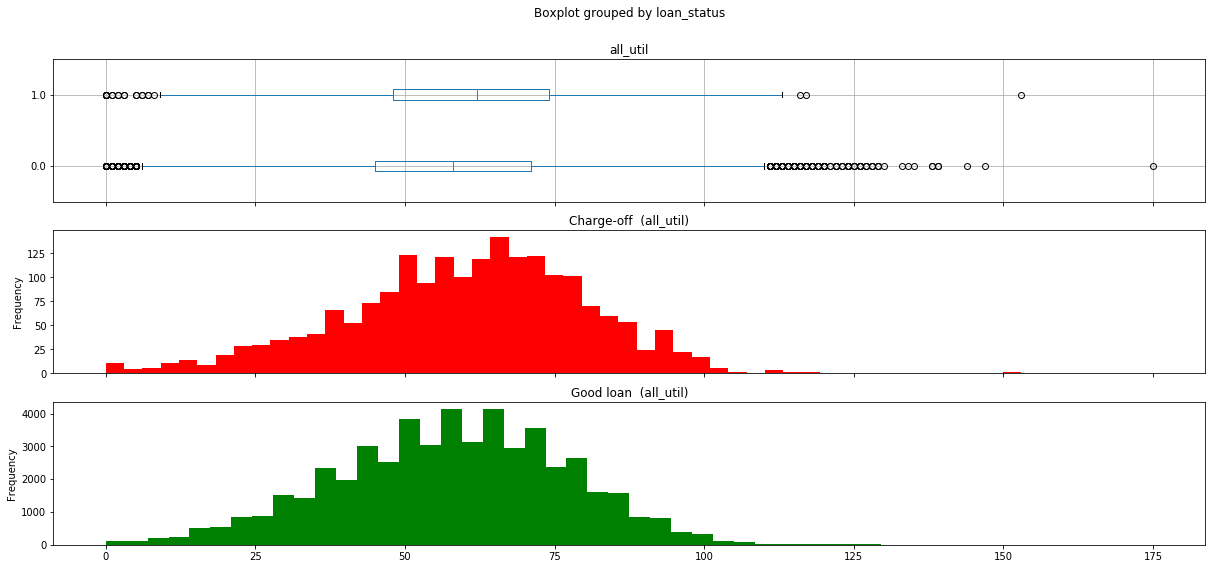

Missing values for total_rev_hi_lim 0


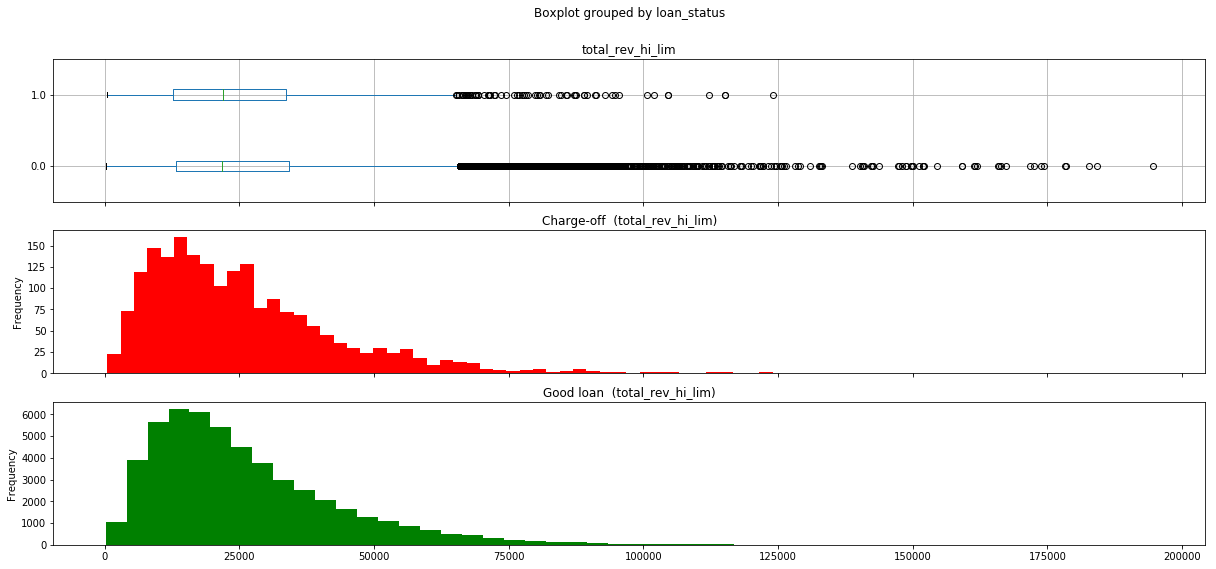

Missing values for inq_fi 0


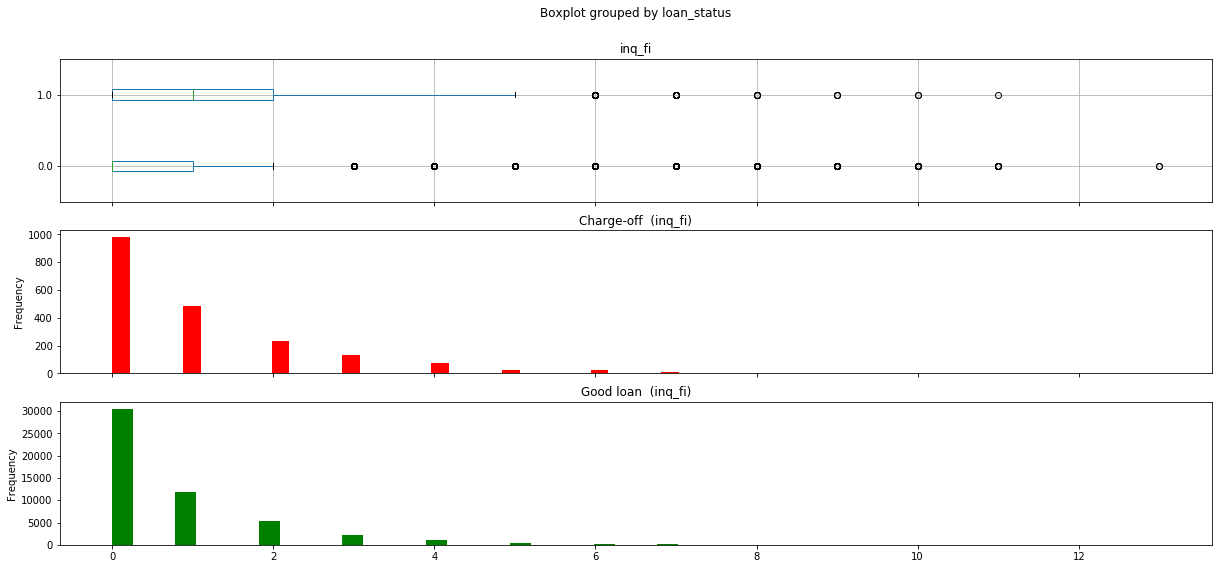

Missing values for total_cu_tl 0


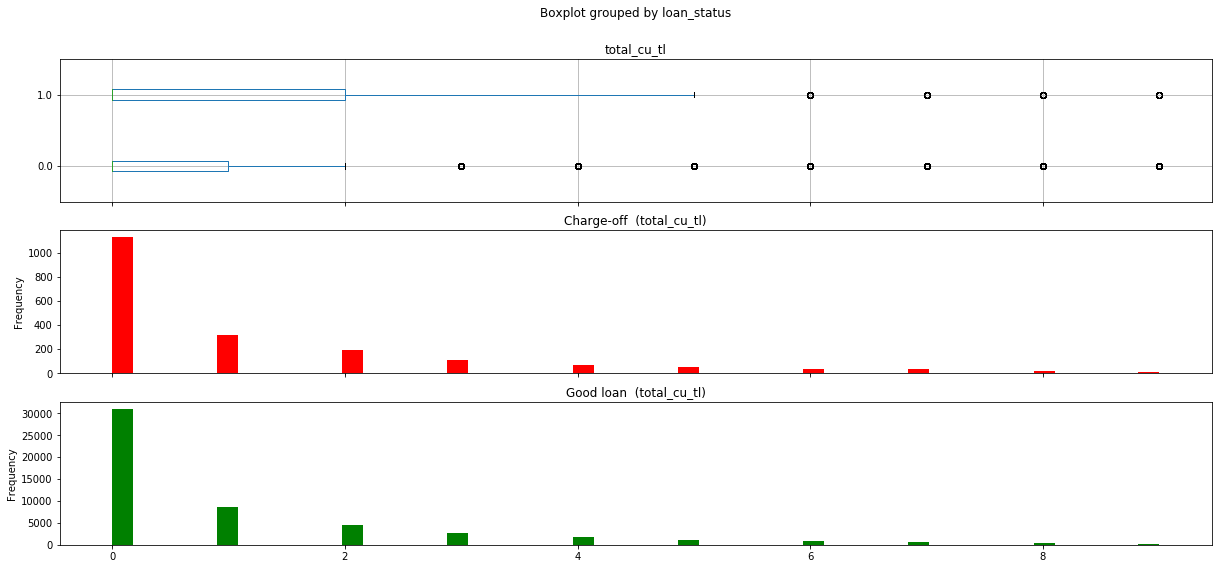

Missing values for inq_last_12m 0


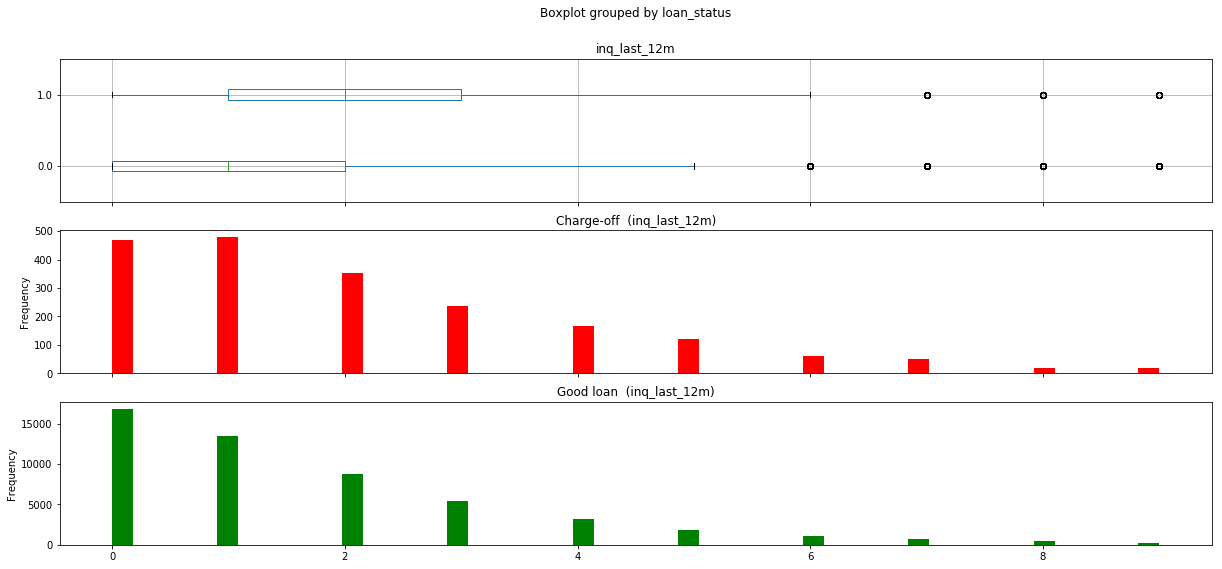

Missing values for acc_open_past_24mths 0


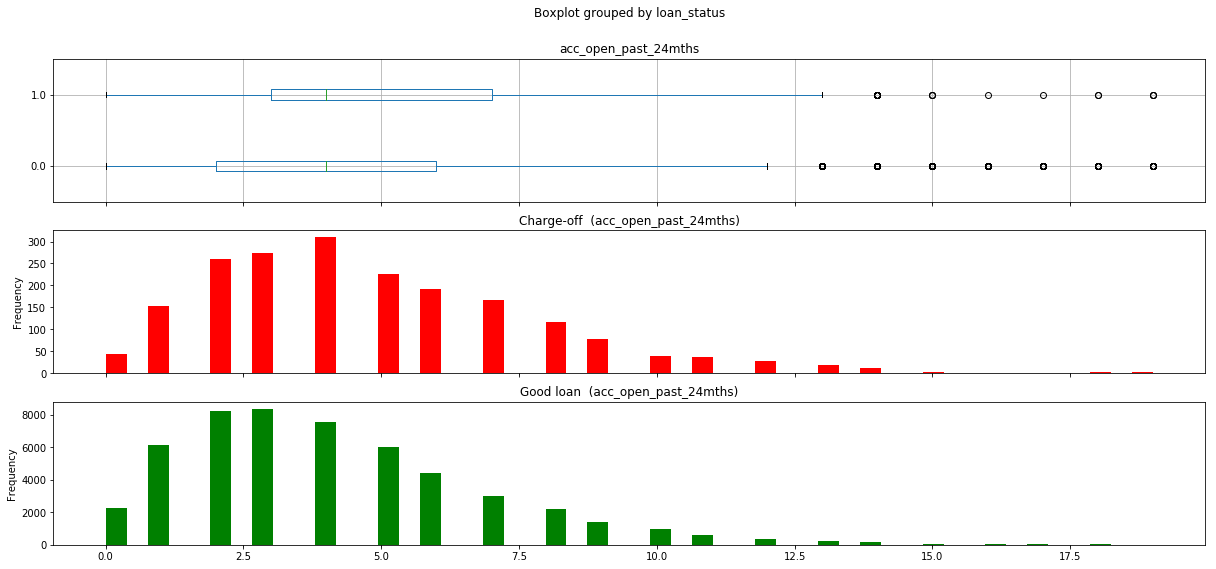

Missing values for avg_cur_bal 0


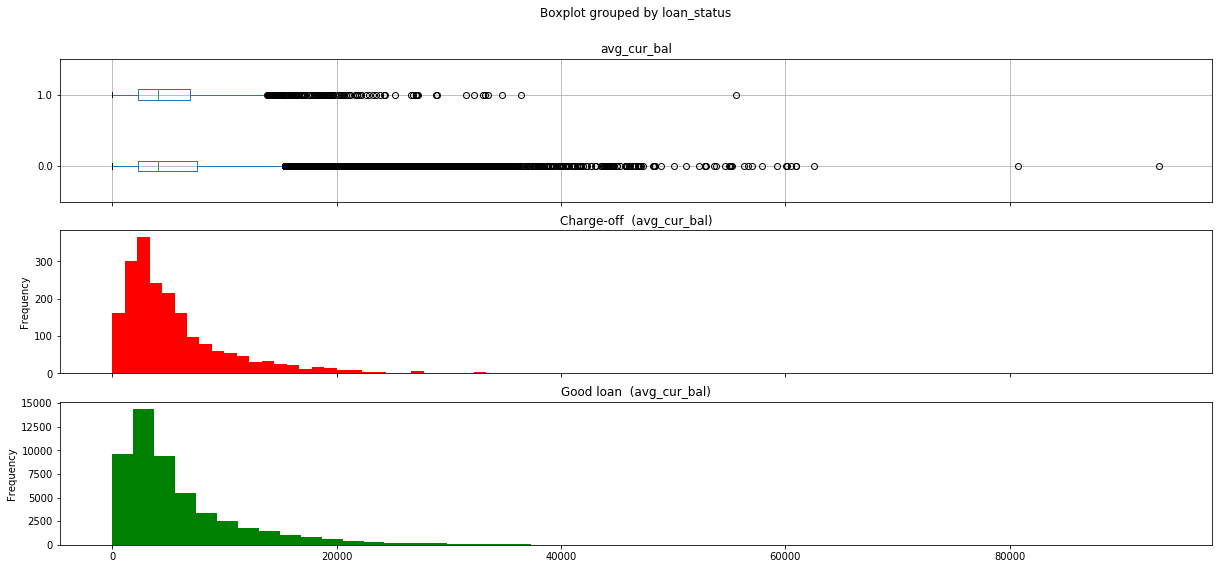

Missing values for bc_open_to_buy 0


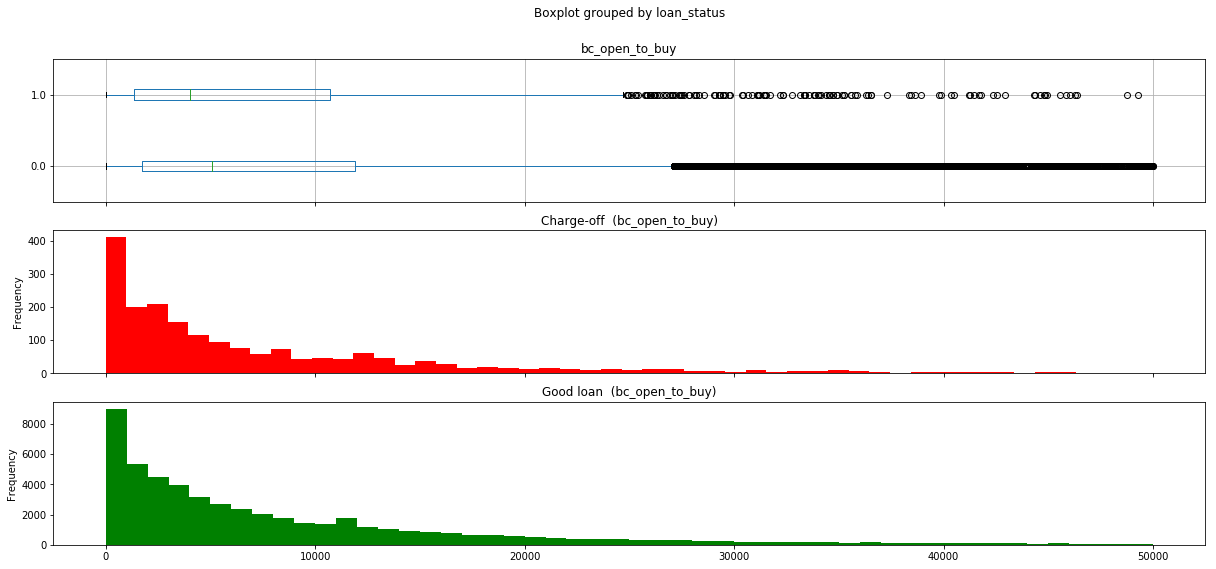

Missing values for bc_util 0


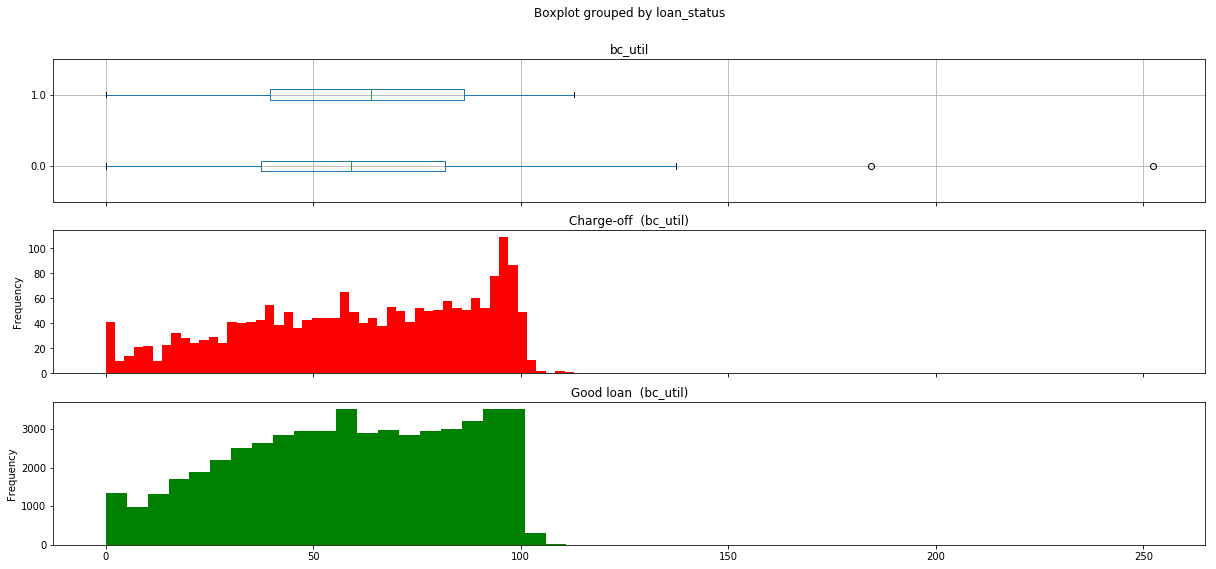

Missing values for chargeoff_within_12_mths 0


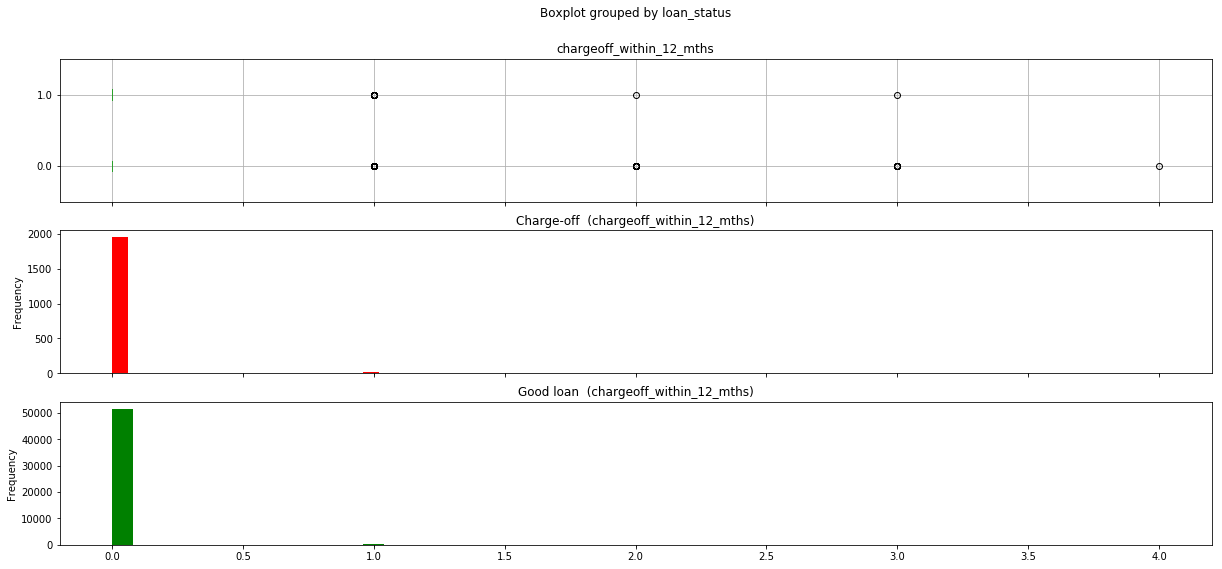

Missing values for delinq_amnt 0


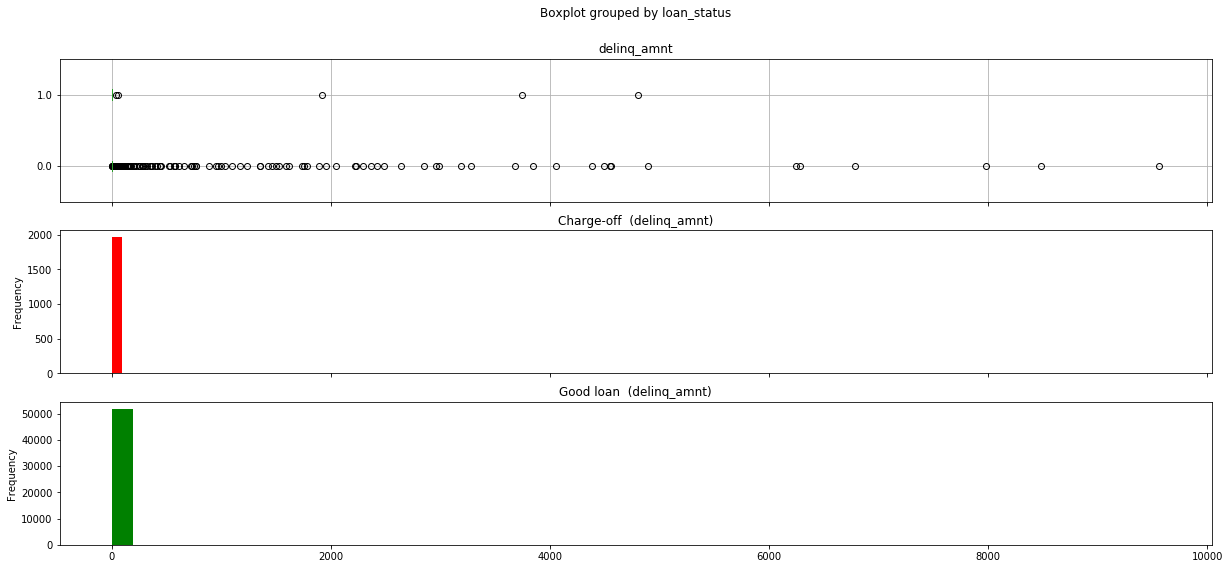

Missing values for mo_sin_old_il_acct 0


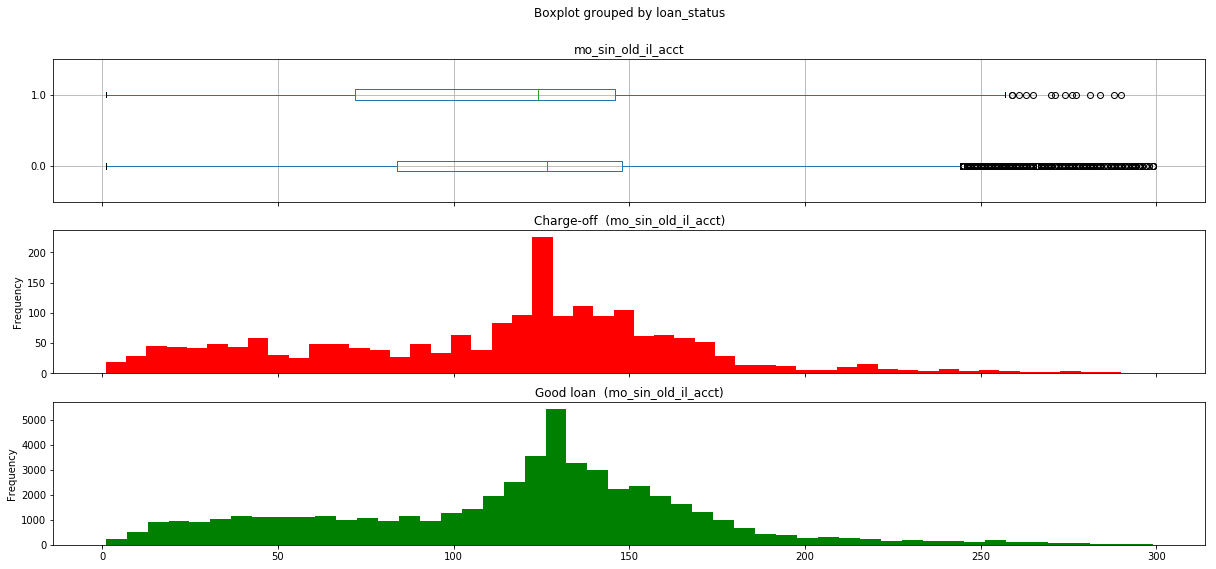

Missing values for mo_sin_old_rev_tl_op 0


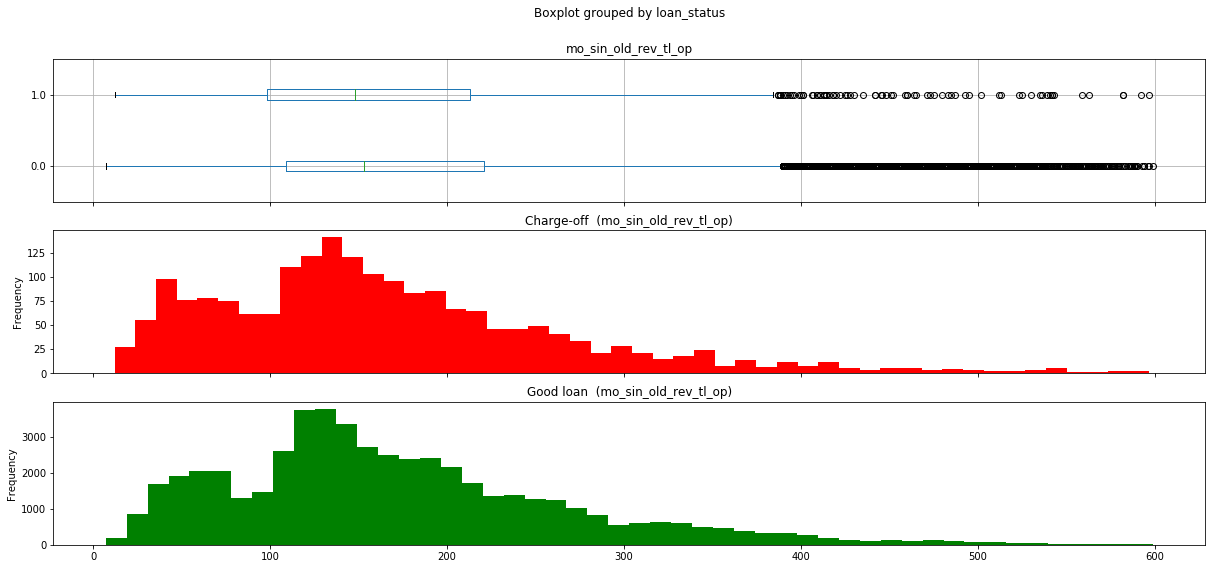

Missing values for mo_sin_rcnt_rev_tl_op 0


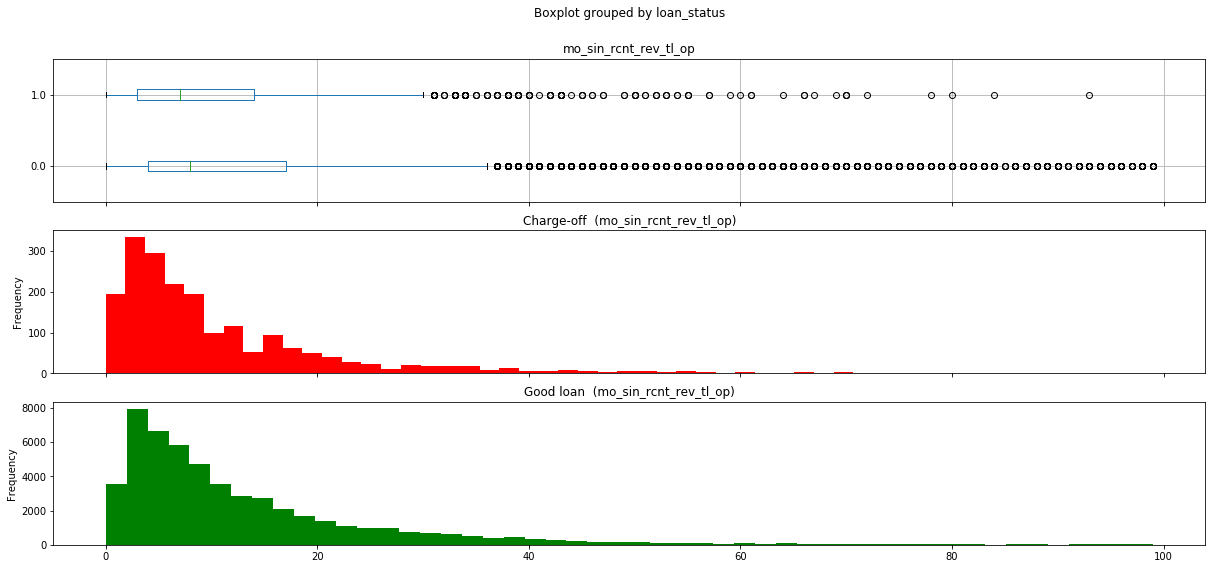

Missing values for mo_sin_rcnt_tl 0


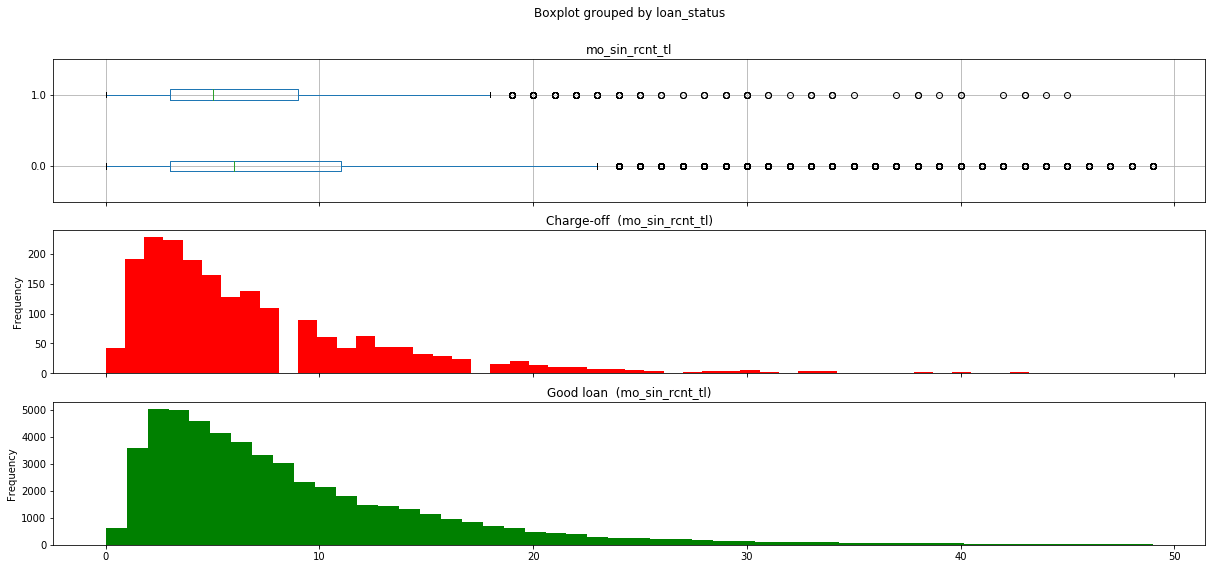

Missing values for mort_acc 0


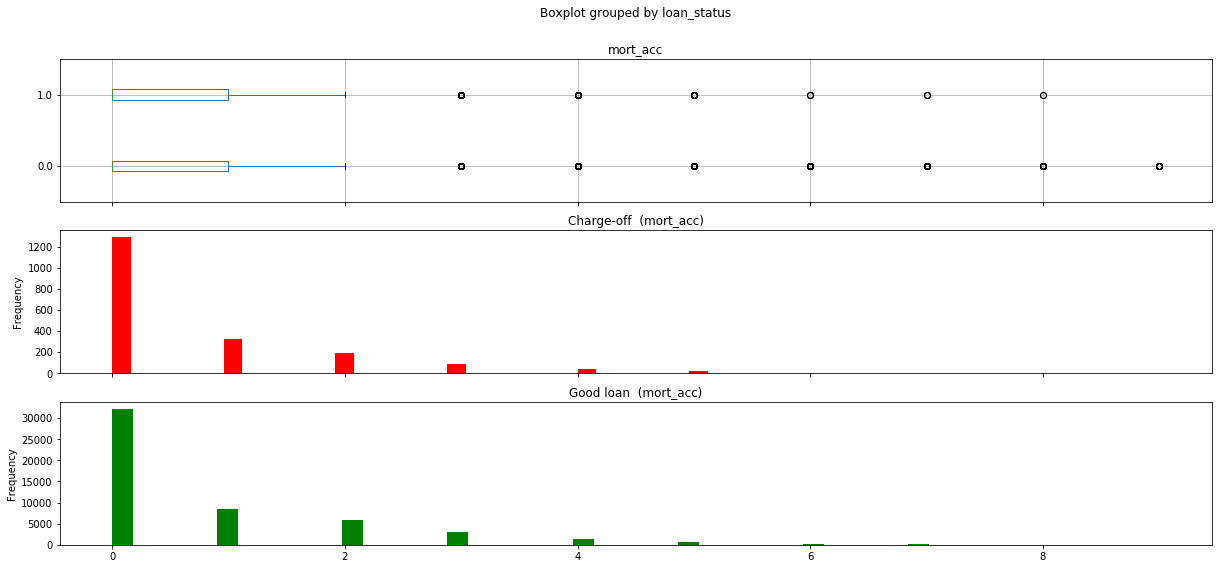

Missing values for mths_since_recent_bc 0


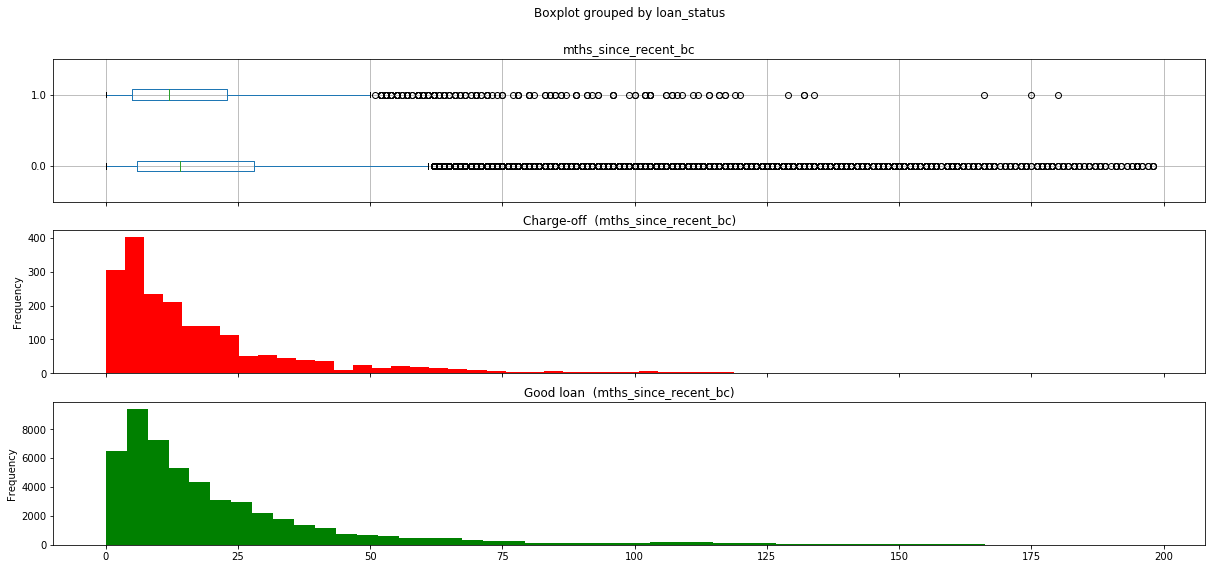

Missing values for mths_since_recent_inq 0


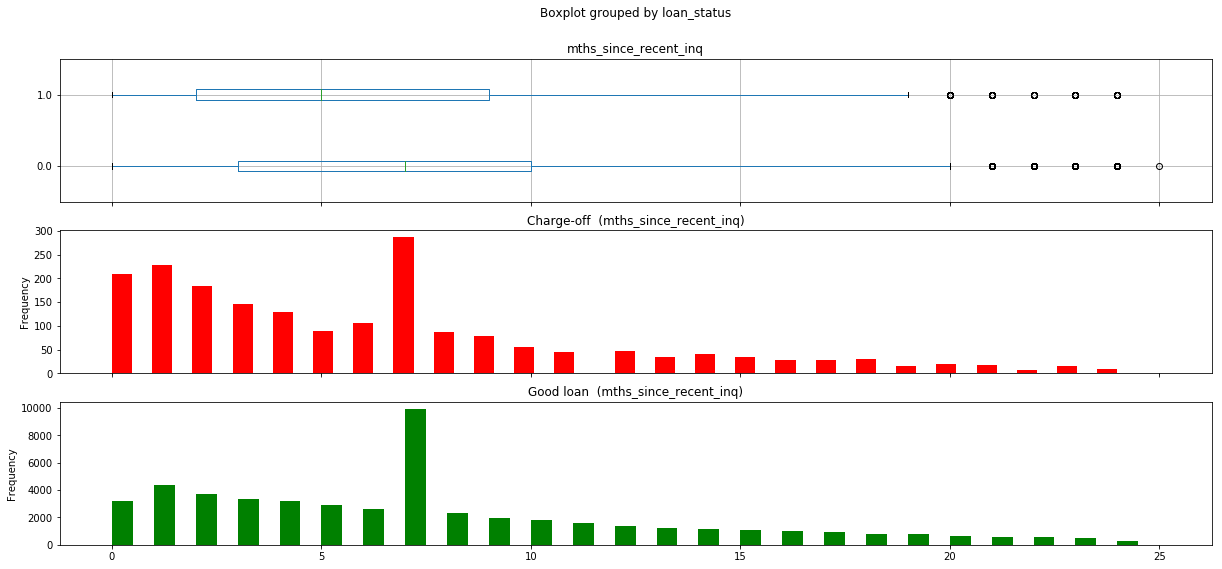

Missing values for num_accts_ever_120_pd 0


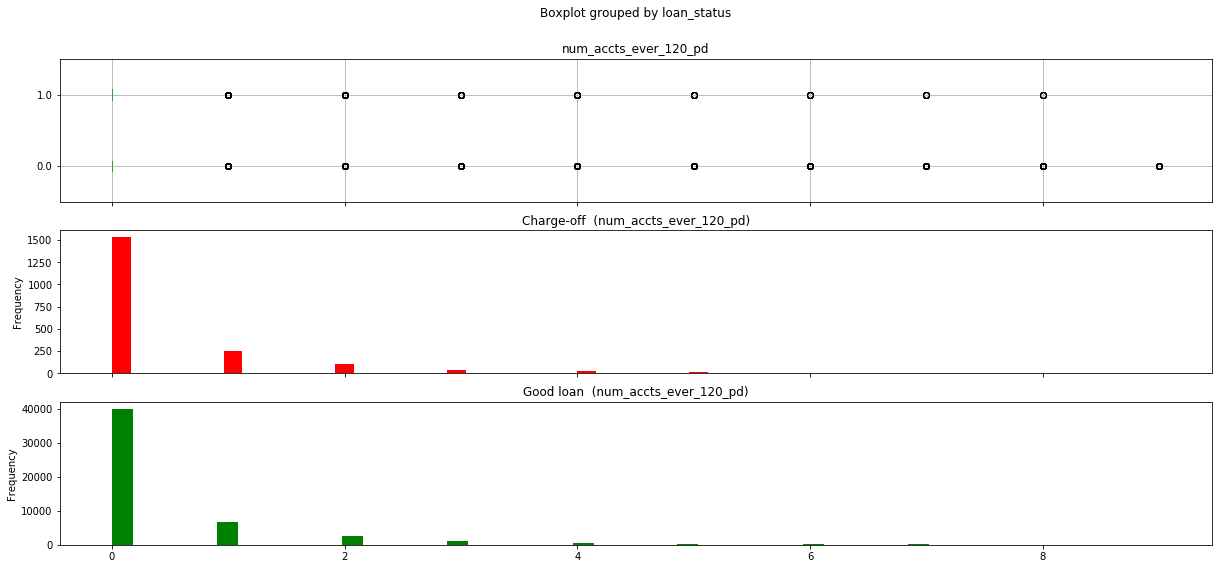

Missing values for num_actv_bc_tl 0


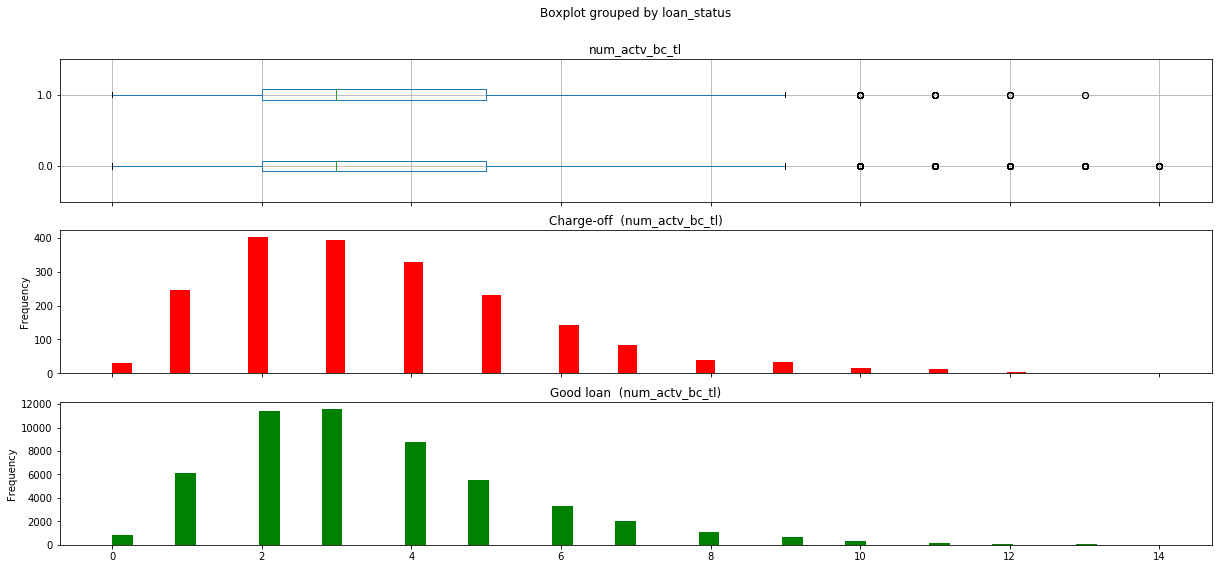

Missing values for num_actv_rev_tl 0


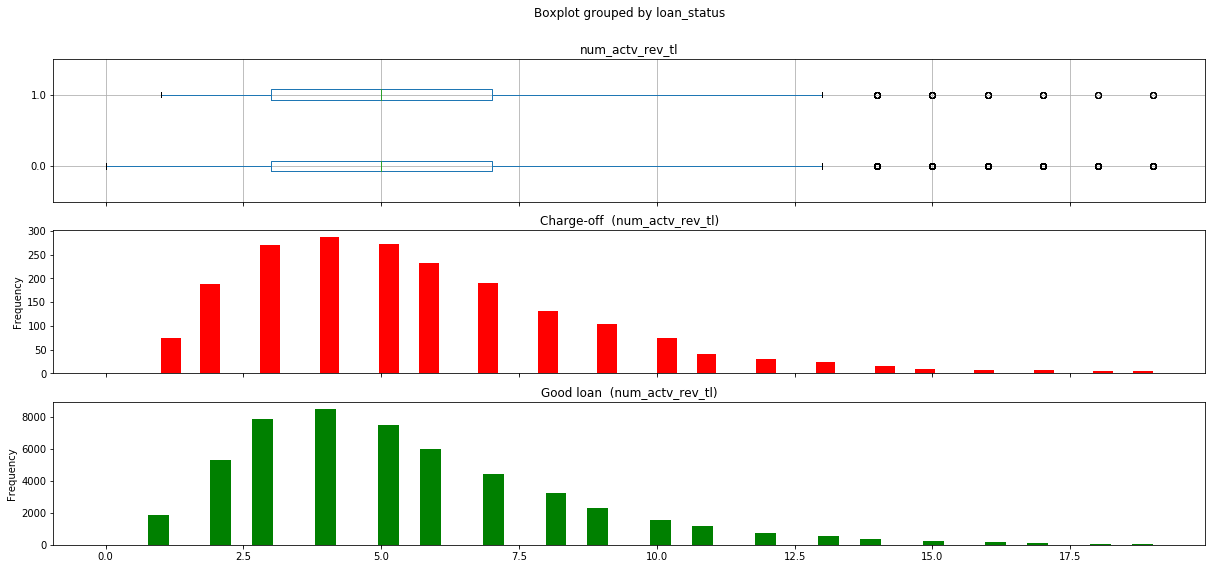

Missing values for num_bc_sats 0


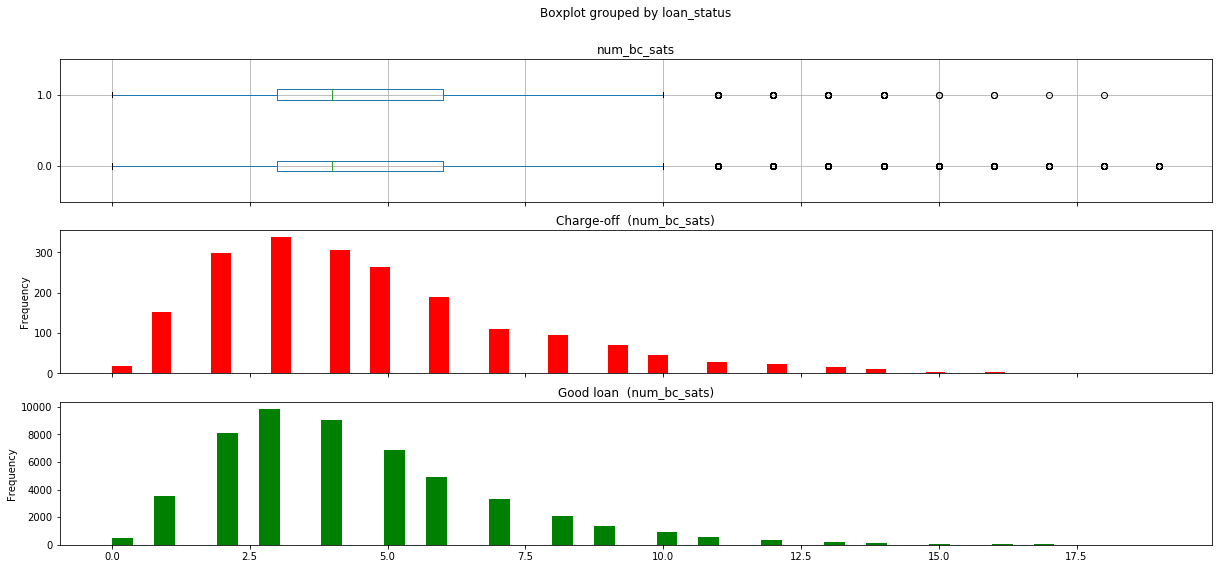

Missing values for num_bc_tl 0


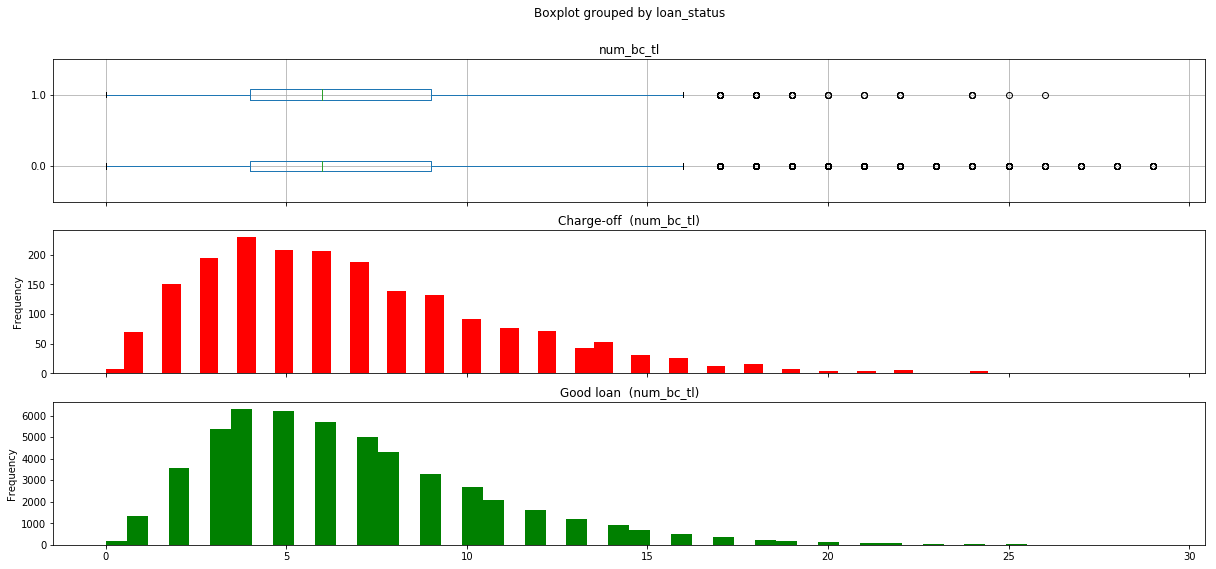

Missing values for num_il_tl 0


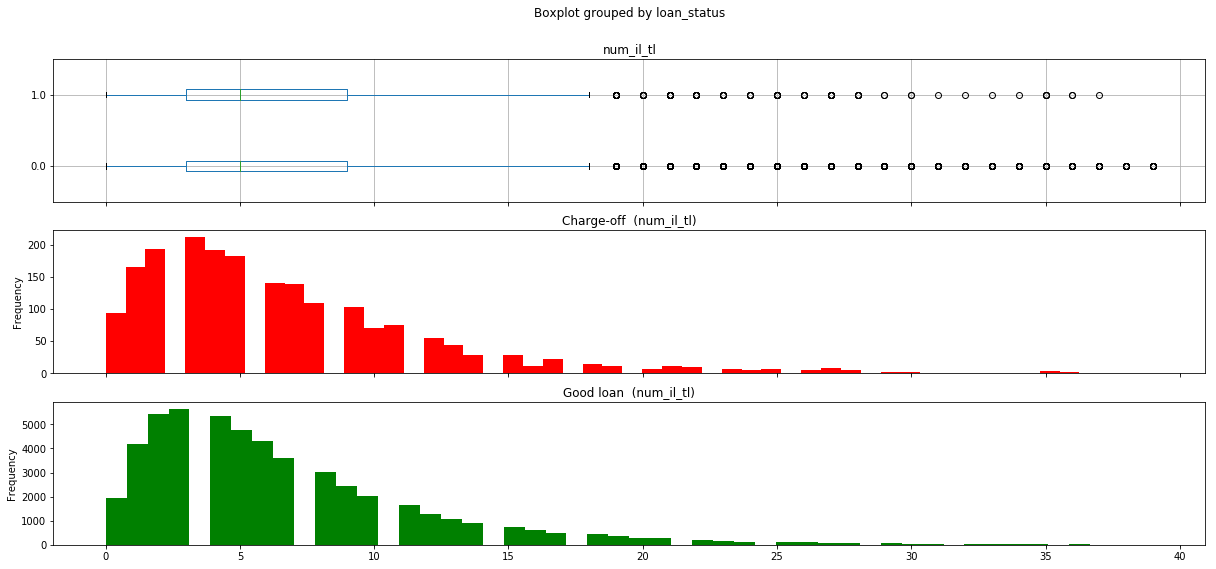

Missing values for num_op_rev_tl 0


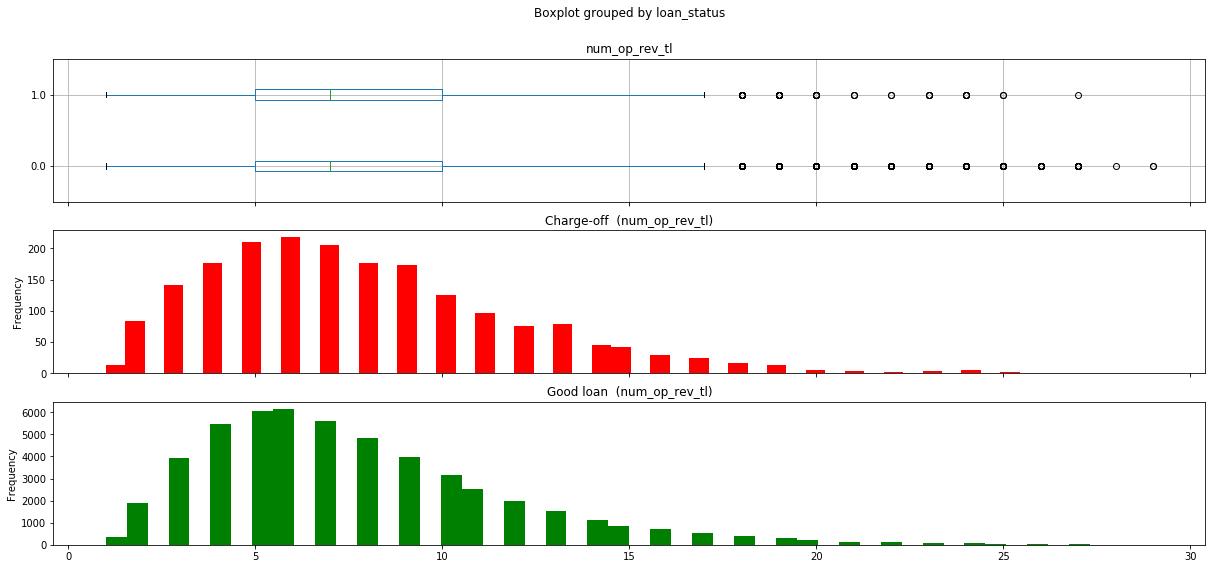

Missing values for num_rev_accts 0


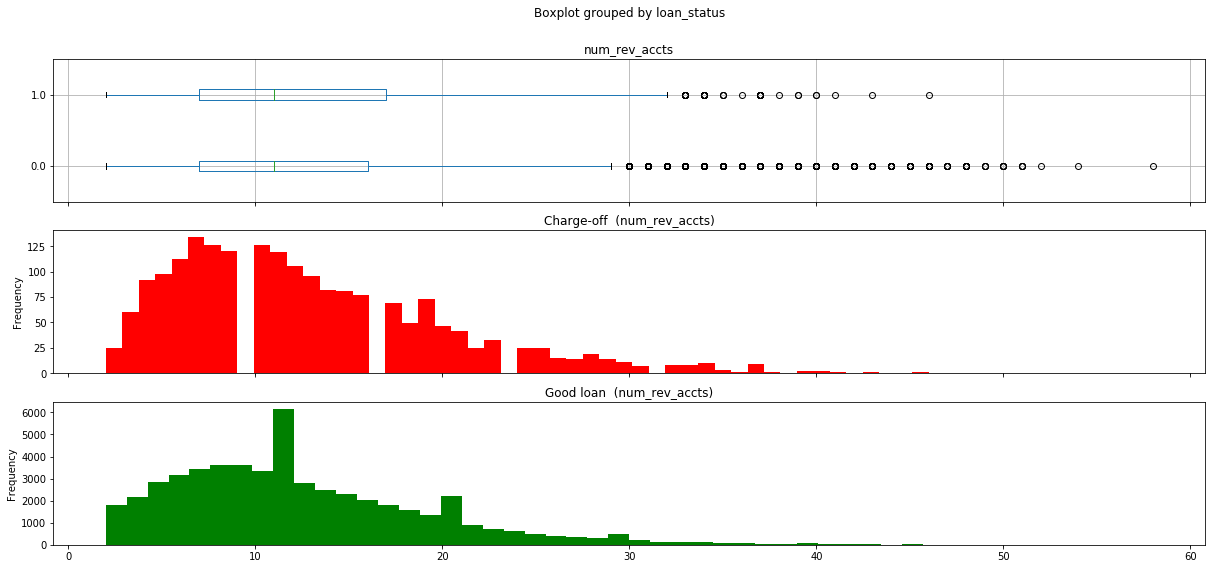

Missing values for num_rev_tl_bal_gt_0 0


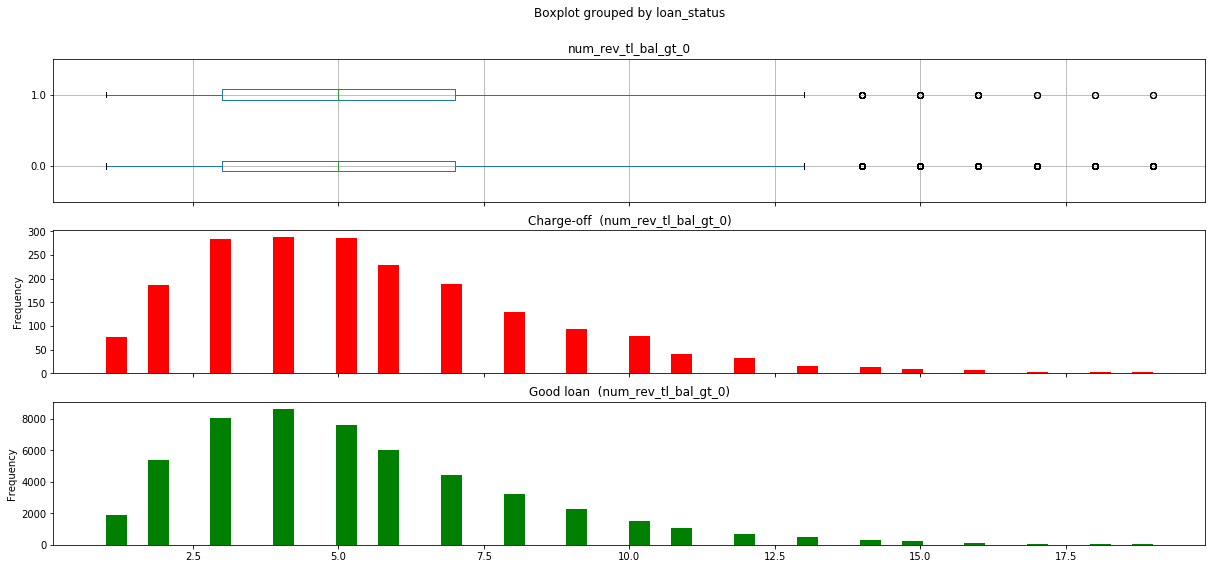

Missing values for num_sats 0


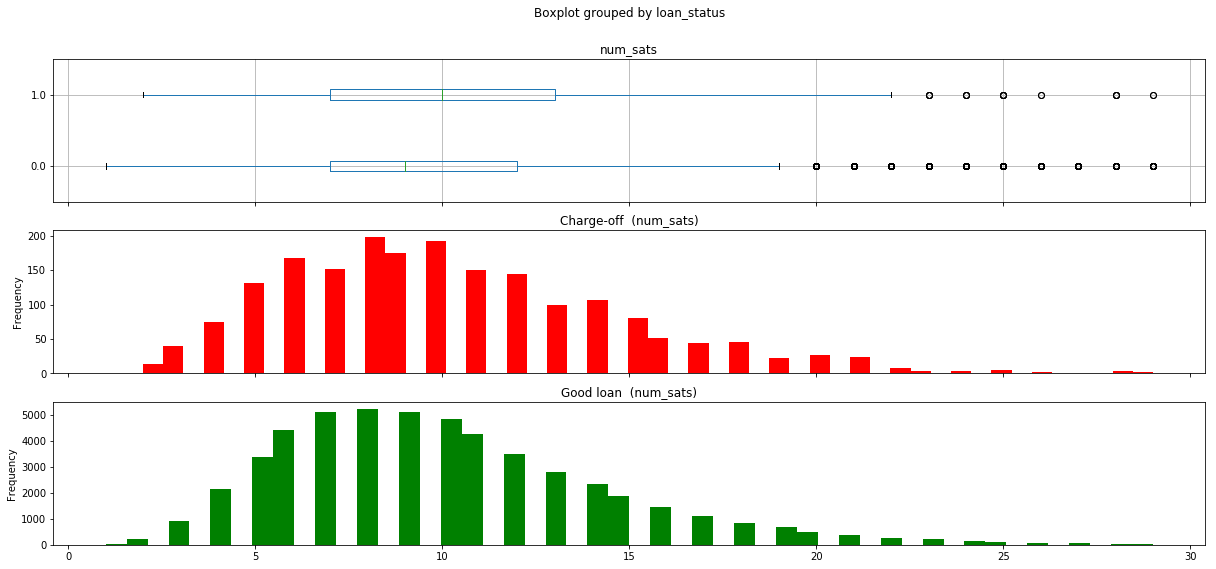

Missing values for num_tl_30dpd 0


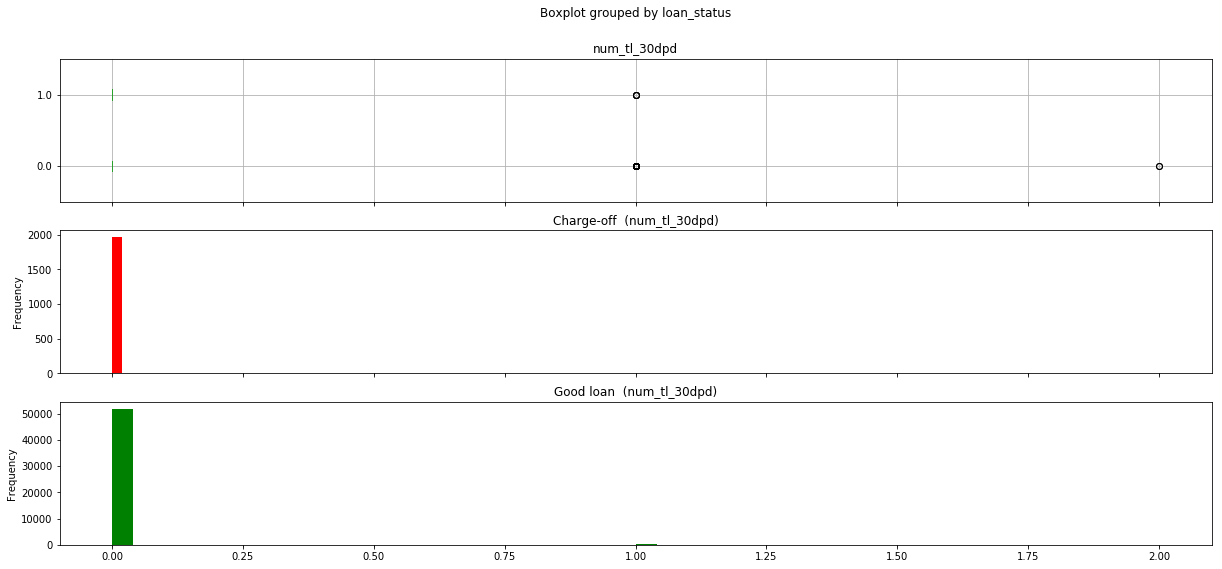

Missing values for num_tl_90g_dpd_24m 0


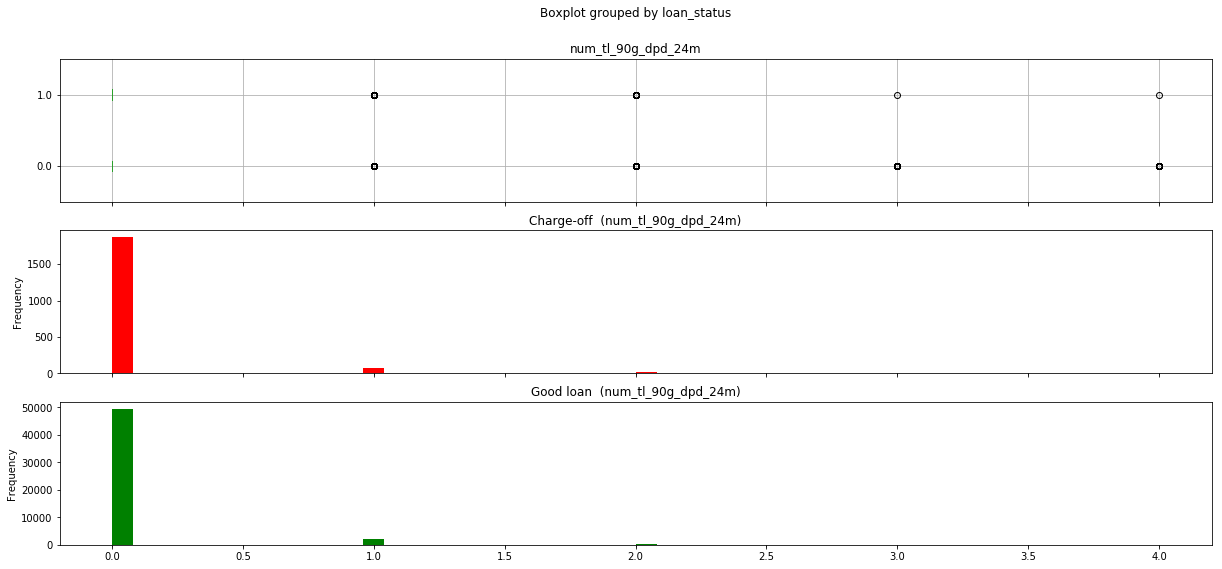

Missing values for num_tl_op_past_12m 0


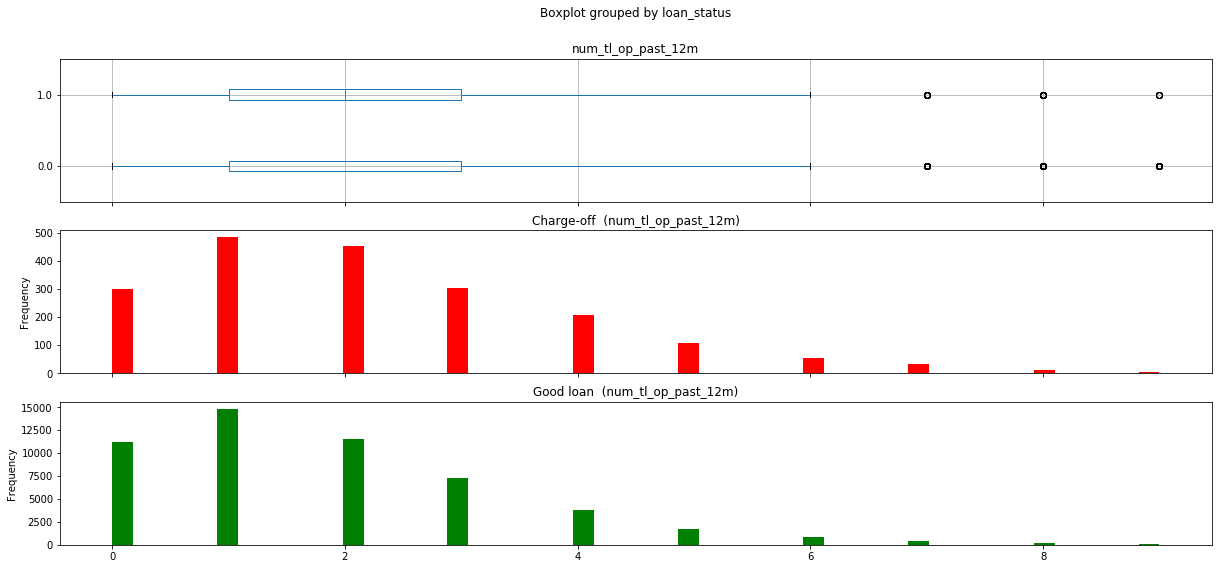

Missing values for pct_tl_nvr_dlq 0


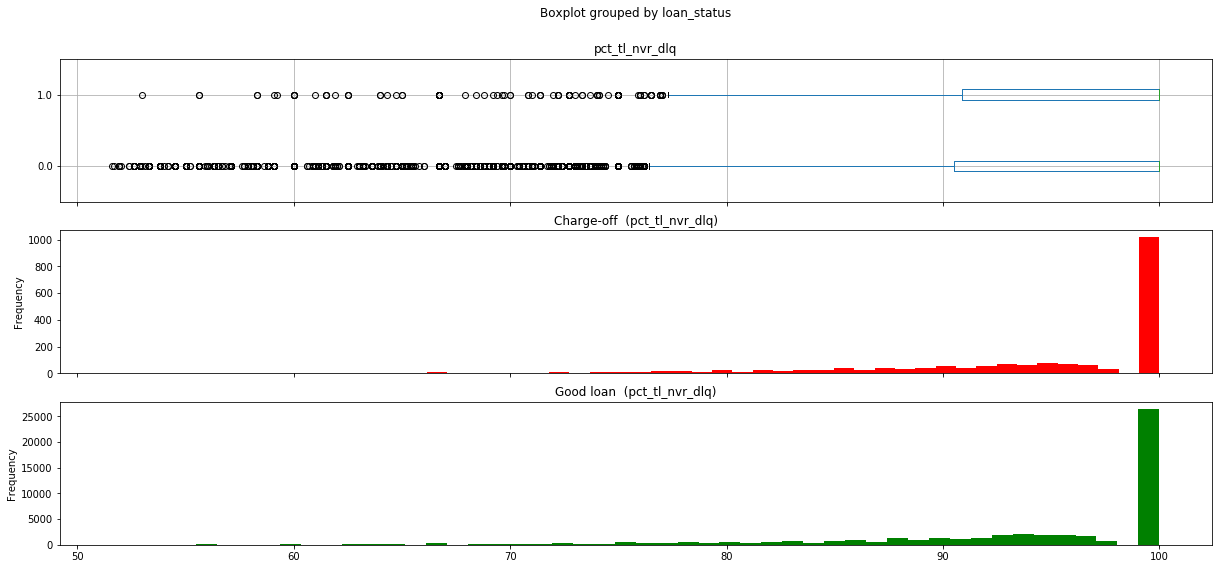

Missing values for percent_bc_gt_75 0


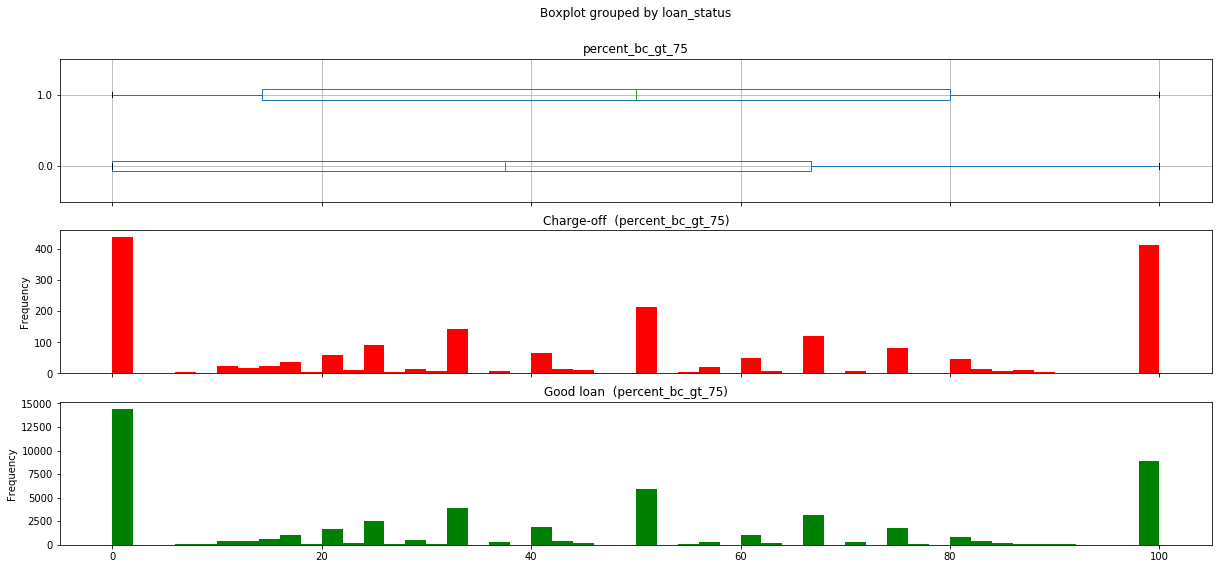

Missing values for pub_rec_bankruptcies 0


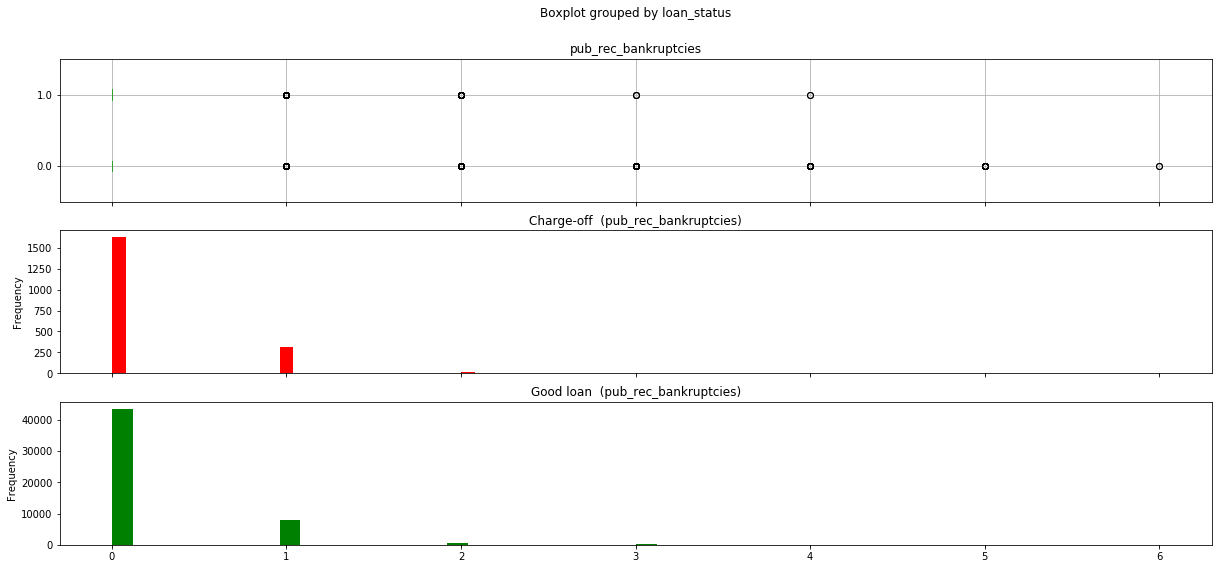

Missing values for tax_liens 0


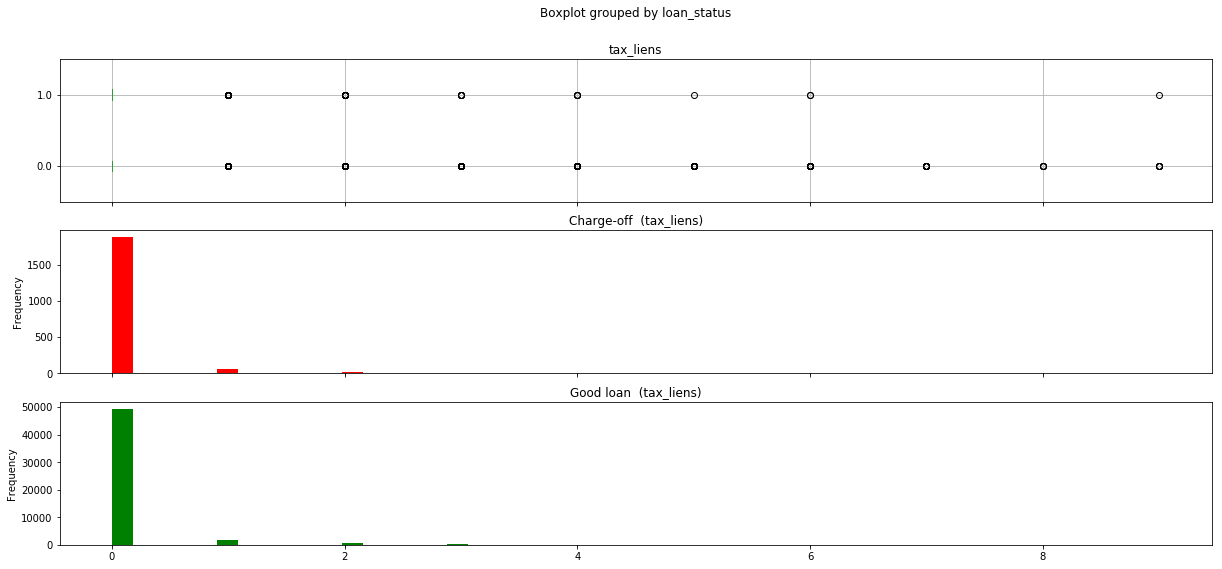

Missing values for tot_hi_cred_lim 0


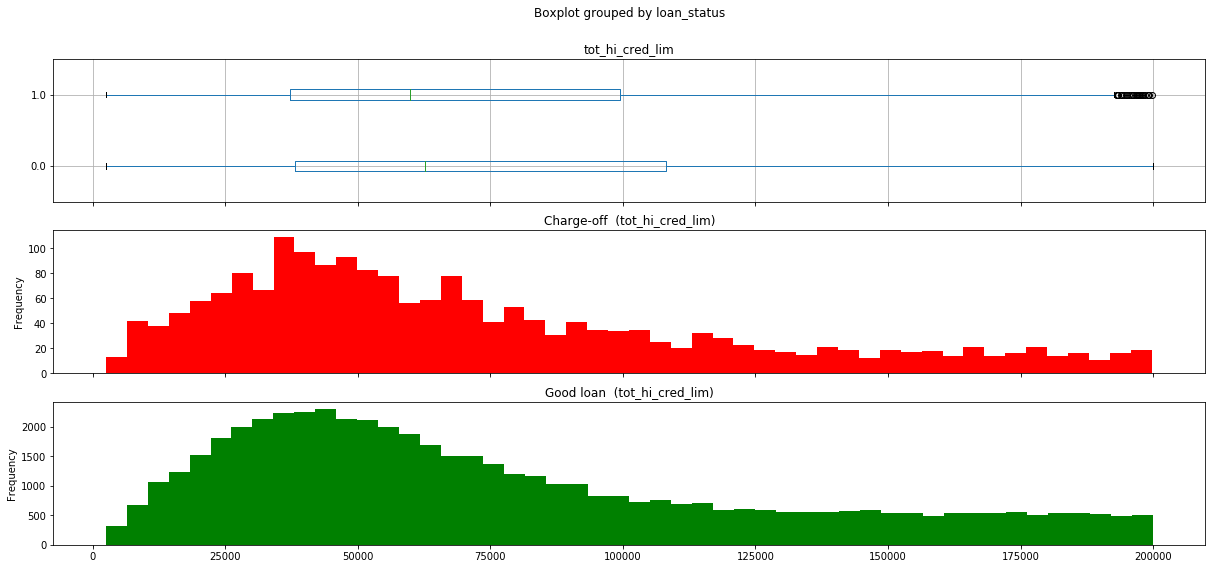

Missing values for total_bal_ex_mort 0


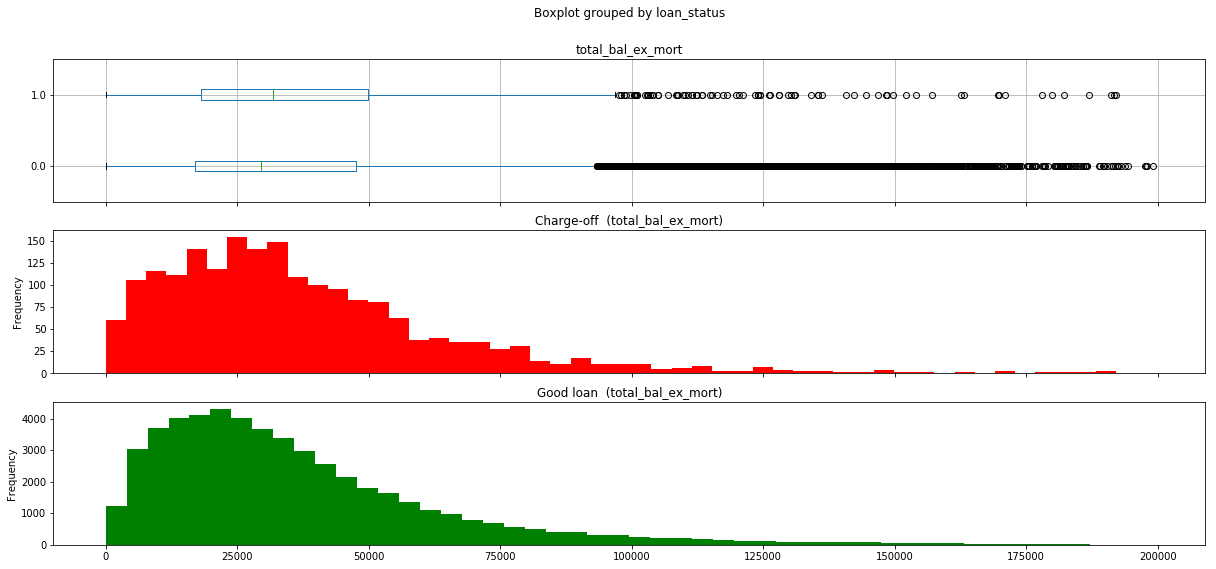

Missing values for total_bc_limit 0


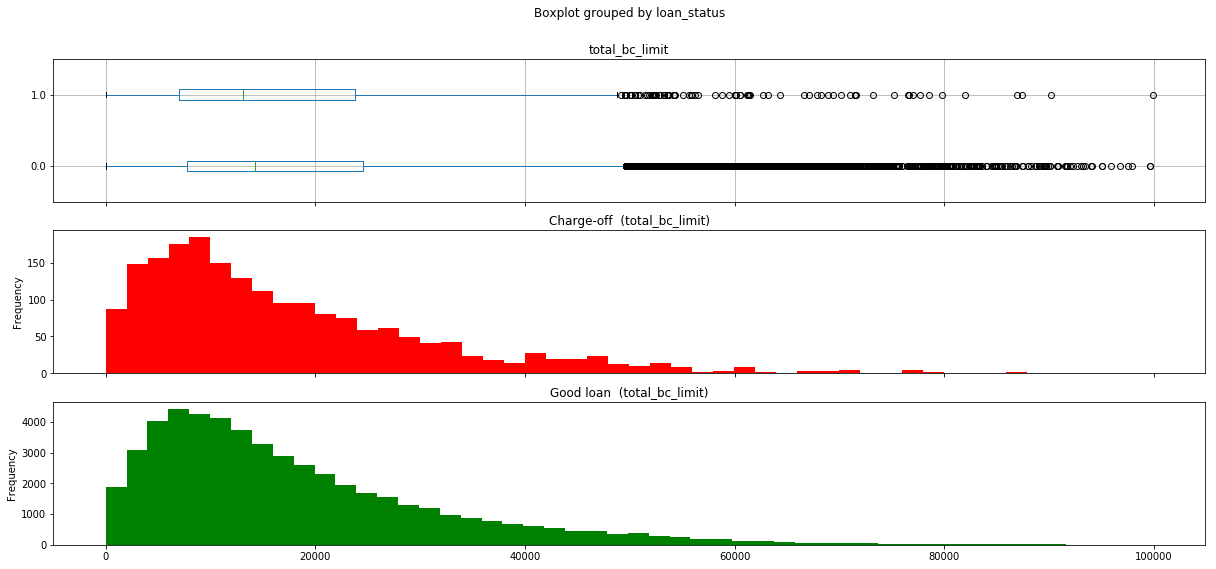

Missing values for total_il_high_credit_limit 0


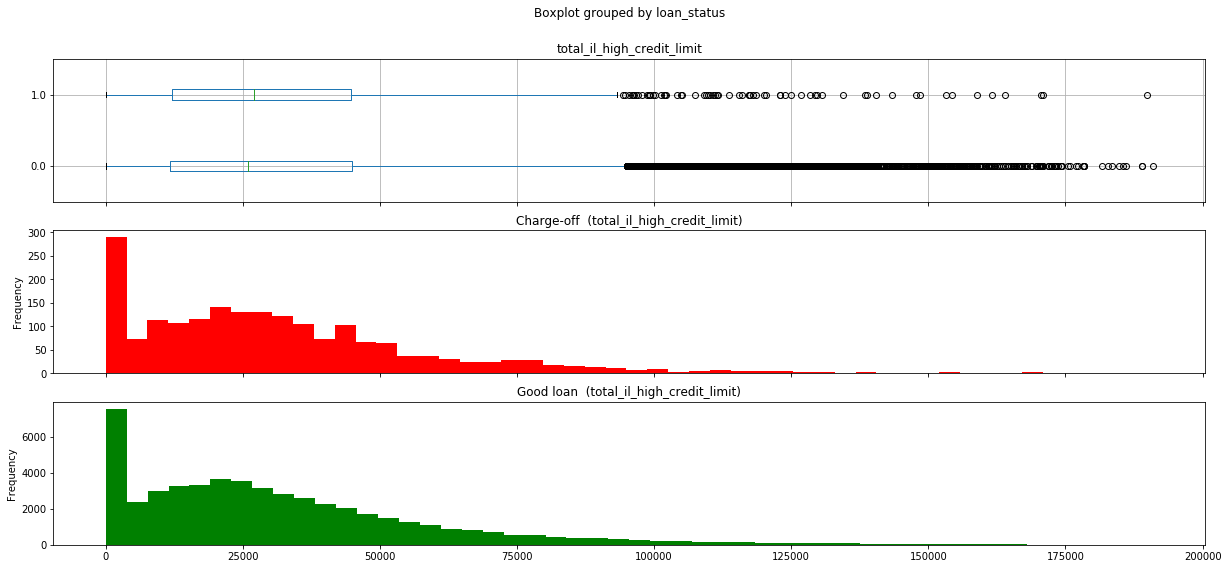

Missing values for cr_history 0


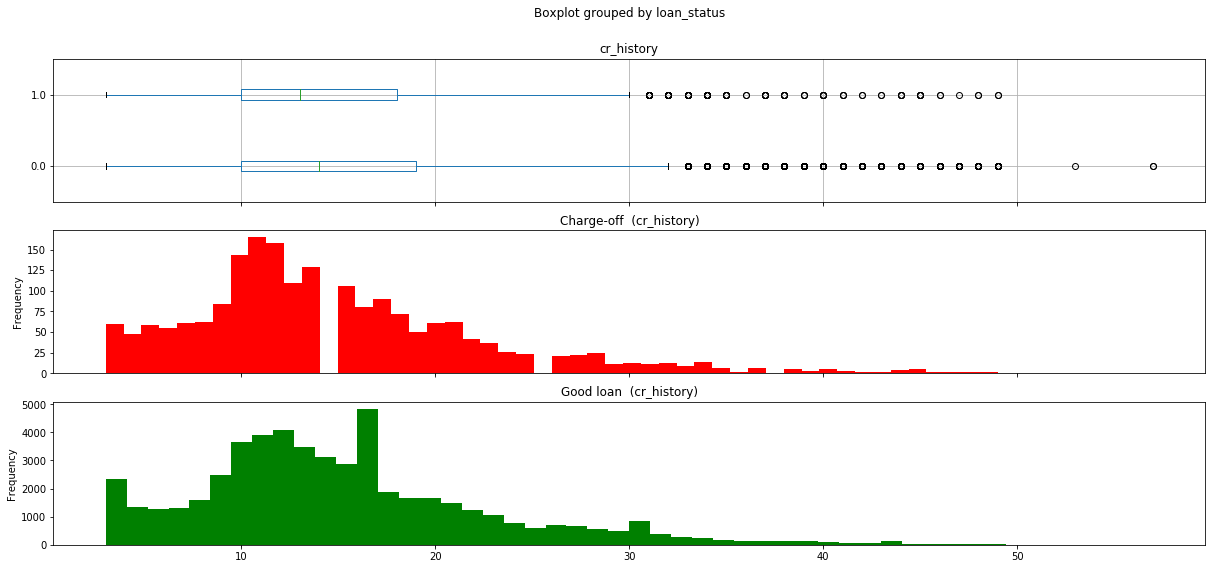

Missing values for fico_range_mean 0


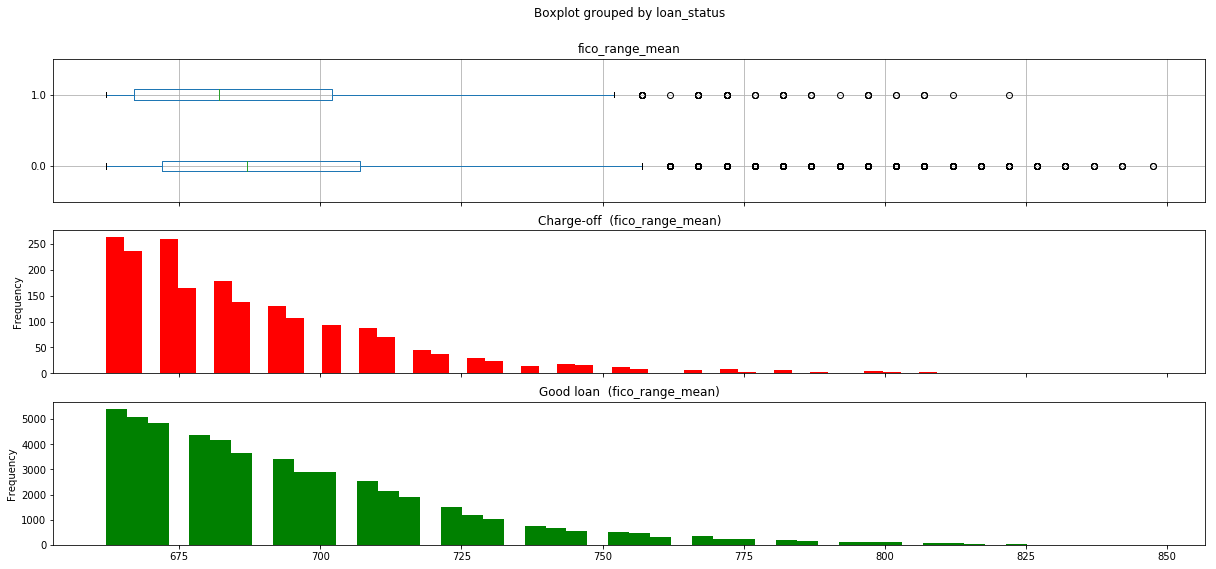

Missing values for verification_status_Not Verified 0


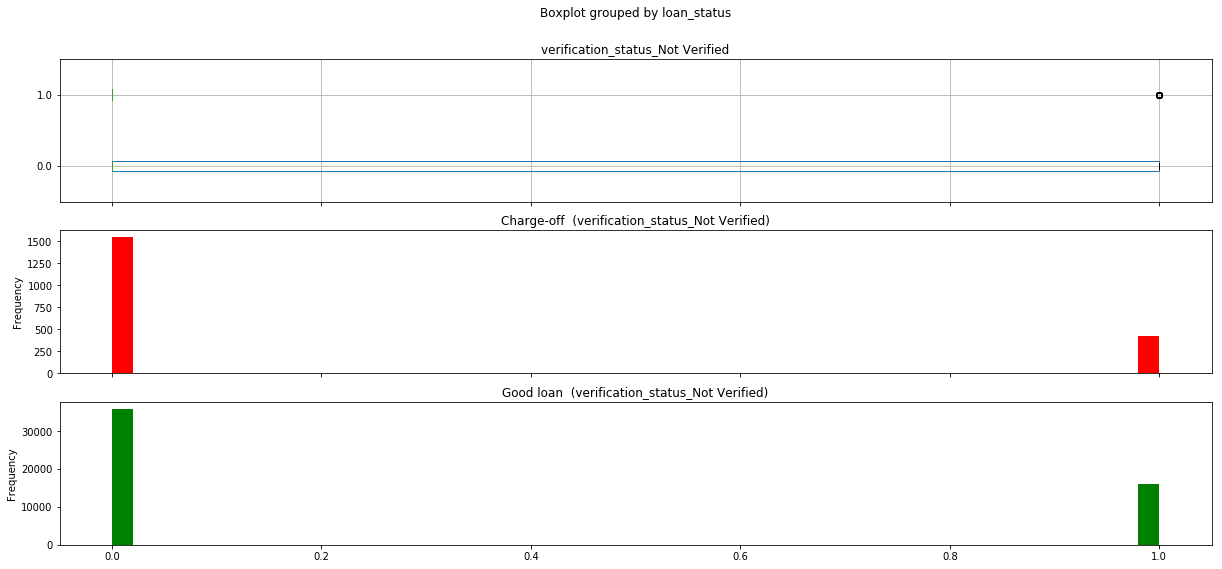

Missing values for verification_status_Source Verified 0


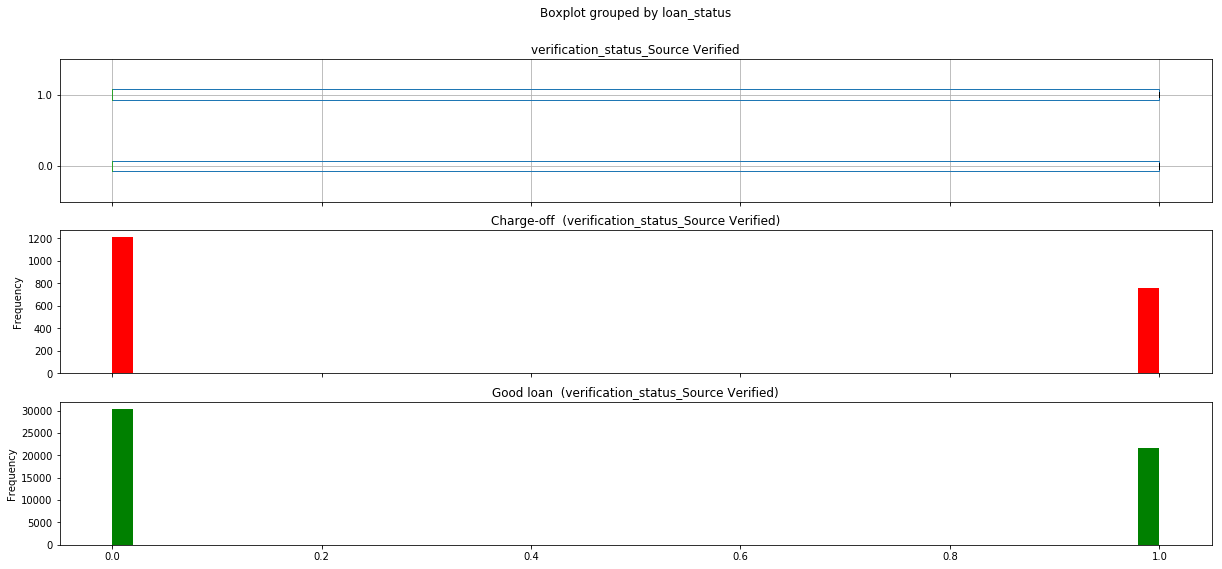

Missing values for verification_status_Verified 0


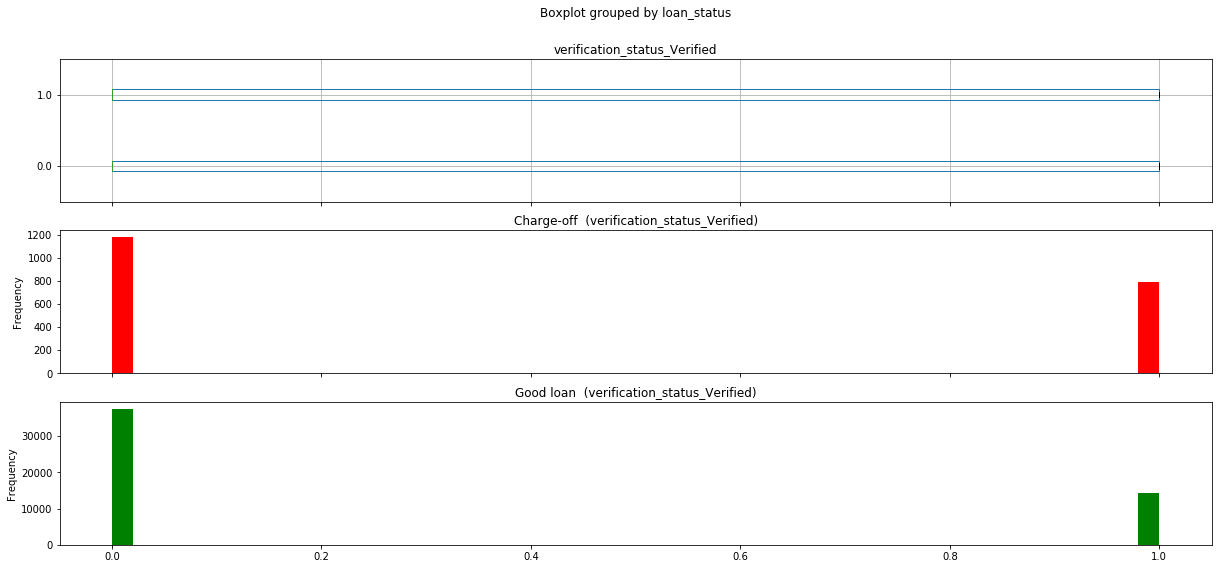

Missing values for home_ownership_ANY 0


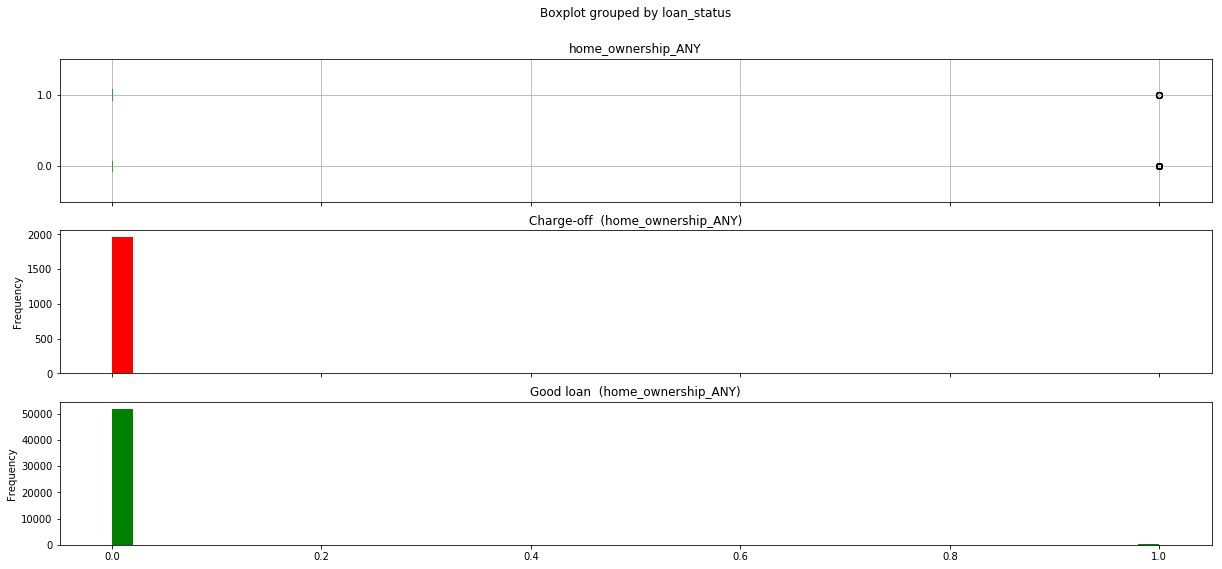

Missing values for home_ownership_MORTGAGE 0


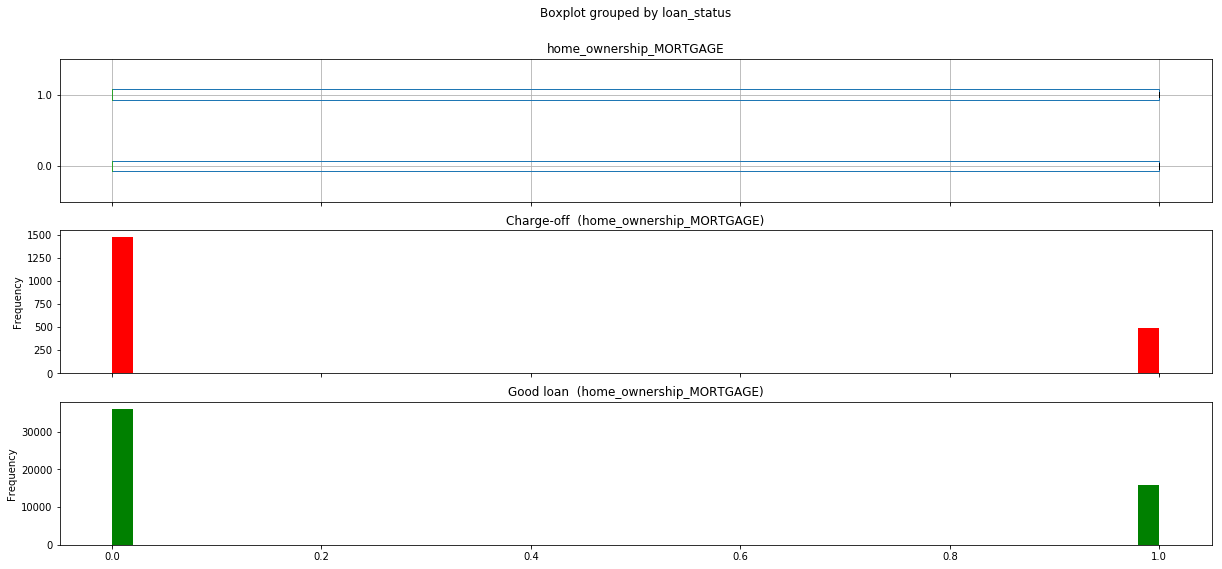

Missing values for home_ownership_OWN 0


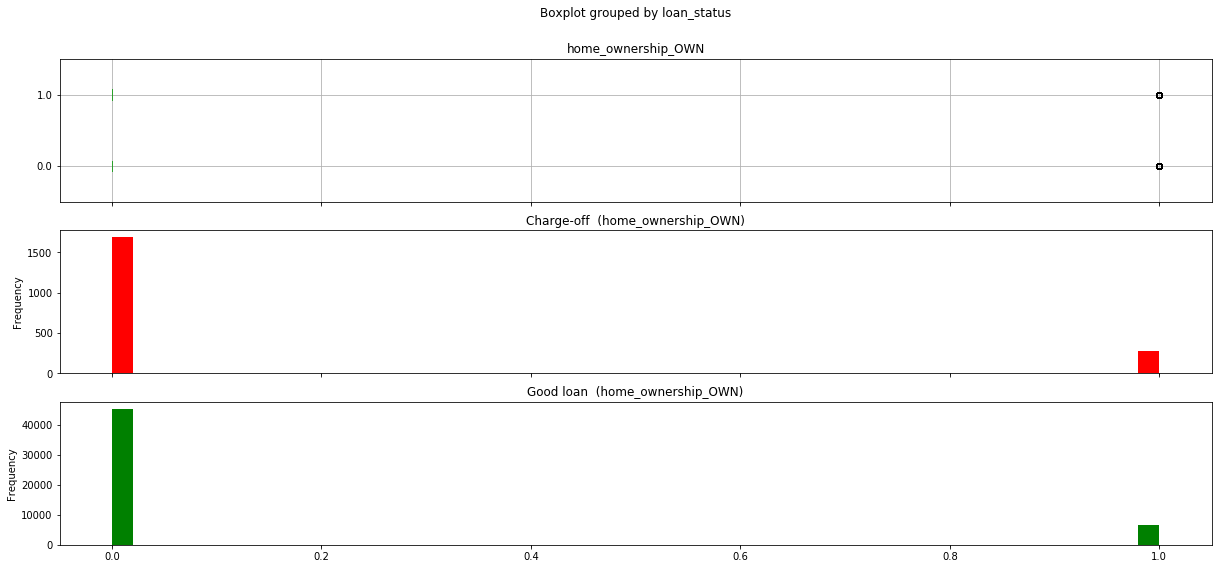

Missing values for home_ownership_RENT 0


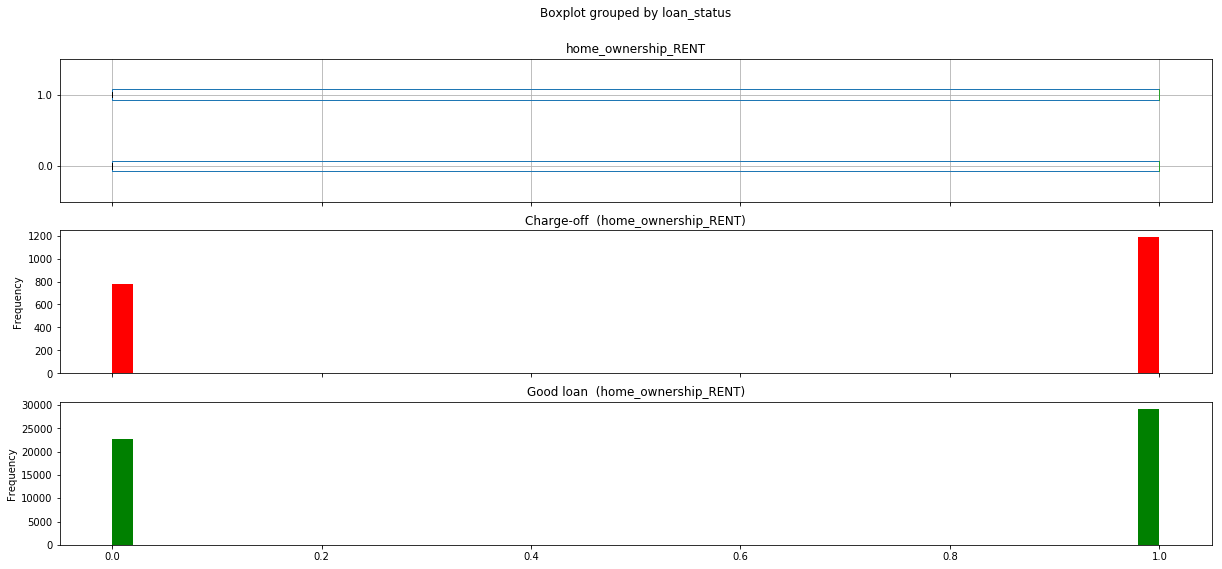

Missing values for verification_status_joint_Not Verified 0


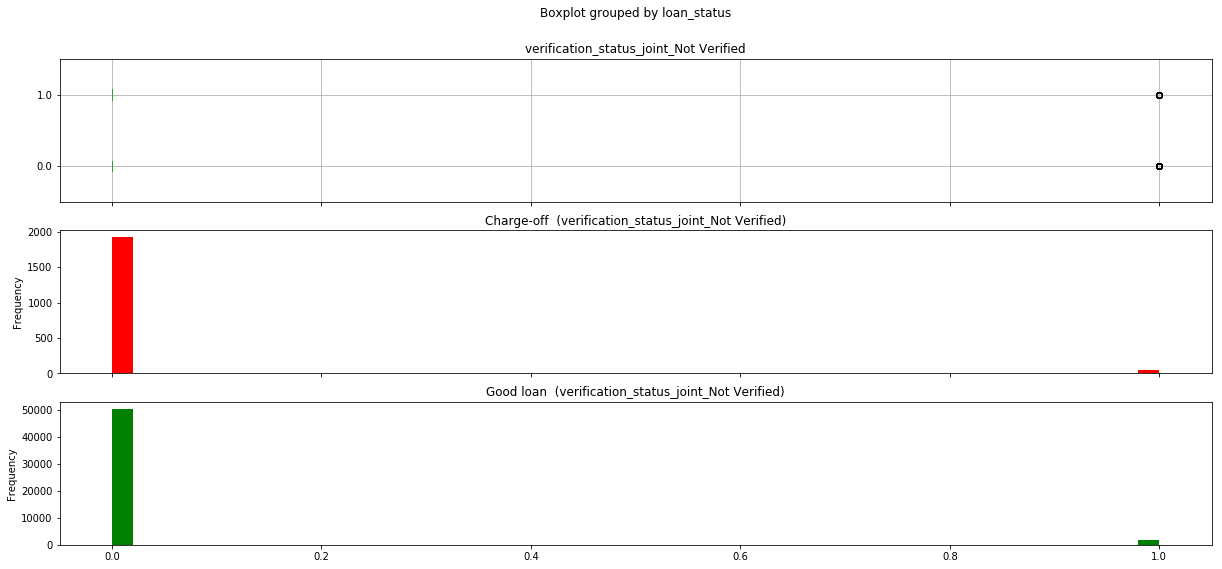

Missing values for verification_status_joint_Source Verified 0


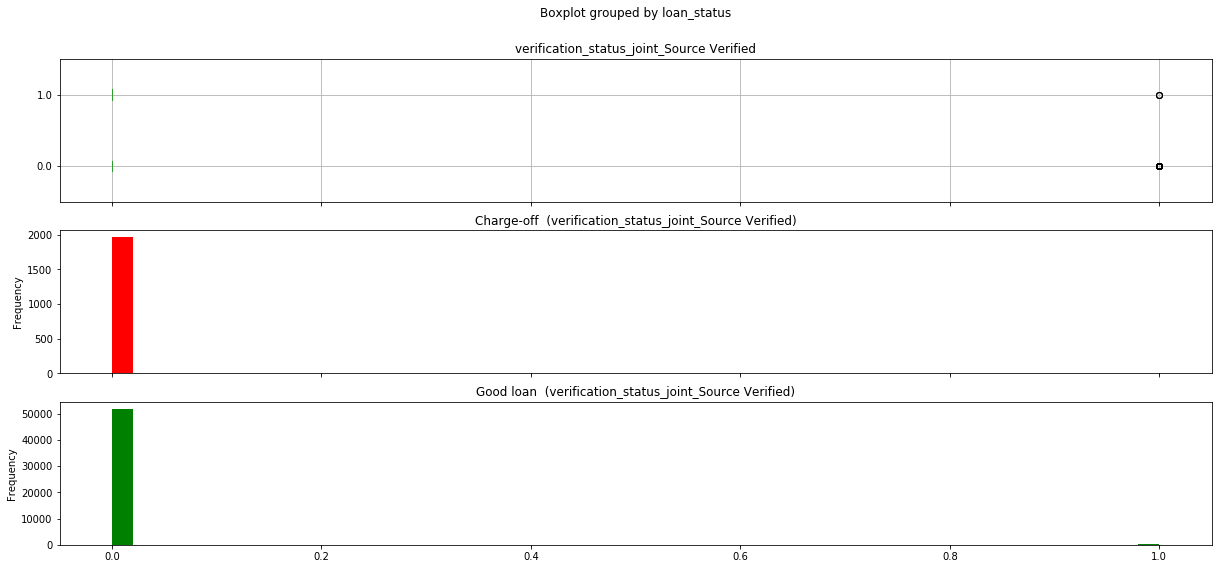

Missing values for verification_status_joint_Verified 0


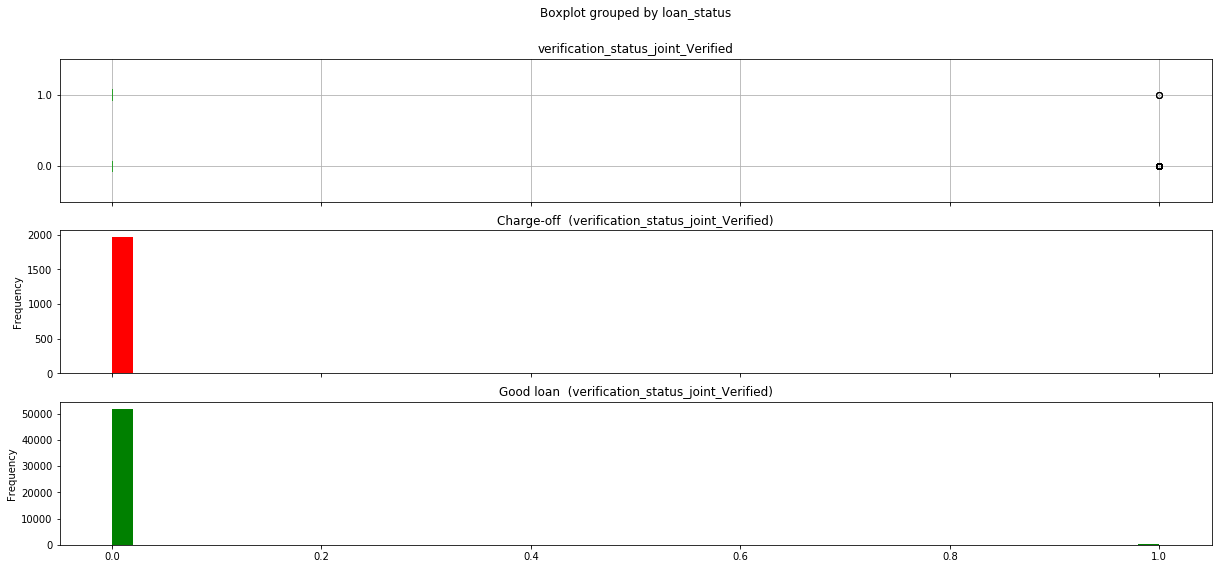

Missing values for purpose_car 0


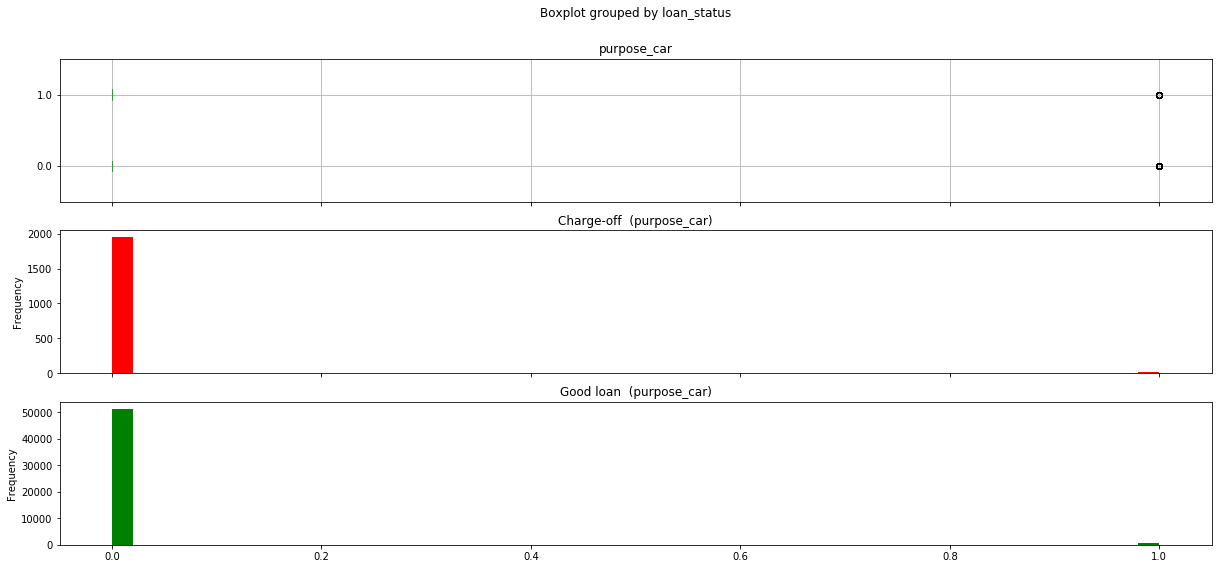

Missing values for purpose_credit_card 0


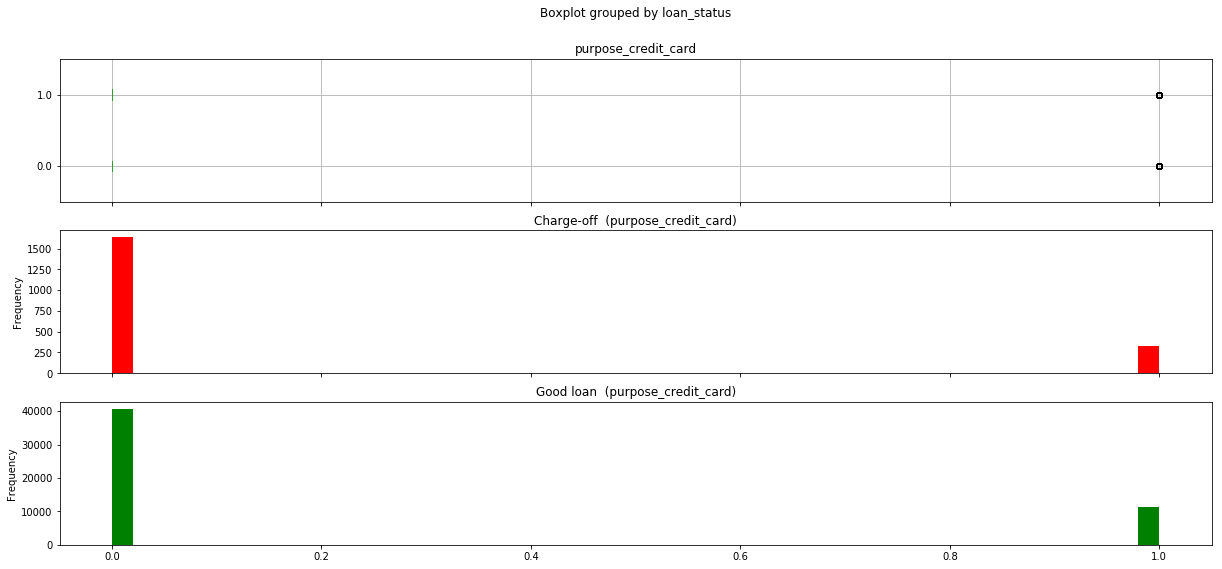

Missing values for purpose_debt_consolidation 0


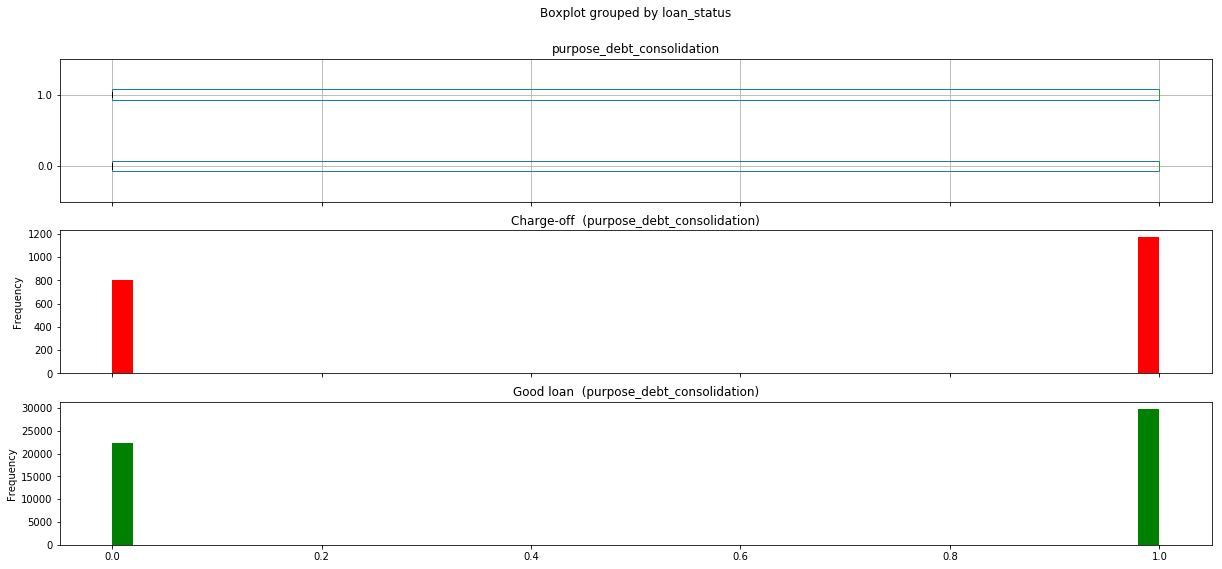

Missing values for purpose_home_improvement 0


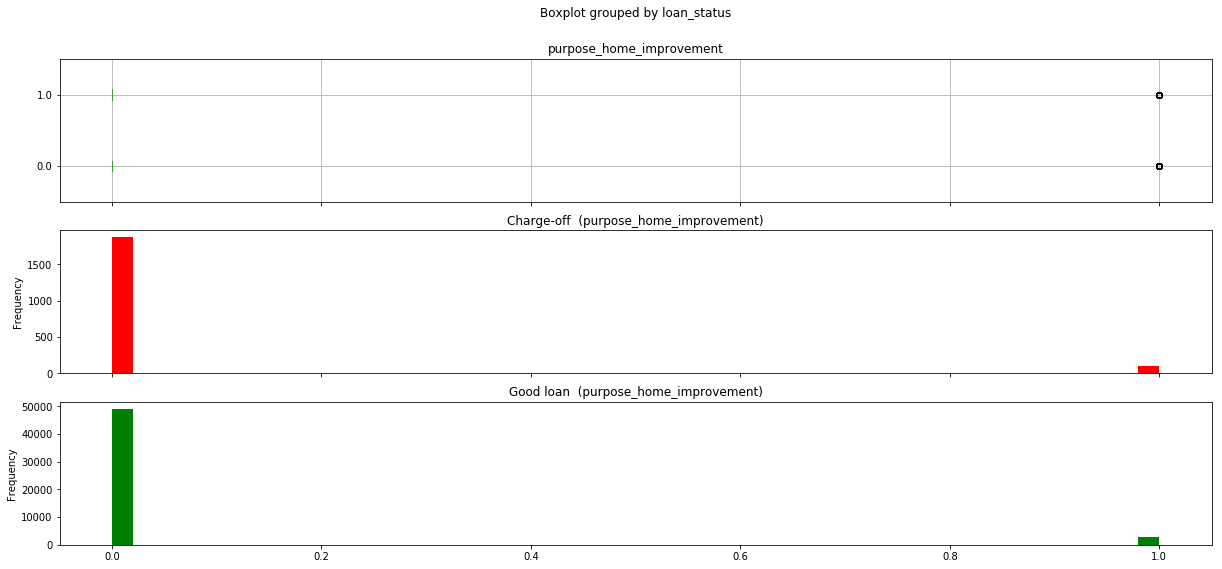

Missing values for purpose_house 0


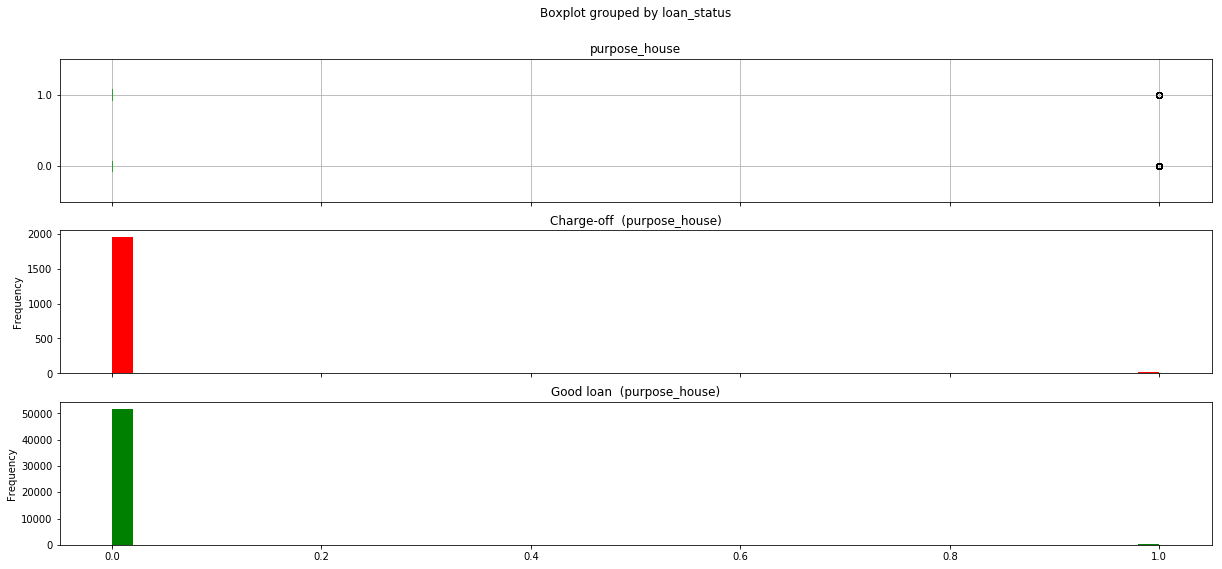

Missing values for purpose_major_purchase 0


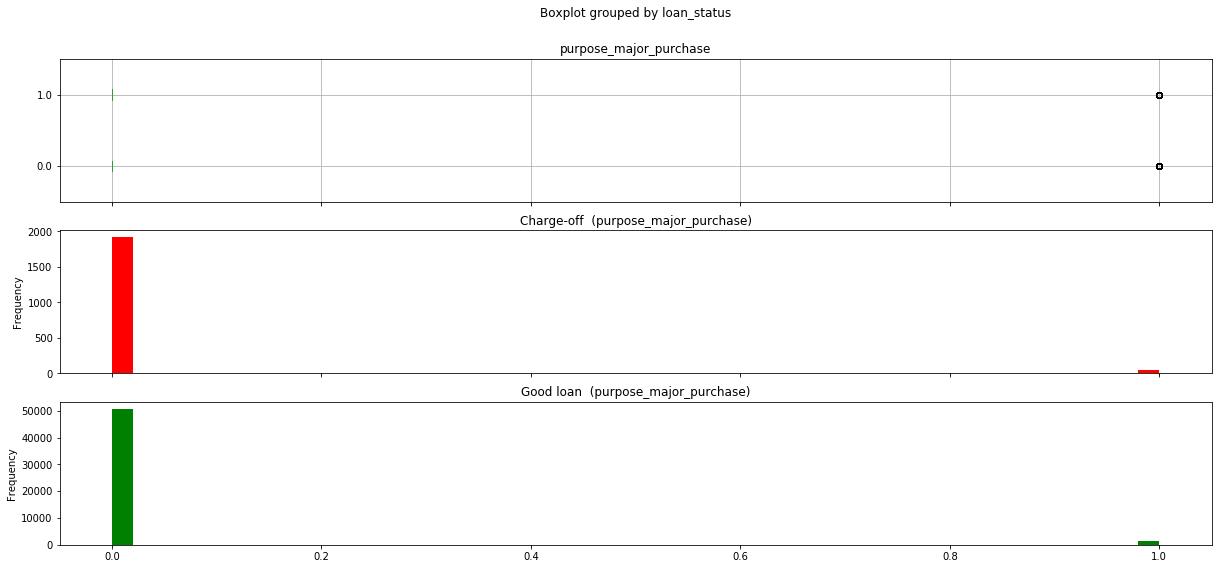

Missing values for purpose_medical 0


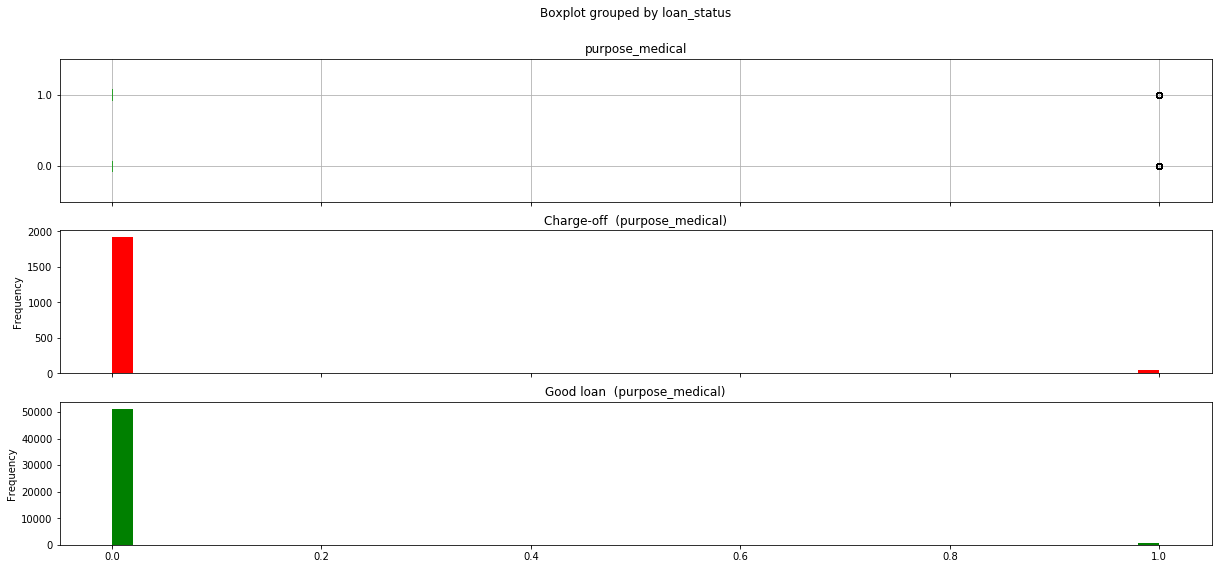

Missing values for purpose_moving 0


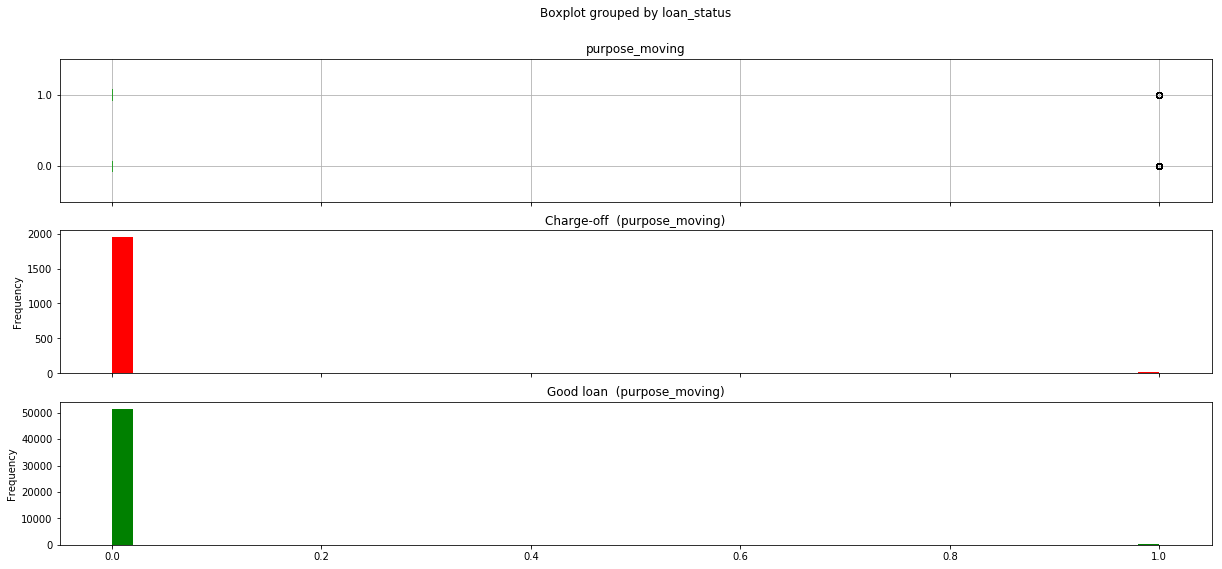

Missing values for purpose_other 0


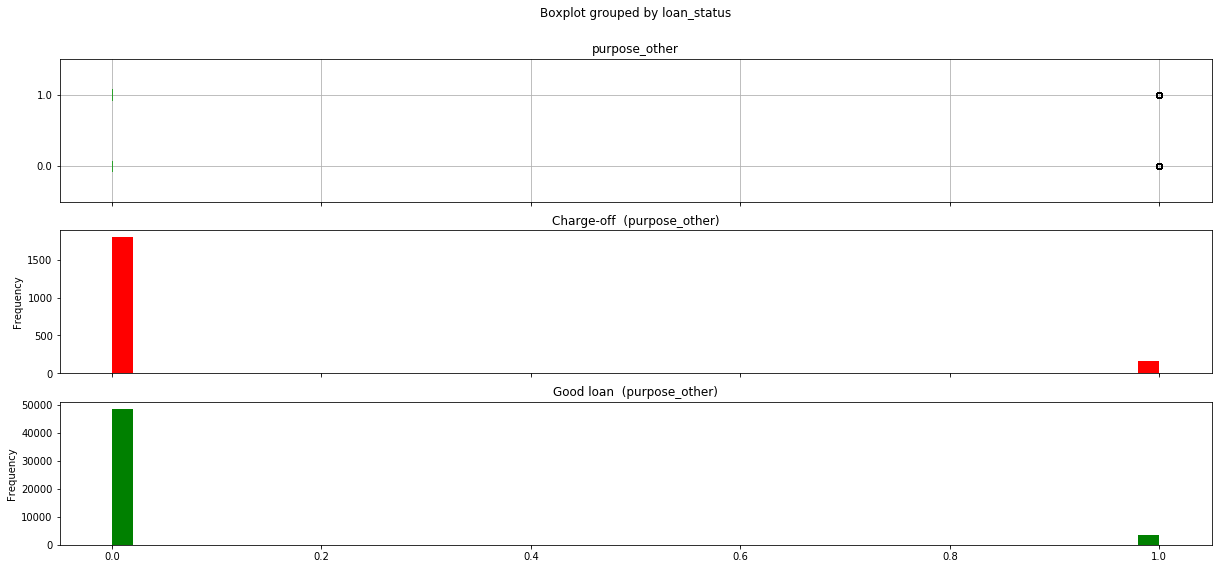

Missing values for purpose_renewable_energy 0


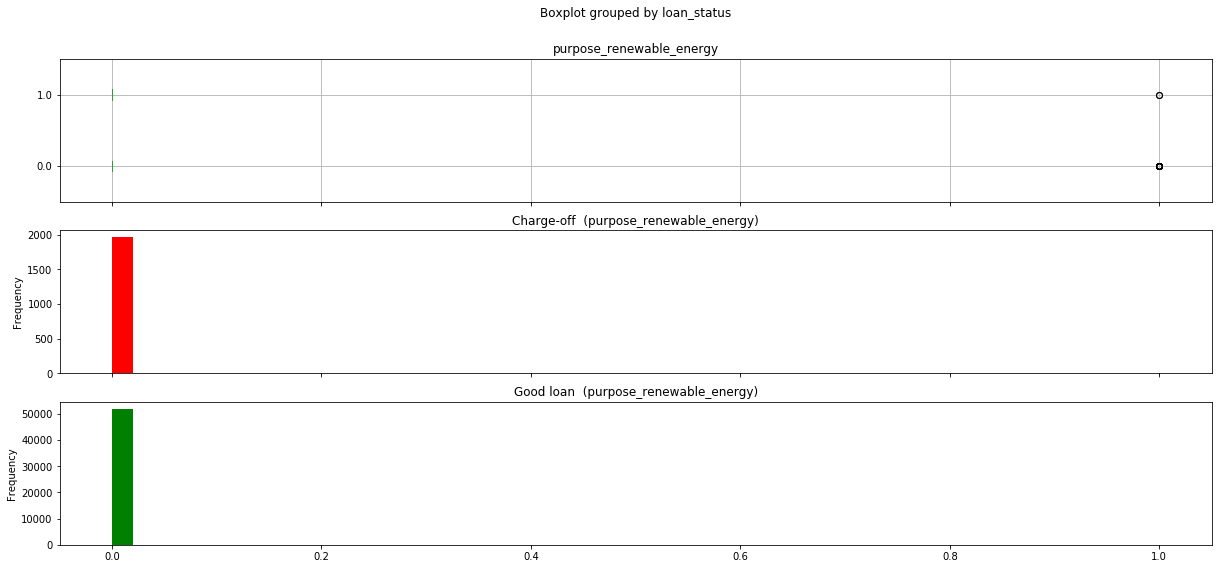

Missing values for purpose_small_business 0


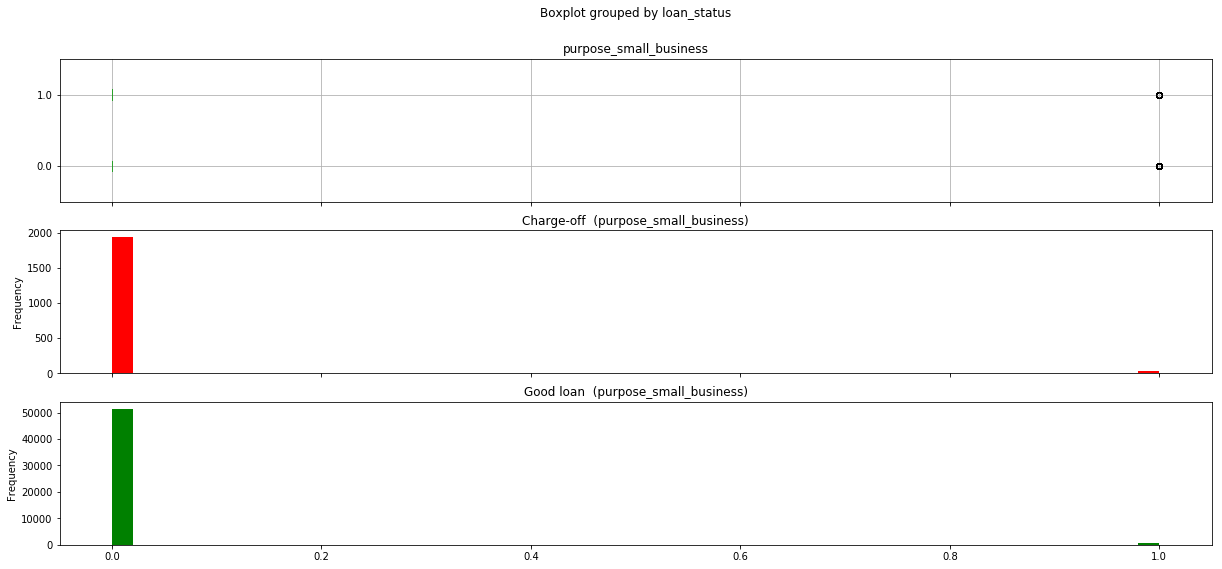

Missing values for purpose_vacation 0


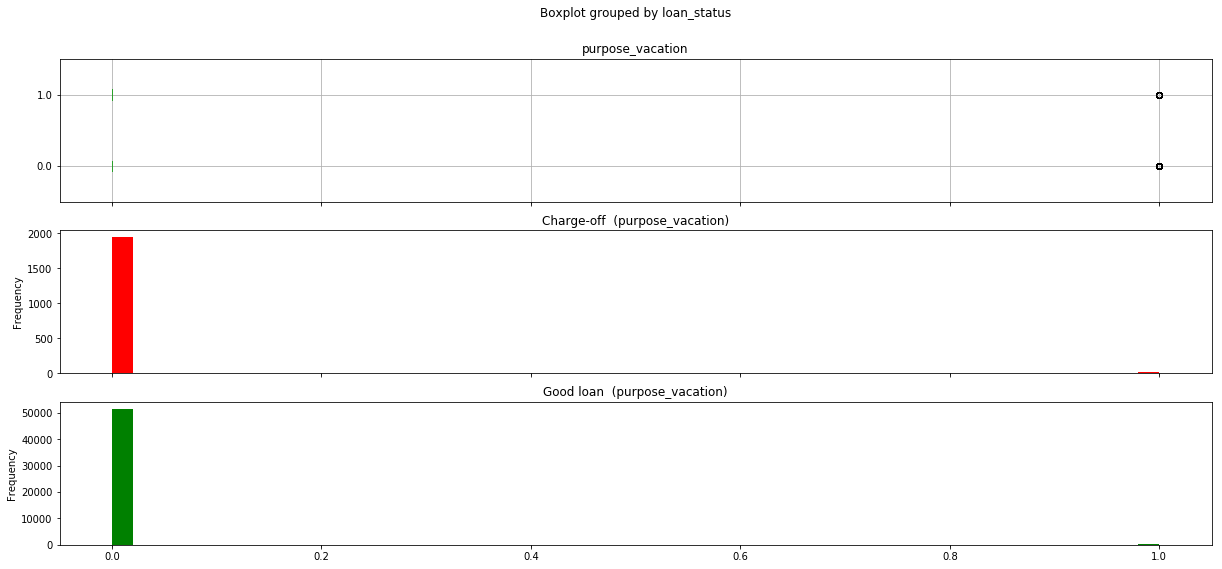

Missing values for emp_length_1 year 0


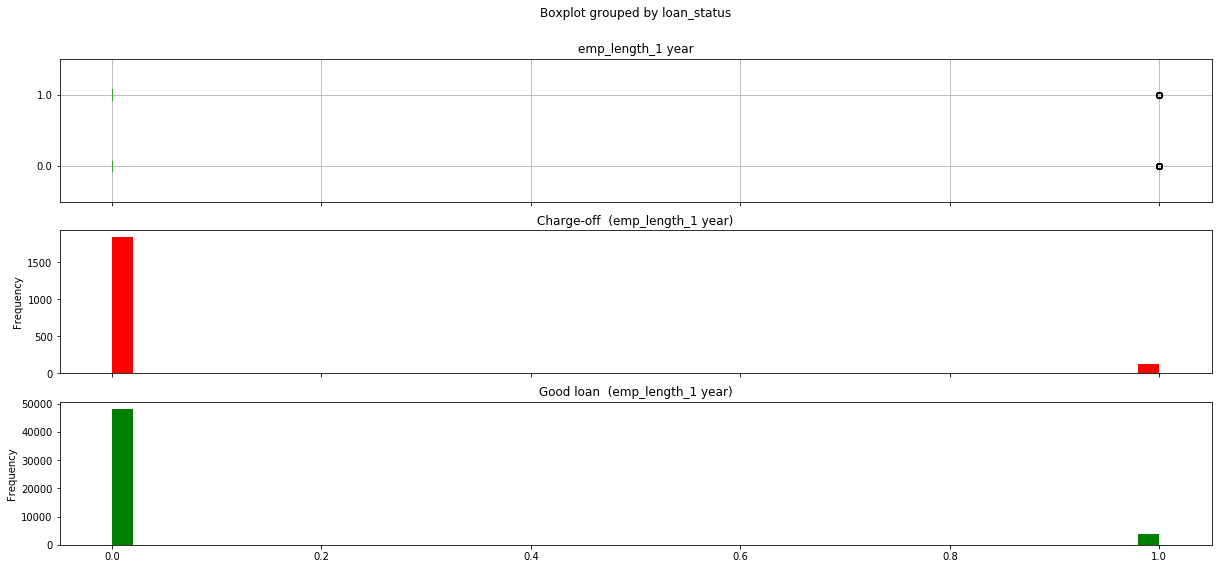

Missing values for emp_length_10+ years 0


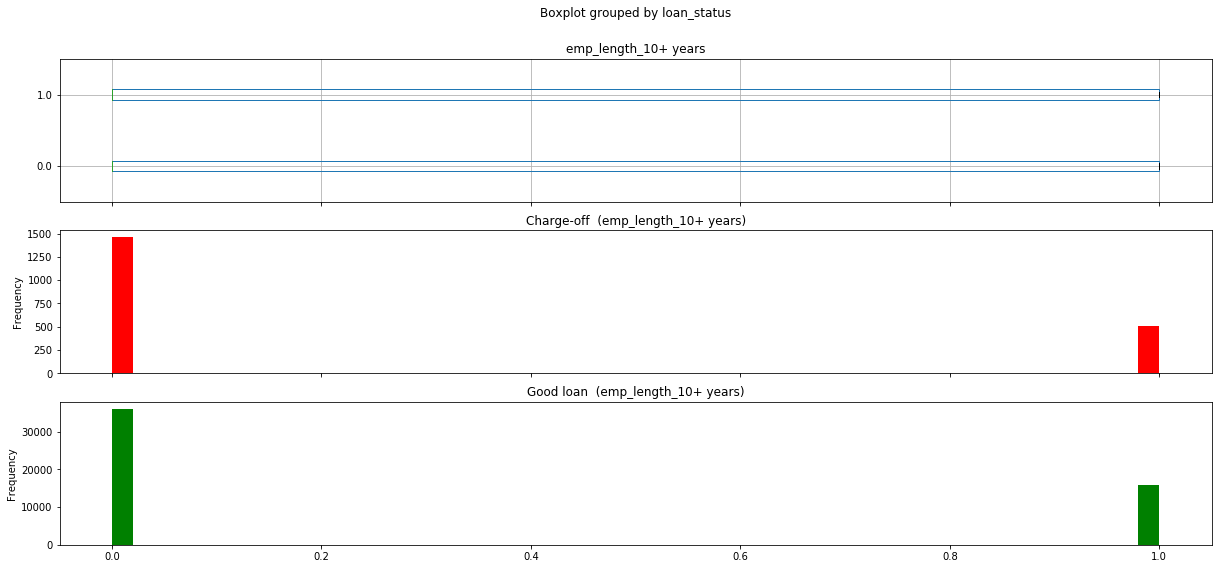

Missing values for emp_length_2 years 0


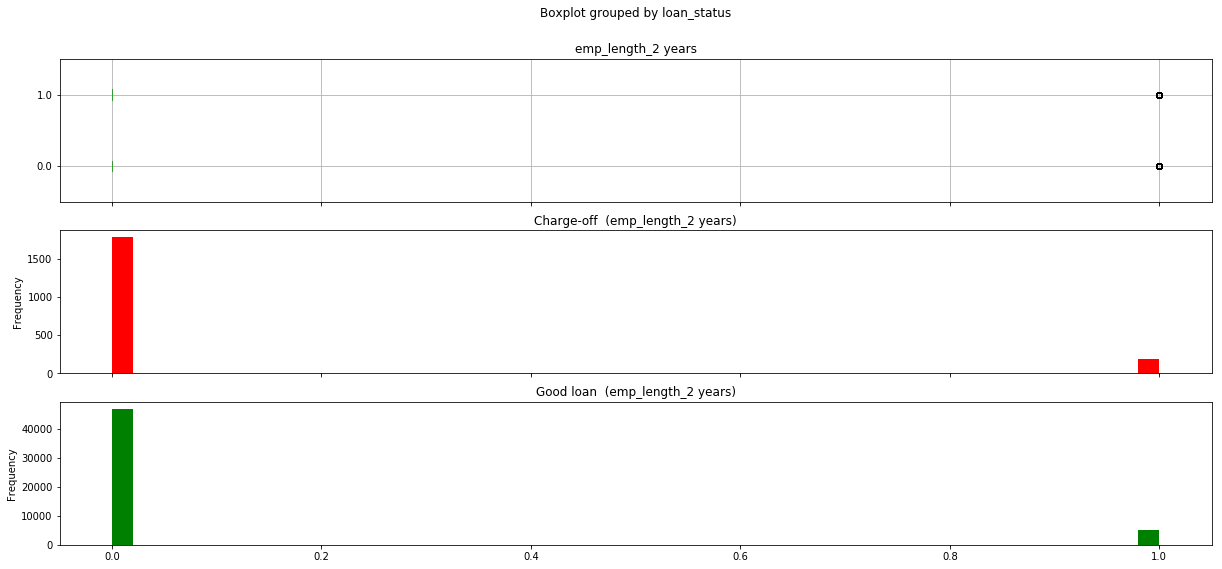

Missing values for emp_length_3 years 0


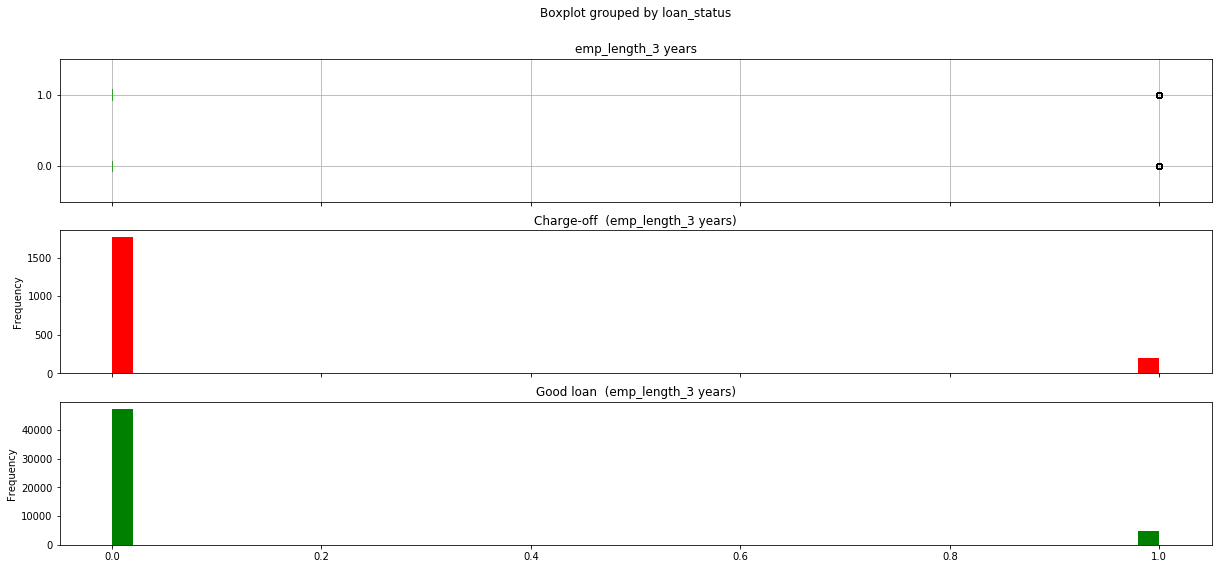

Missing values for emp_length_4 years 0


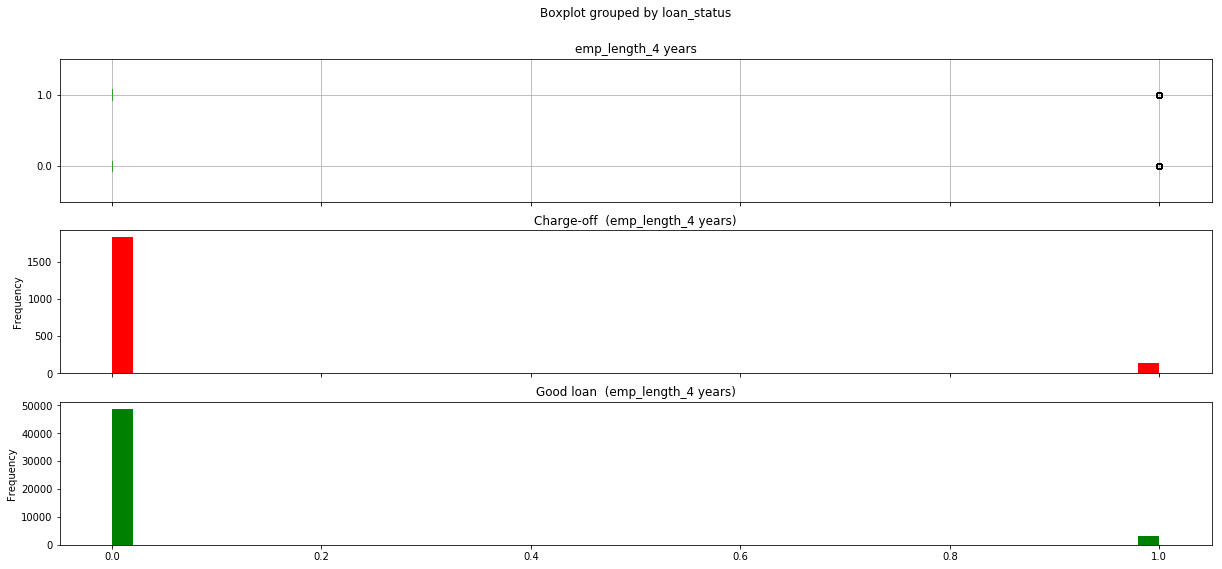

Missing values for emp_length_5 years 0


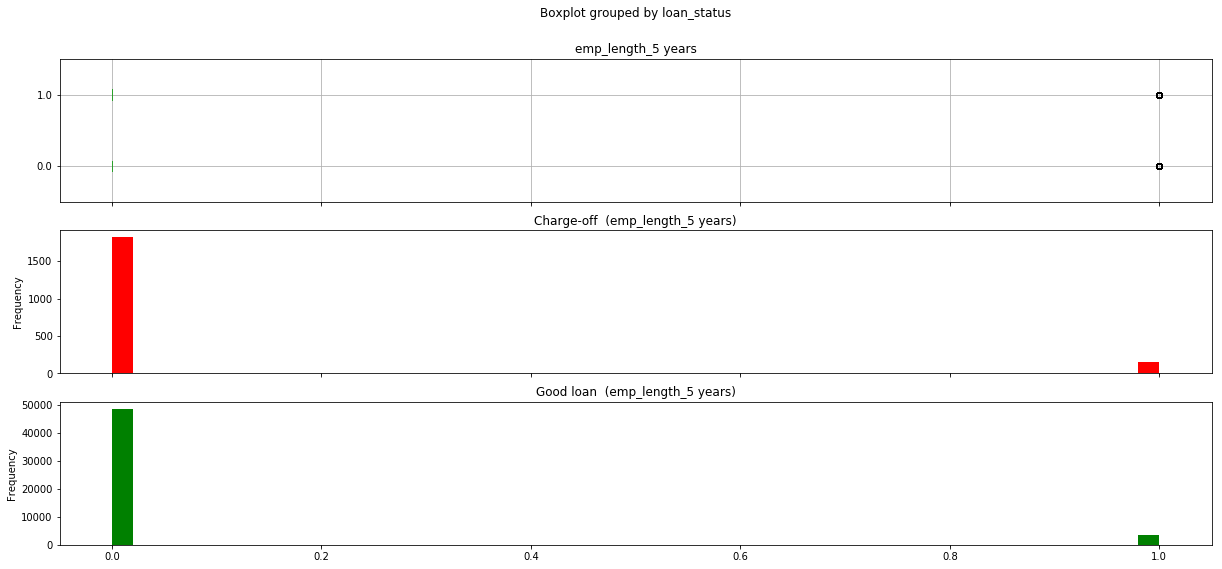

Missing values for emp_length_6 years 0


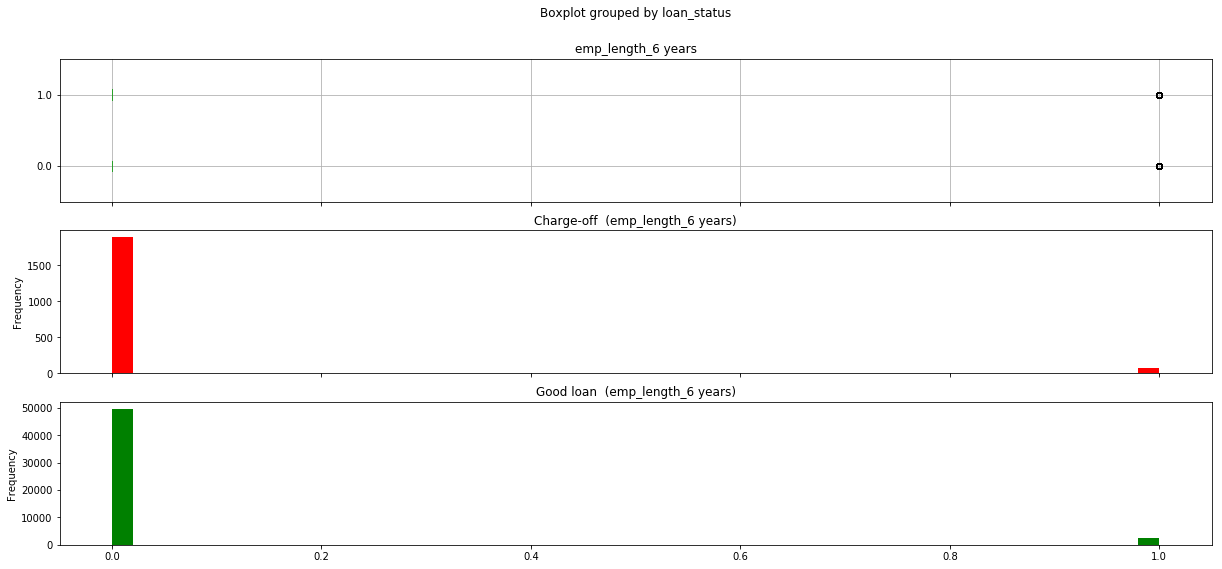

Missing values for emp_length_7 years 0


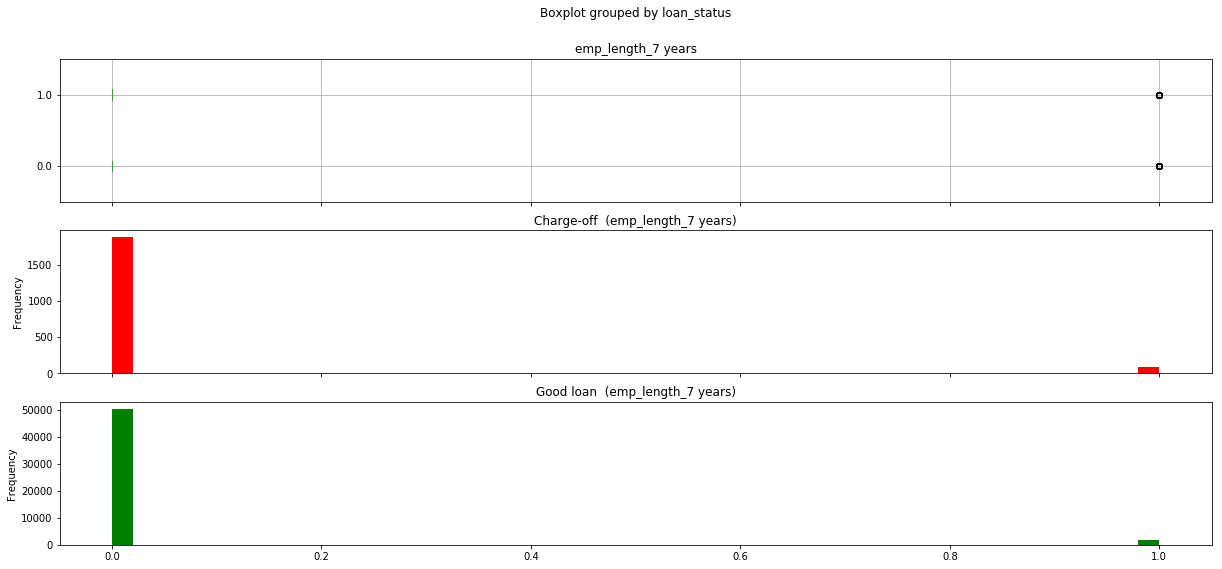

Missing values for emp_length_8 years 0


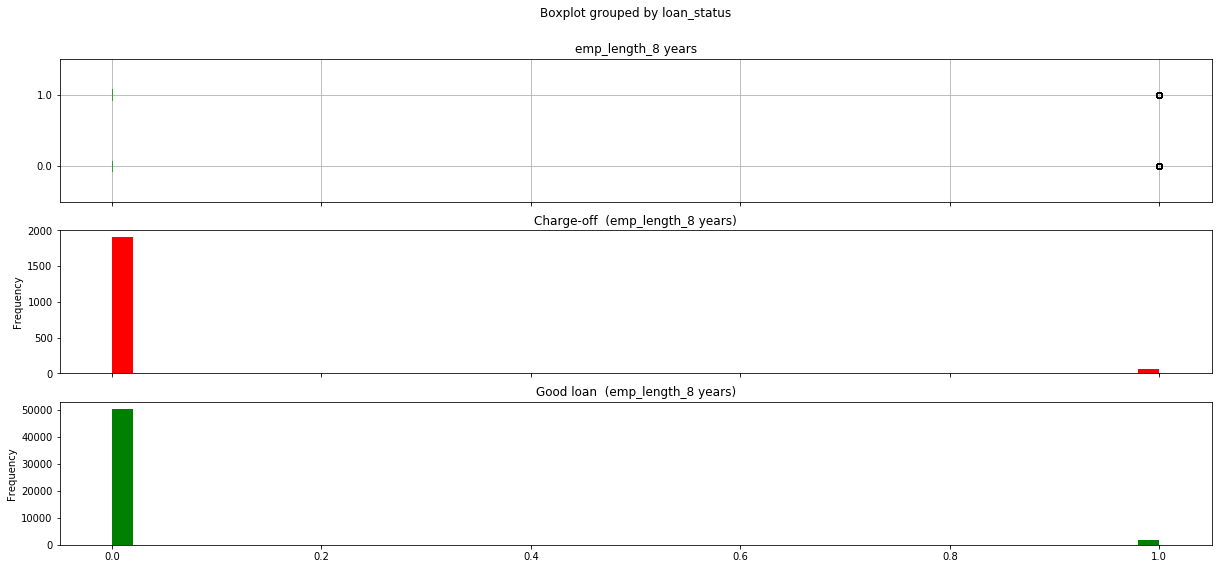

Missing values for emp_length_9 years 0


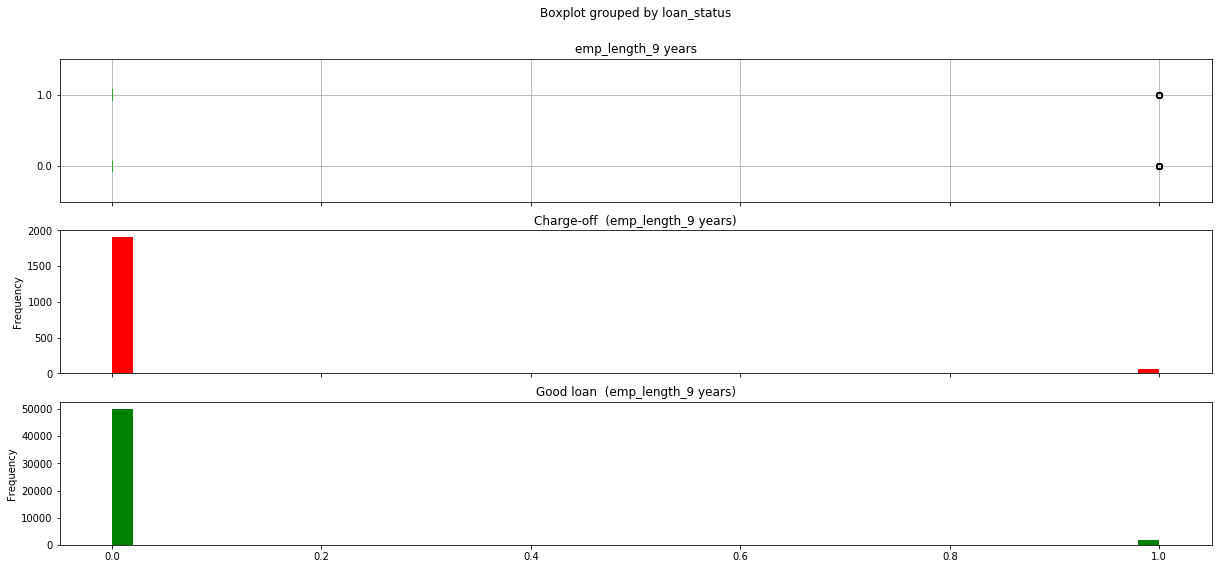

Missing values for emp_length_< 1 year 0


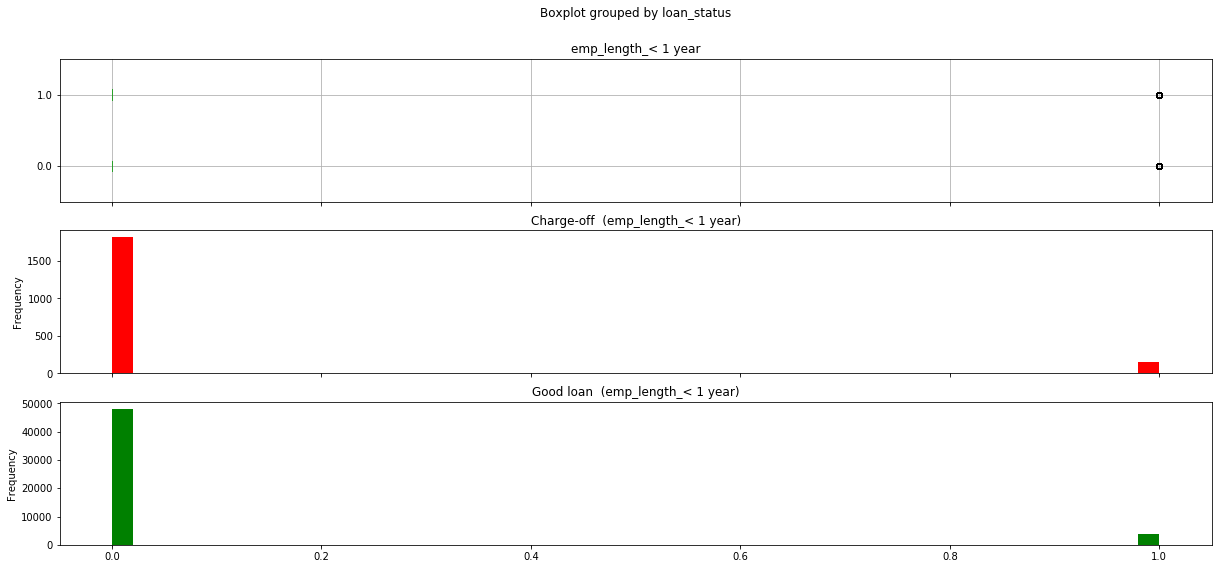

In [62]:
for col in df.columns.values:
    plot_box_hist2(df, col, bins=50)

## Displaying statistics
List featues and inspect for missing values, min and max and unique counts

In [6]:
# display statistics about variables
col_stats(df).sort_values(by='Null Percent', ascending=False)

,dtypes,Null Count,Null Percent,Min,Max,Med,Sqew,unique_counts
columns,,,,,,,,
loan_amnt,float32,0,0.0,1000.000000,4.000000e+04,12000.000000,0.813511,1465
open_acc,float32,0,0.0,1.000000,7.200000e+01,11.000000,1.336244,60
installment,float32,0,0.0,30.120001,1.715420e+03,372.709991,1.024230,12932
grade,float32,0,0.0,1.000000,7.000000e+00,5.000000,-0.680707,7
emp_title,float32,0,0.0,0.000000,1.000000e+00,0.000000,3.334359,2
annual_inc,float32,0,0.0,0.000000,9.850000e+05,69996.000000,3.468548,8641
loan_status,float32,0,0.0,0.000000,1.000000e+00,0.000000,5.183710,2
zip_code,float32,0,0.0,0.000000,9.900000e+01,48.000000,0.037271,97
delinq_2yrs,float32,0,0.0,0.000000,2.100000e+01,0.000000,5.187782,21


## Remove outliers from data set

In [20]:
df = remove_outliers(df)
print(len(df))

54030


## Compare GINI and ENTROPY criteris
Here we compare how well the various splitting criteria work in decision trees. Since 'entropy' has higher score I will use it instead of 'gini'.

(54030, 109)
Test score for param= 1 recall= 0.726 std= 0.042


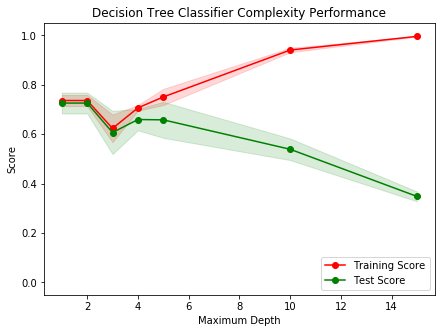

Test score for param= 1 recall= 0.772 std= 0.051


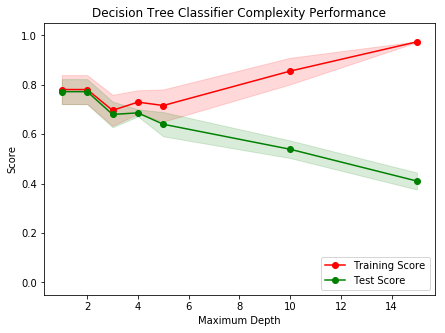

In [78]:
# split data and train
y = df.loan_status
X = df.drop(columns='loan_status')
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
ModelComplexity(X_train, y_train, crit='gini')
ModelComplexity(X_train, y_train, crit='entropy')

## Evaluate Random Forest 
I have run Random Forest classifier with varying max_depth parameters. From the learning curve we can see that RF isn't overfitting like DecisionTree, and that max_depth parameter = 1 has the best score.

Test score for param= 50 max_depth= 1 recall= 0.793 std= 0.025


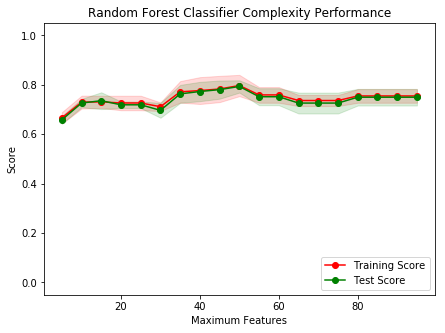

Test score for param= 40 max_depth= 2 recall= 0.76 std= 0.039


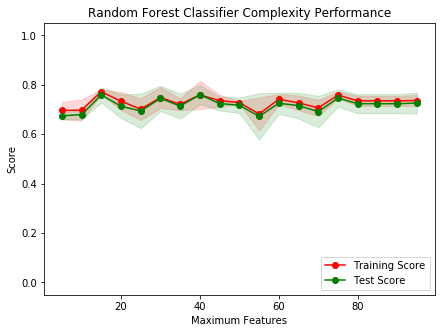

Test score for param= 30 max_depth= 3 recall= 0.732 std= 0.036


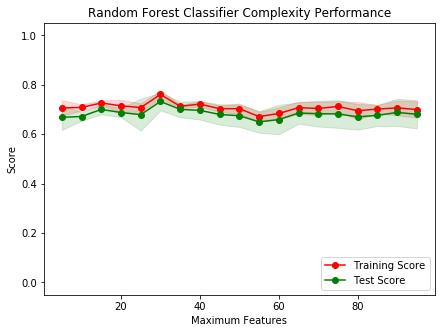

CPU times: user 1min 49s, sys: 1.42 s, total: 1min 51s
Wall time: 1min 53s


In [9]:
%%time
for md in [1,2,3]:
    ModelComplexityRF(X_train, y_train, p_range=range(5, 100, 5), max_depth=md)

### Report performance
Here we evaluate performance of RF on the held-out test set, using the best parameters.

In [128]:
clf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=7, 
                             max_depth=1, max_features=50)

clf.fit(X_train, y_train)

print(clf.feature_importances_)
y_predicted = clf.predict(X_test)

print("recall:", round(recall_score(y_test, y_predicted), 4))

[0.  0.  0.3 0.1 0.2 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
recall: 0.7919


## Grid Search
We perform a more systematic search to find a larger range of values. This job takes a longer time and is fine-tuning the previous finding. I try to find the best number of estimators to use.

In [22]:
%%time
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


pipe = Pipeline([
    ('classify', RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=7, 
                                        max_depth=3))
])

MAX_FEATURES_OPTIONS = range(5, 100, 5)
MAX_DEPTH_OPTIONS= [1, 2, 3, 5, 10]
N_ESTIMATORS_OPTIONS = [10, 50, 75]

param_grid = [
    {
        'classify__max_depth': MAX_DEPTH_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS_OPTIONS,
        'classify__max_features': MAX_FEATURES_OPTIONS,
    },
]

grid = GridSearchCV(pipe, cv=3, n_jobs=4, param_grid=param_grid, scoring='recall')
grid.fit(X_train, y_train)

CPU times: user 31.9 s, sys: 2.17 s, total: 34 s
Wall time: 34min 26s


In [5]:
## Grid Search Output
This is the results of Grid Search. The best number of estimators is 10


SyntaxError: invalid syntax (<ipython-input-5-664a73253dc7>, line 2)

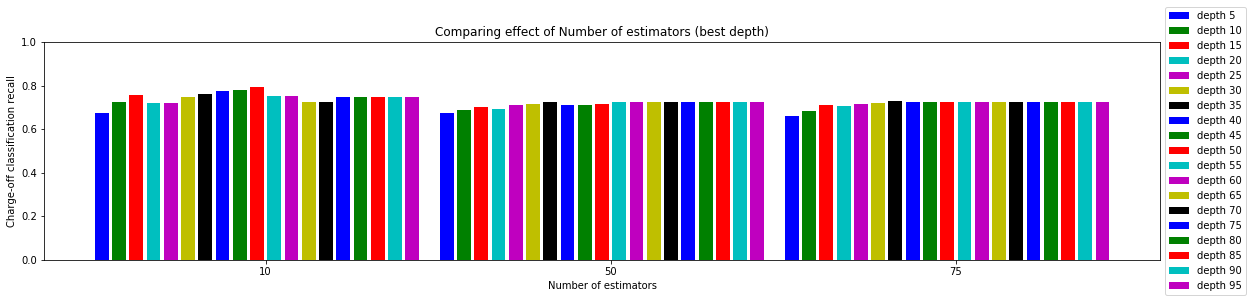

In [70]:
depth_labels = ['depth ' + str(s) for s in MAX_FEATURES_OPTIONS]
reducer_labels = MAX_DEPTH_OPTIONS

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(MAX_DEPTH_OPTIONS), -1, len(N_ESTIMATORS_OPTIONS))
# select score for best K
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_ESTIMATORS_OPTIONS)) *
               (len(depth_labels) + 1) + .5)

plt.figure(figsize=(20,4));
COLORS = 'bgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk'
for i, (label, depth_scores) in enumerate(zip(depth_labels, mean_scores)):
    plt.bar(bar_offsets + i, depth_scores, label=label, color=COLORS[i])

plt.title("Comparing effect of Number of estimators (best depth)")
plt.xlabel('Number of estimators')
plt.xticks(bar_offsets + len(depth_labels) / 2, N_ESTIMATORS_OPTIONS)
plt.ylabel('Charge-off classification recall')
plt.ylim((0, 1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [34]:
print("best score:", grid.best_score_, "; best params:", grid.best_params_)

best score: 0.7932340265559986 ; best params: {'classify__max_depth': 1, 'classify__max_features': 50, 'classify__n_estimators': 10}


### Evaluating Results

#### Best Classifier - 2017 Q1
Here I evaluate various metrics; accuracy, recall, F2 scores and confusion matrix for the best classifier from the Grid Search for the 2017 Q1 data set.

[0.  0.  0.6 0.  0.2 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0. ]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=1, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
recall: 0.7371
Accuracy: 0.5669
(0.0615637184485943, 0.7371007371007371, 0.23073373327180435, None)
Normalized confusion matrix
[[0.56 0.44]
 

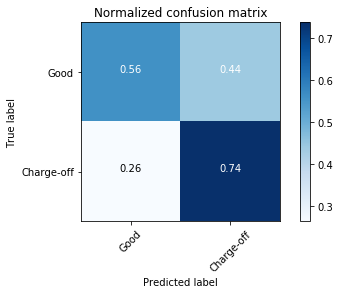

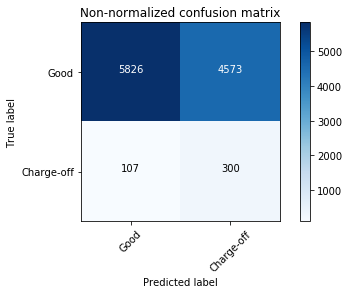

In [184]:
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.metrics import accuracy_score
clf = grid.best_estimator_.steps[0][1]

clf.fit(X_train, y_train)
print(clf.feature_importances_)
print(clf)

y_predicted = clf.predict(X_test)

print("recall:", round(recall_score(y_test, y_predicted), 4))
print("Accuracy:", round(accuracy_score(y_test, y_predicted), 4))

print(precision_recall_fscore_support(y_test, y_predicted, beta=2, average='binary'))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good', 'Charge-off'], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('images/confusion_matrix_norm.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good', 'Charge-off'], normalize=False,
                      title='Non-normalized confusion matrix')
plt.savefig('images/confusion_matrix_non_norm.png')

- Best result: DT, GINI, cv=3, class_weight='balanced'
- Test score for max_depth: 4 recall: 0.693 std: 0.011
- Test score for max_depth: 3 recall: 0.707 std: 0.023, Poly Feat, 100 best
- Outliers removed: 

- Test score R.F. criterion= entropy for max_depth= 5 f2= 0.236 std= 0.002
- Test score D.T. criterion= entropy for max_depth= 1 f2= 0.226 std= 0.011



            

#### Best Classifier - 2017 Q2
I cross-validate the predictor on different data sets to make sure it is robust on another data set.

Here I evaluate various metrics; accuracy, recall, F2 scores and confusion matrix for the best classifier from the Grid Search for the 2017 Q2 data set.

In [ ]:
df2 = pd.read_csv('data/LoanStats_securev1_2017Q2.csv', skiprows=1, skipfooter=2, 
                 engine='python', usecols=get_usecols(), converters=get_conv())
df2 = preprocess(df2)

[0.  0.  0.3 0.1 0.2 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=1, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
recall: 0.7919
Accuracy: 0.4887
(0.02779796511627907, 0.7919254658385093, 0.12187738975274025, None)
Normalized confusion matrix
[[0.48 0.

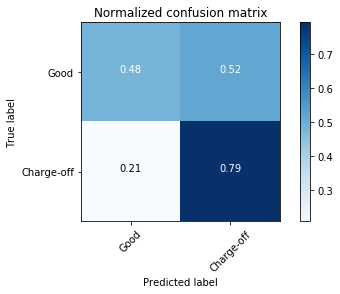

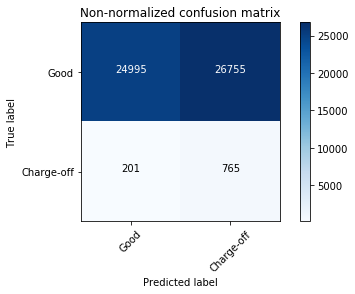

In [185]:
y = df2.loan_status
X = df2.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clf = grid.best_estimator_.steps[0][1]

clf.fit(X_train, y_train)
print(clf.feature_importances_)
print(clf)

y_predicted = clf.predict(X_test)

print("recall:", round(recall_score(y_test, y_predicted), 4))
print("Accuracy:", round(accuracy_score(y_test, y_predicted), 4))

print(precision_recall_fscore_support(y_test, y_predicted, beta=2, average='binary'))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good', 'Charge-off'], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('images/confusion_matrix_norm.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good', 'Charge-off'], normalize=False,
                      title='Non-normalized confusion matrix')
plt.savefig('images/confusion_matrix_non_norm.png')


#### Best Classifier - 2016 Q4
I cross-validate the predictor on different data sets to make sure it is robust on another data set.

Here I evaluate various metrics; accuracy, recall, F2 scores and confusion matrix for the best classifier from the Grid Search for the 2016 Q4 data set.

In [155]:
df4 = pd.read_csv('data/LoanStats_securev1_2016Q4.csv', skiprows=1, skipfooter=2, 
                 engine='python', usecols=get_usecols(), converters=get_conv())
df4 = preprocess(df4)

In [186]:
y = df4.loan_status
X = df4.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=99)

clf = grid.best_estimator_.steps[0][1]

clf.fit(X_train, y_train)
print(clf.feature_importances_)
print(clf)

y_predicted = clf.predict(X_test)

print("recall:", round(recall_score(y_test, y_predicted), 4))
print("Accuracy:", round(accuracy_score(y_test, y_predicted), 4))

print(precision_recall_fscore_support(y_test, y_predicted, beta=2, average='binary'))

[0.  0.  0.6 0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=1, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
recall: 0.7108
Accuracy: 0.5543
(0.08699584755170003, 0.7107826671145449, 0.29201512516905415, None)


## Visualizing Random Forest

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



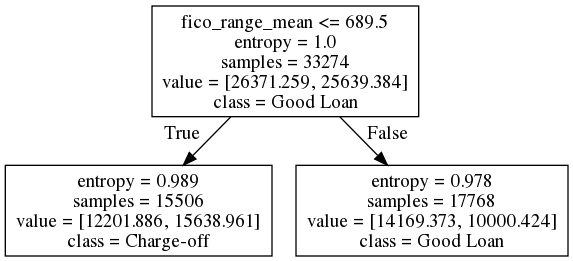

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



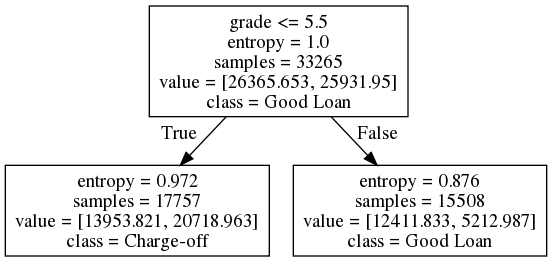

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



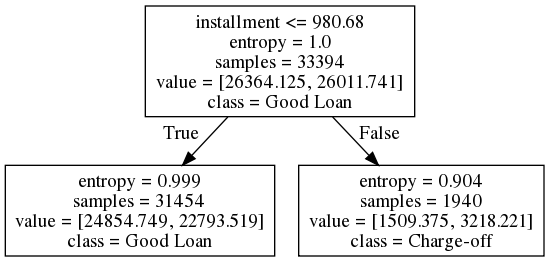

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



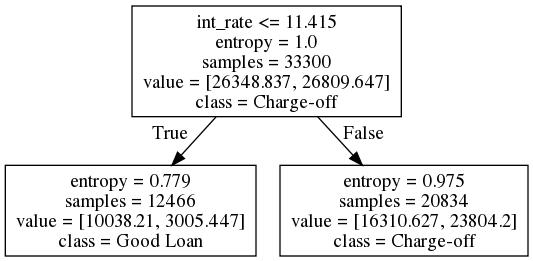

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



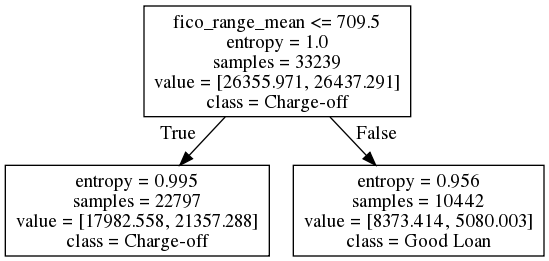

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



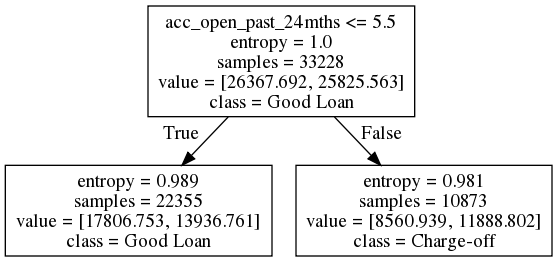

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



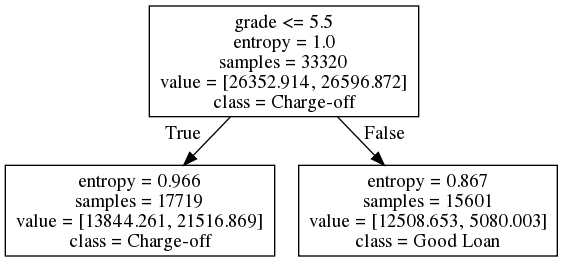

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



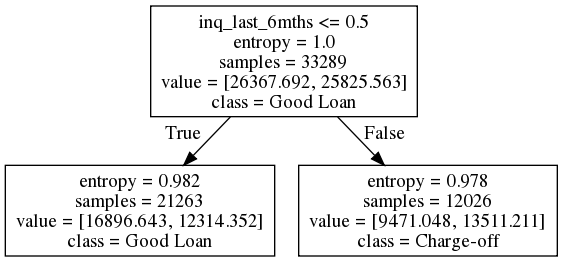

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



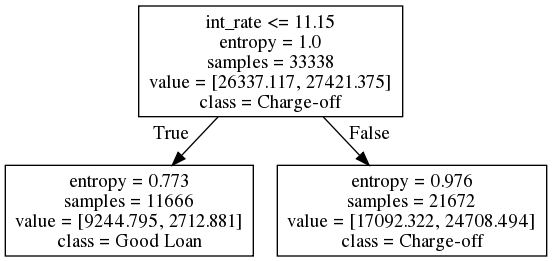

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



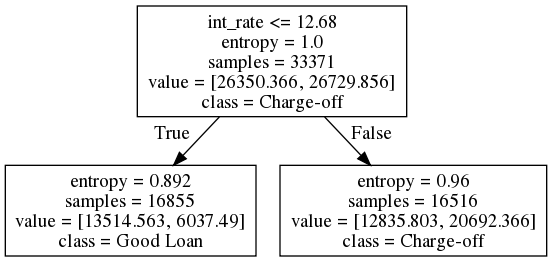

Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



In [154]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
from sklearn import tree


X_train.columns.values[clf.feature_importances_ > 0]

for i, dtree in enumerate(clf.estimators_):
    
    dot_data = tree.export_graphviz(dtree, out_file=None, 
                                    feature_names=X_train.columns.values,  
                                    class_names=['Good Loan', 'Charge-off'])

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  

    # Show graph
    img = Image(graph.create_png())
    display(img)
    with open('images/tree'+str(i+1)+'.png', "wb") as png:
        png.write(graph.create_png())



Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig error: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 72: non-double matrix element
Fontconfig warning: "/usr/X11/lib/X11/fontconfig/conf.d/10-scale-bitmap-fonts.conf", line 80: saw unknown, expected number



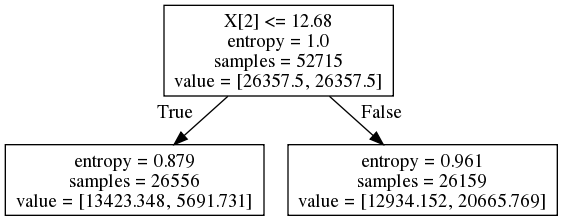

In [134]:


dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1, class_weight='balanced', random_state=7)

dtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=None,  
                                class_names=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())